### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from scipy.spatial.distance import cityblock

### Function to Read and Load .cfile Data

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

### Calculate RSSI

In [3]:
def calculate_rssi(complex_data):
    """
    Calculate RSSI as 10 * log10(I[k]^2 + Q[k]^2) for each sample.
    """
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    rssi = 10 * np.log10(I**2 + Q**2)
    
    return rssi

### Plot RSSI function

In [14]:
def plot_rssi_vs_time(data, sample_rate):
    """
    Plot RSSI versus time plot for one dataset.
    
    Parameters:
    - rssi1: Array of RSSI values for the first plot
    - sample_rate: Sampling rate of the data in Hz
    """
    # Adjust matplotlib settings to handle large data sets
    plt.rcParams['agg.path.chunksize'] = 10000  # Handle large data sets
    plt.rcParams['path.simplify_threshold'] = 1.0  # Path simplification threshold

    rssi = calculate_rssi(data)

    # Calculate time vector based on the number of samples and sampling rate
    N = len(rssi)

    time = np.arange(N) / sample_rate

    # Plot RSSI vs Time
    plt.figure(figsize=(10, 6))
    plt.plot(time, rssi, label="RSSI", alpha=0.7)  # Plot the first dataset
    plt.xlabel("Time (s)")
    plt.ylabel("RSSI (dB)")
    plt.title("RSSI vs Time")
    plt.grid(True)
    plt.legend()
    plt.show()


In [15]:
def plot_rssi_vs_time_2(data1, data2, sample_rate):
    """
    Plot two RSSI versus time plots on top of each other.
    
    Parameters:
    - rssi1: Array of RSSI values for the first plot
    - rssi2: Array of RSSI values for the second plot
    - sample_rate: Sampling rate of the data in Hz
    """
    # Adjust matplotlib settings to handle large data sets
    plt.rcParams['agg.path.chunksize'] = 10000  # Handle large data sets
    plt.rcParams['path.simplify_threshold'] = 1.0  # Path simplification threshold

    rssi1 = calculate_rssi(data1)
    rssi2 = calculate_rssi(data2)

    # Calculate time vector based on the number of samples and sampling rate
    N1 = len(rssi1)
    N2 = len(rssi2)
    time1 = np.arange(N1) / sample_rate
    time2 = np.arange(N2) / sample_rate

    # Plot RSSI vs Time
    plt.figure(figsize=(10, 6))
    plt.plot(time1, rssi1, label="RSSI 1", alpha=0.7)  # Plot the first dataset
    plt.plot(time2, rssi2, label="RSSI 2", alpha=0.7)  # Plot the second dataset
    plt.xlabel("Time (s)")
    plt.ylabel("RSSI (dB)")
    plt.title("RSSI vs Time")
    plt.grid(True)
    plt.legend()
    plt.show()

### Calculate IQ Angle

In [4]:
def calculate_IQ_Angle(complex_data):
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    angle = np.arctan(Q/I)
    return angle
    

### Plot IQ Angle

In [25]:
def plot_IQ_Angle(complex_data):
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    angle = np.arctan(Q/I)

    N = len(angle)
    sample_rate = 20e6
    time = np.arange(N) / sample_rate

    plt.plot(time, angle, color='red')
    plt.title('IQ Angle Component')
    plt.xlabel('Time')
    plt.ylabel('Angle')
    plt.legend()
    plt.show()

In [22]:
def plot_IQ_Angle_2(complex_data1, complex_data2):
    I1 = np.real(complex_data1)
    Q1 = np.imag(complex_data1)

    I2 = np.real(complex_data2)
    Q2 = np.imag(complex_data2)
    
    # Calculate RSSI for each sample
    angle1 = np.arctan(Q1/I1)
    angle2 = np.arctan(Q2/I2)
    plt.plot(angle1, color='red')
    plt.plot(angle2, color='blue')
    plt.title('IQ Angle Component')
    plt.xlabel('Sample Number')
    plt.ylabel('Angle')
    plt.legend()
    plt.show()

### Calculate IQ Magnitude

In [3]:
def calculate_IQMagnitude(complex_data):
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    magnitude = np.sqrt(I**2 + Q**2)
    
    return magnitude

### Plot IQ Magnitude

In [29]:
def plot_IQ_magnitude(complex_data):
    magnitude = calculate_IQMagnitude(complex_data)
    plt.plot(magnitude, color='red')
    plt.title('IQ Magnitude Component')
    plt.xlabel('Sample Number')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.show()

In [3]:
def plot_IQ_magnitude_2(complex_data1, complex_data2):
    I1 = np.real(complex_data1)
    Q1 = np.imag(complex_data1)

    I2 = np.real(complex_data2)
    Q2 = np.imag(complex_data2)
    
    # Calculate RSSI for each sample
    magnitude1 = np.sqrt(I1**2 + Q1**2)
    magnitude2 = np.sqrt(I2**2 + Q2**2)
    plt.plot(magnitude1, color='red')
    plt.plot(magnitude2, color='blue')
    plt.title('IQ Magnitude Component')
    plt.xlabel('Sample Number')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.show()

### Calculate SNR

In [ ]:
def calculate_snr_mean_std(signal_complex_data, noise_complex_data):
    """
    Calculate SNR (Signal-to-Noise Ratio) using mean of the signal and standard deviation of the noise.
    
    SNR = 20 * log10(mean_signal_power / std_noise_power)
    
    signal_complex_data: array of complex numbers representing the signal
    noise_complex_data: array of complex numbers representing the noise
    """
    # Separate I and Q data for signal and noise
    I_signal = np.real(signal_complex_data)
    Q_signal = np.imag(signal_complex_data)
    
    I_noise = np.real(noise_complex_data)
    Q_noise = np.imag(noise_complex_data)
    
    # Calculate power of signal and noise
    signal_power = I_signal**2 + Q_signal**2
    noise_power = I_noise**2 + Q_noise**2
    
    # Calculate mean of the signal power and standard deviation of the noise power
    mean_signal_power = np.mean(signal_power)
    std_noise_power = np.std(noise_power)
    
    # Calculate SNR
    snr = 20 * np.log10(mean_signal_power / std_noise_power)
    
    return snr

In [13]:
def calculate_snr_mean_std_windowed(signal_complex_data, noise_complex_data, window_length):
    """
    Calculate SNR (Signal-to-Noise Ratio) over multiple windows using mean of the signal power 
    and standard deviation of the noise power.
    
    SNR for each window = 20 * log10(mean_signal_power / std_noise_power)
    
    signal_complex_data: array of complex numbers representing the signal
    noise_complex_data: array of complex numbers representing the noise
    window_length: length of each window to calculate the SNR
    
    Returns:
    snr_array: array of SNR values for each window
    """
    # Ensure input data are numpy arrays
    signal_complex_data = np.array(signal_complex_data)
    noise_complex_data = np.array(noise_complex_data)
    
    # Number of windows
    num_windows = len(signal_complex_data) // window_length
    
    # Initialize array to store SNR values for each window
    snr_array = []
    
    # Calculate SNR for each window
    for i in range(num_windows):
        # Extract window data for signal and noise
        window_signal = signal_complex_data[i * window_length: (i + 1) * window_length]
        window_noise = noise_complex_data[i * window_length: (i + 1) * window_length]
        
        # Separate I and Q data for signal and noise
        I_signal = np.real(window_signal)
        Q_signal = np.imag(window_signal)
        
        I_noise = np.real(window_noise)
        Q_noise = np.imag(window_noise)
        
        # Calculate power of signal and noise
        signal_power = I_signal**2 + Q_signal**2
        noise_power = I_noise**2 + Q_noise**2
        
        # Calculate mean of the signal power and standard deviation of the noise power
        mean_signal_power = np.mean(signal_power)
        std_noise_power = np.std(noise_power)
        
        # Calculate SNR for the window
        snr = 20 * np.log10(mean_signal_power / std_noise_power)
        snr_array.append(snr)
    
    return np.array(snr_array)

### Plot SNR

In [ ]:
def plot_snr(signal_complex_data, noise_complex_data):
    """
    Calculate SNR using mean/std method and plot the SNR values with samples on the x-axis.
    """
    # Calculate SNR for the given data
    snr_value = calculate_snr_mean_std_windowed(signal_complex_data, noise_complex_data)
    
    # Plot SNR
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(signal_complex_data)), snr_value * np.ones(len(signal_complex_data)), label=f'SNR: {snr_value:.2f} dB')
    plt.xlabel('Samples')
    plt.ylabel('SNR (dB)')
    plt.title('SNR vs Samples')
    plt.legend()
    plt.grid(True)
    plt.show()

### Plot I vs Q

In [21]:
def plot_I_vs_Q(complex_data):
    """
    Plot the in-phase (I) component against the quadrature (Q) component.
    
    I is on the x-axis and Q is on the y-axis.
    """
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    samples = np.arange(len(complex_data))
    
    # Plot I vs Q
    plt.figure(figsize=(8, 8))
    plt.scatter(I, Q, c='blue', marker='o', alpha=0.5)
    plt.xlabel('In-Phase (I)')
    plt.ylabel('Quadrature (Q)')
    plt.title('I vs Q Plot')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

    # fig = plt.figure(figsize = (10, 7))
    # ax = plt.axes(projection ="3d")
    
    # # Creating plot
    # ax.scatter3D(I, Q, samples, color = "green")
    # plt.title("simple 3D scatter plot")
    
    # # show plot
    # plt.show()

In [18]:
def plot_I_vs_Q_2(complex_data1, complex_data2):
    """
    Plot the in-phase (I) component against the quadrature (Q) component.
    
    I is on the x-axis and Q is on the y-axis.
    """
    # Separate I and Q data
    I1 = np.real(complex_data1)
    Q1 = np.imag(complex_data1)

    I2 = np.real(complex_data2)
    Q2 = np.imag(complex_data2)

    samples = np.arange(len(complex_data1))
    
    # Plot I vs Q
    plt.figure(figsize=(8, 8))
    plt.scatter(I1, Q1, c='blue', marker='o', alpha=0.5)
    plt.scatter(I2, Q2, c='red', marker='o', alpha=0.5)
    plt.xlabel('In-Phase (I)')
    plt.ylabel('Quadrature (Q)')
    plt.title('I vs Q Plot')
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

    # fig = plt.figure(figsize = (10, 7))
    # ax = plt.axes(projection ="3d")
    
    # # Creating plot
    # ax.scatter3D(I, Q, samples, color = "green")
    # plt.title("simple 3D scatter plot")
    
    # # show plot
    # plt.show()

### Calculate FFT

In [6]:
def calculate_fft(complex_data):
    fft_result = np.fft.fft(complex_data)
    return fft_result

In [2]:
def plot_fft(complex_data):
    fft_result = calculate_fft(complex_data)

    n = len(complex_data)
    sampling_rate = 20e6  
    freqs = np.fft.fftfreq(n, d=1/sampling_rate)

    plt.figure(figsize=(10, 6))
    plt.plot(freqs[:n // 2], np.abs(fft_result)[:n // 2]) 
    plt.title("FFT")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.show()

    # N = len(complex_data)
    # sample_rate = 20e6
    # time = np.arange(N) / sample_rate

### Calculate Two Sample T Test

In [3]:
from scipy.stats import ttest_ind

def compute_two_sample_ttest(complex_data1, complex_data2):
    """
    Performs a two-sample t-test between the in-phase (I) and quadrature (Q) components of IQ data.
    Used to compare the means of I and Q if both are normally distributed
    Parameters:
    complex_data (numpy array): An array of complex numbers representing IQ data.

    Returns:
    tuple: A tuple containing the t-statistic and the p-value.
    """
    # Extract in-phase (I) and quadrature (Q) components
    I1 = np.real(complex_data1)
    Q1 = np.imag(complex_data1)
    magnitude1 = np.sqrt(I1**2 + Q1**2)

    I2 = np.real(complex_data2)
    Q2 = np.imag(complex_data2)
    magnitude2 = np.sqrt(I2**2 + Q2**2)
    
    # Perform two-sample t-test
    t_statistic, p_value = ttest_ind(magnitude1, magnitude2, equal_var=False)  # `equal_var=False` assumes unequal variance
    print(f"T-Statistic: {t_statistic}")
    print(f"P-value: {p_value}")

    return t_statistic, p_value

### Calculate Covariance

In [7]:
def compute_covariance(complex_data1):
    return np.cov(np.real(complex_data1), np.imag(complex_data1))

### Reading and Loading a .cfile to Numpy Array

In [4]:
dataWithOutInterference = getData("./NoInterference.cfile") #lora signal is not there. Wrong data collected

In [5]:
dataWithInterferenceLOSCenter = getData("./LosCenter.cfile")

In [6]:
dataWithInterferenceLOSFirstQuartile = getData("./LosFirstQuartile.cfile")

In [7]:
dataWithInterferenceLOSThirdQuartile = getData("./LosThirdQuartile.cfile")

In [8]:
dataWithInterferenceNLOSLeftCenter = getData("./NLosLeftCenter.cfile")
dataWithInterferenceNLOSLeftFirstQuartile = getData("./NLosLeftFirstQuartile.cfile")
dataWithInterferenceNLOSLeftThirdQuartile = getData("./NLosLeftThirdQuartile.cfile")

In [9]:
dataWithInterferenceNLOSRightCenter = getData("./NLosRightCenter.cfile")
dataWithInterferenceNLOSRightFirstQuartile = getData("./NLosRightFirstQuartile.cfile")
dataWithInterferenceNLOSRightThirdQuartile = getData("./NLosRightThirdQuartile.cfile")

In [ ]:
calculate_snr_mean_std(dataWithOutInterference,dataWithOutInterference)

In [ ]:
calculate_snr_mean_std(dataWithInterferenceLOSCenter,dataWithInterferenceLOSCenter)

In [ ]:
calculate_snr_mean_std(dataWalkingTowardsSender,dataWalkingTowardsSender)

In [ ]:
calculate_snr_mean_std(dataWithInterferenceLOSFirstQuartile,dataWithInterferenceLOSFirstQuartile)

In [ ]:
calculate_snr_mean_std(dataWithInterferenceLOSThirdQuartile,dataWithInterferenceLOSThirdQuartile)

In [ ]:
calculate_snr_mean_std(dataWalkingTowardsReceiver,dataWalkingTowardsReceiver)

### DC Offset Removal

In [11]:
dataWithInterferenceLOSCenterDC = dataWithInterferenceLOSCenter - np.mean(dataWithInterferenceLOSCenter)

In [12]:
dataWithInterferenceLOSFirstQuartileDC = dataWithInterferenceLOSFirstQuartile - np.mean(dataWithInterferenceLOSFirstQuartile)

In [13]:
dataWithInterferenceLOSThirdQuartileDC = dataWithInterferenceLOSThirdQuartile - np.mean(dataWithInterferenceLOSThirdQuartile)

In [14]:
dataWithInterferenceNLOSLeftCenterDC = dataWithInterferenceNLOSLeftCenter - np.mean(dataWithInterferenceNLOSLeftCenter)

In [15]:
dataWithInterferenceNLOSLeftFirstQuartileDC = dataWithInterferenceNLOSLeftFirstQuartile - np.mean(dataWithInterferenceNLOSLeftFirstQuartile)

In [16]:
dataWithInterferenceNLOSLeftThirdQuartileDC =  dataWithInterferenceNLOSLeftThirdQuartile - np.mean(dataWithInterferenceNLOSLeftThirdQuartile)

In [18]:
dataWithInterferenceNLOSRightCenterDC = dataWithInterferenceNLOSRightCenter - np.mean(dataWithInterferenceNLOSRightCenter)

In [17]:
dataWithInterferenceNLOSRightFirstQuartileDC = dataWithInterferenceNLOSRightFirstQuartile - np.mean(dataWithInterferenceNLOSRightFirstQuartile)

In [19]:
dataWithInterferenceNLOSRightThirdQuartileDC = dataWithInterferenceNLOSRightThirdQuartile - np.mean(dataWithInterferenceNLOSRightThirdQuartile)

### Calculate Covariance

In [10]:
print("Covariance Matrix dataWithInterferenceLOSCenterDC:", compute_covariance(dataWithInterferenceLOSCenterDC))
print("Covariance Matrix dataWithInterferenceLOSFirstQuartileDC:", compute_covariance(dataWithInterferenceLOSFirstQuartileDC))
print("Covariance Matrix dataWithInterferenceLOSThirdQuartileDC:", compute_covariance(dataWithInterferenceLOSThirdQuartileDC))

Covariance Matrix dataWithInterferenceLOSCenterDC: [[ 4.50094744e-04 -1.36430468e-06]
 [-1.36430468e-06  4.53375078e-04]]
Covariance Matrix dataWithInterferenceLOSFirstQuartileDC: [[ 1.07728682e-04 -1.30092940e-06]
 [-1.30092940e-06  1.08748796e-04]]
Covariance Matrix dataWithInterferenceLOSThirdQuartileDC: [[ 2.42794325e-04 -1.44143159e-06]
 [-1.44143159e-06  2.43000223e-04]]


### Frequency Analysis

c:\Users\Deelaka Algawatta\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


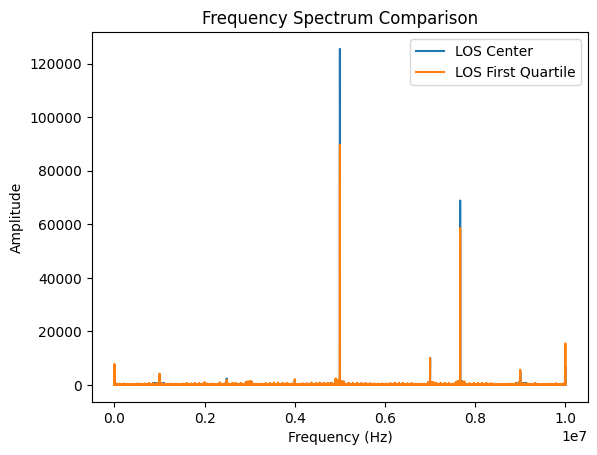

In [ ]:
fft_dataWithInterferenceLOSCenterDC = np.abs(np.fft.fft(dataWithInterferenceLOSCenterDC))
fft_dataWithInterferenceLOSFirstQuartileDC = np.abs(np.fft.fft(dataWithInterferenceLOSFirstQuartileDC))

sampling_rate = 20e6
frequencies1 = np.fft.fftfreq(len(dataWithInterferenceLOSCenterDC), d=1/sampling_rate)
frequencies2 = np.fft.fftfreq(len(fft_dataWithInterferenceLOSFirstQuartileDC), d=1/sampling_rate)

# Compare frequency spectra
import matplotlib.pyplot as plt
plt.plot(frequencies1[:len(frequencies1)//2], fft_dataWithInterferenceLOSCenterDC[:len(fft_dataWithInterferenceLOSCenterDC)//2], label="LOS Center")
plt.plot(frequencies2[:len(frequencies2)//2], fft_dataWithInterferenceLOSFirstQuartileDC[:len(fft_dataWithInterferenceLOSFirstQuartileDC)//2], label="LOS First Quartile")
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Frequency Spectrum Comparison")
plt.show()

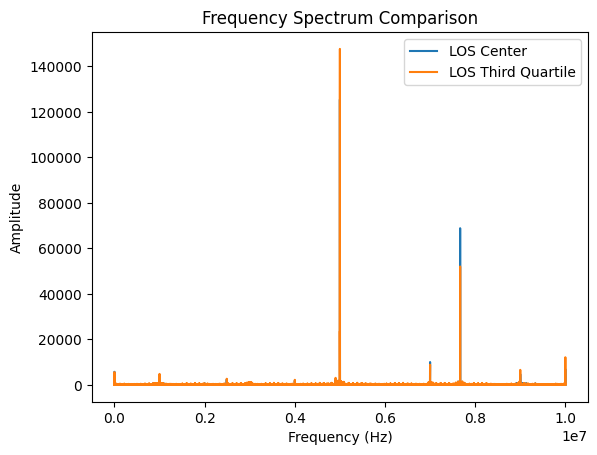

In [13]:
fft_dataWithInterferenceLOSCenterDC = np.abs(np.fft.fft(dataWithInterferenceLOSCenterDC))
fft_dataWithInterferenceLOSThirdQuartileDC = np.abs(np.fft.fft(dataWithInterferenceLOSThirdQuartileDC))

sampling_rate = 20e6
frequencies1 = np.fft.fftfreq(len(dataWithInterferenceLOSCenterDC), d=1/sampling_rate)
frequencies2 = np.fft.fftfreq(len(fft_dataWithInterferenceLOSThirdQuartileDC), d=1/sampling_rate)

# Compare frequency spectra
import matplotlib.pyplot as plt
plt.plot(frequencies1[:len(frequencies1)//2], fft_dataWithInterferenceLOSCenterDC[:len(fft_dataWithInterferenceLOSCenterDC)//2], label="LOS Center")
plt.plot(frequencies2[:len(frequencies2)//2], fft_dataWithInterferenceLOSThirdQuartileDC[:len(fft_dataWithInterferenceLOSThirdQuartileDC)//2], label="LOS Third Quartile")
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Frequency Spectrum Comparison")
plt.show()

### Calculate Two Sample T Test

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithOutInterference)

In [ ]:
t_statistic_with_LOS_center, p_value_with_LOS_center = compute_two_sample_ttest(dataWithInterferenceLOSCenter)

In [ ]:
t_statistic_walkinhTowardsReceiver, p_value_walkinhTowardsReceiver = compute_two_sample_ttest(dataWalkingTowardsReceiver)

In [9]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithOutInterference, dataWithInterferenceLOSCenter)

T-Statistic: -6324.440595046075
P-value: 0.0


In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithOutInterference, dataWithInterferenceLOSThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithOutInterference, dataWithInterferenceLOSFirstQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithOutInterference, dataWithInterferenceNLOSLeftCenter)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithOutInterference, dataWithInterferenceNLOSLeftThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithOutInterference, dataWithInterferenceNLOSLeftFirstQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithOutInterference, dataWithInterferenceNLOSRightCenter)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithOutInterference, dataWithInterferenceNLOSRightThirdQuartile)

In [ ]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithOutInterference, dataWithInterferenceNLOSRightFirstQuartile)

In [10]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftFirstQuartile, dataWithInterferenceNLOSRightFirstQuartile)

T-Statistic: -1982.1807038661473
P-value: 0.0


In [16]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftCenter, dataWithInterferenceNLOSRightCenter)

T-Statistic: -3467.5139691666736
P-value: 0.0


In [17]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftThirdQuartile, dataWithInterferenceNLOSRightThirdQuartile)

T-Statistic: -2336.843214955117
P-value: 0.0


In [18]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSCenter, dataWithInterferenceLOSFirstQuartile)

T-Statistic: 5292.527393342008
P-value: 0.0


In [19]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSCenter, dataWithInterferenceLOSThirdQuartile)

T-Statistic: 2907.9770159891305
P-value: 0.0


In [20]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSCenter, dataWithInterferenceLOSFirstQuartile)

T-Statistic: 5292.527393342008
P-value: 0.0


In [21]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSCenter, dataWithInterferenceLOSThirdQuartile)

T-Statistic: 2907.9770159891305
P-value: 0.0


In [22]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSFirstQuartile, dataWithInterferenceLOSThirdQuartile)

T-Statistic: -2536.0726853216634
P-value: 0.0


In [23]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSCenter, dataWithInterferenceNLOSLeftCenter)

T-Statistic: 4177.028841028375
P-value: 0.0


In [24]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSCenter, dataWithInterferenceNLOSLeftFirstQuartile)

T-Statistic: 2832.7995891479213
P-value: 0.0


In [25]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSCenter, dataWithInterferenceNLOSLeftThirdQuartile)

T-Statistic: 3250.253942335403
P-value: 0.0


In [26]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSFirstQuartile, dataWithInterferenceNLOSLeftCenter)

T-Statistic: -1207.4591403338388
P-value: 0.0


In [27]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSFirstQuartile, dataWithInterferenceNLOSLeftFirstQuartile)

T-Statistic: -2146.4104317947385
P-value: 0.0


In [28]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSFirstQuartile, dataWithInterferenceNLOSLeftThirdQuartile)

T-Statistic: -1882.4777328387709
P-value: 0.0


In [29]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSThirdQuartile, dataWithInterferenceNLOSLeftCenter)

T-Statistic: 1336.6913980413844
P-value: 0.0


In [31]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSThirdQuartile, dataWithInterferenceNLOSLeftFirstQuartile)

T-Statistic: 120.52282276035268
P-value: 0.0


In [30]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSThirdQuartile, dataWithInterferenceNLOSLeftThirdQuartile)

T-Statistic: 481.94603584144676
P-value: 0.0


In [32]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftCenter, dataWithInterferenceNLOSLeftThirdQuartile)

T-Statistic: -773.2478527583988
P-value: 0.0


In [33]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftCenter, dataWithInterferenceNLOSLeftFirstQuartile)

T-Statistic: -1088.5864884733737
P-value: 0.0


In [34]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftFirstQuartile, dataWithInterferenceNLOSLeftThirdQuartile)

T-Statistic: 328.2649381807057
P-value: 0.0


In [35]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSCenter, dataWithInterferenceNLOSRightFirstQuartile)

T-Statistic: 730.3380049758645
P-value: 0.0


In [36]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSCenter, dataWithInterferenceNLOSRightThirdQuartile)

T-Statistic: 879.1950300362737
P-value: 0.0


In [37]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSCenter, dataWithInterferenceNLOSRightCenter)

T-Statistic: 577.4908047629
P-value: 0.0


In [38]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSFirstQuartile, dataWithInterferenceNLOSRightFirstQuartile)

T-Statistic: -4195.7581077996065
P-value: 0.0


In [39]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSFirstQuartile, dataWithInterferenceNLOSRightThirdQuartile)

T-Statistic: -4307.443360872379
P-value: 0.0


In [40]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSFirstQuartile, dataWithInterferenceNLOSRightCenter)

T-Statistic: -4540.1322886875605
P-value: 0.0


In [41]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSThirdQuartile, dataWithInterferenceNLOSRightFirstQuartile)

T-Statistic: -1996.117098068293
P-value: 0.0


In [42]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSThirdQuartile, dataWithInterferenceNLOSRightThirdQuartile)

T-Statistic: -1964.937004110504
P-value: 0.0


In [43]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceLOSThirdQuartile, dataWithInterferenceNLOSRightCenter)

T-Statistic: -2240.310343700466
P-value: 0.0


In [44]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSRightCenter, dataWithInterferenceNLOSRightThirdQuartile)

T-Statistic: 289.3429574419062
P-value: 0.0


In [45]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSRightCenter, dataWithInterferenceNLOSRightFirstQuartile)

T-Statistic: 164.40917082657552
P-value: 0.0


In [46]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSRightFirstQuartile, dataWithInterferenceNLOSRightThirdQuartile)

T-Statistic: 115.67565310842937
P-value: 0.0


In [47]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftCenter, dataWithInterferenceNLOSRightThirdQuartile)

T-Statistic: -3212.6691144357337
P-value: 0.0


In [48]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftCenter, dataWithInterferenceNLOSRightFirstQuartile)

T-Statistic: -3174.0436652007784
P-value: 0.0


In [49]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftFirstQuartile, dataWithInterferenceNLOSRightThirdQuartile)

T-Statistic: -1946.4855403820623
P-value: 0.0


In [50]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftFirstQuartile, dataWithInterferenceNLOSRightCenter)

T-Statistic: -2207.916697422478
P-value: 0.0


In [51]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftThirdQuartile, dataWithInterferenceNLOSRightCenter)

T-Statistic: -2598.1915273606846
P-value: 0.0


In [52]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftThirdQuartile, dataWithInterferenceNLOSRightFirstQuartile)

T-Statistic: -2352.4109865871596
P-value: 0.0


In [53]:
t_statistic_without, p_value_without = compute_two_sample_ttest(dataWithInterferenceNLOSLeftThirdQuartile, dataWithInterferenceNLOSLeftThirdQuartile)

T-Statistic: 0.0
P-value: 1.0


### Plot SNR

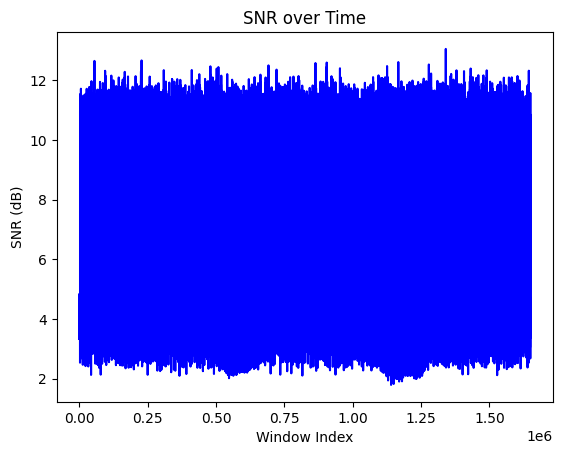

In [14]:
snr_values = calculate_snr_mean_std_windowed(dataWithOutInterference, dataWithOutInterference, window_length=100)
snr_values_without = calculate_snr_mean_std_windowed(dataWithInterferenceLOSCenter, dataWithInterferenceLOSCenter, window_length=100)

plt.plot(snr_values_without, color='blue')
# plt.plot(snr_values, color='red', label='SNR with noise reduction')
plt.xlabel('Window Index')
plt.ylabel('SNR (dB)')
plt.title('SNR over Time')
plt.show()

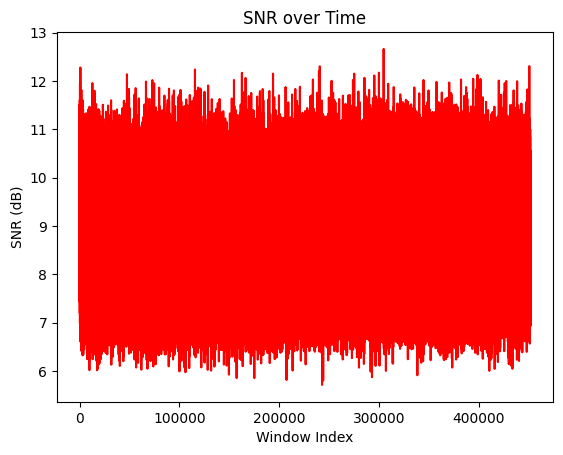

In [15]:
# plt.plot(snr_values_without, color='blue', label='SNR without noise reduction')
plt.plot(snr_values, color='red')
plt.xlabel('Window Index')
plt.ylabel('SNR (dB)')
plt.title('SNR over Time')
plt.show()

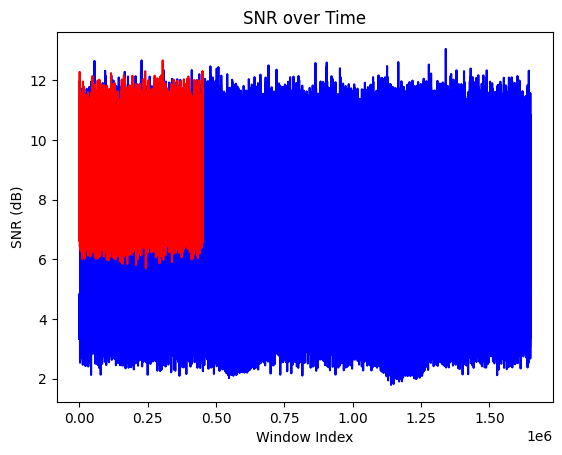

In [16]:
plt.plot(snr_values_without, color='blue')
plt.plot(snr_values, color='red')
plt.xlabel('Window Index')
plt.ylabel('SNR (dB)')
plt.title('SNR over Time')
plt.show()

### Plot RSSI

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_21076\277351076.py:10: RuntimeWarning: divide by zero encountered in log10
  rssi = 10 * np.log10(I**2 + Q**2)
c:\Users\Deelaka Algawatta\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


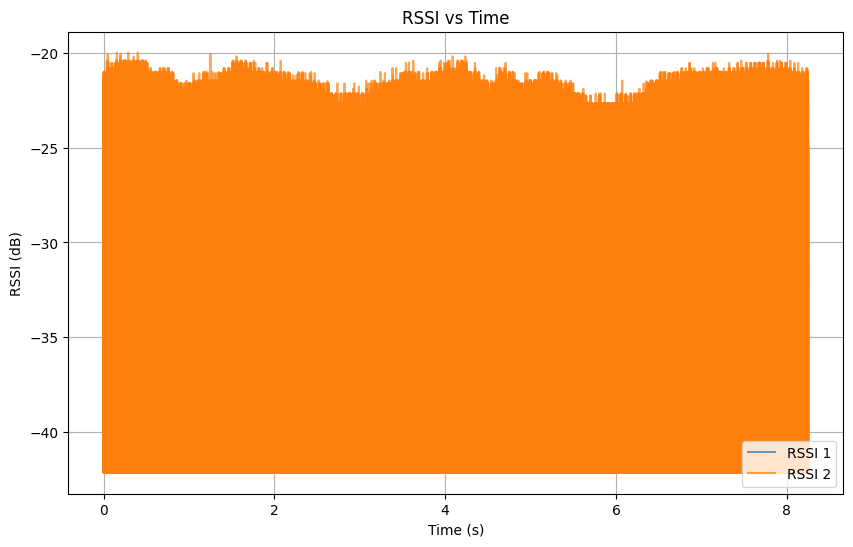

In [ ]:
sample_rate = 20e6
plot_rssi_vs_time_2(dataWithOutInterference, dataWithInterferenceLOSCenter, sample_rate)

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\277351076.py:10: RuntimeWarning: divide by zero encountered in log10
  rssi = 10 * np.log10(I**2 + Q**2)
c:\Users\Deelaka Algawatta\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


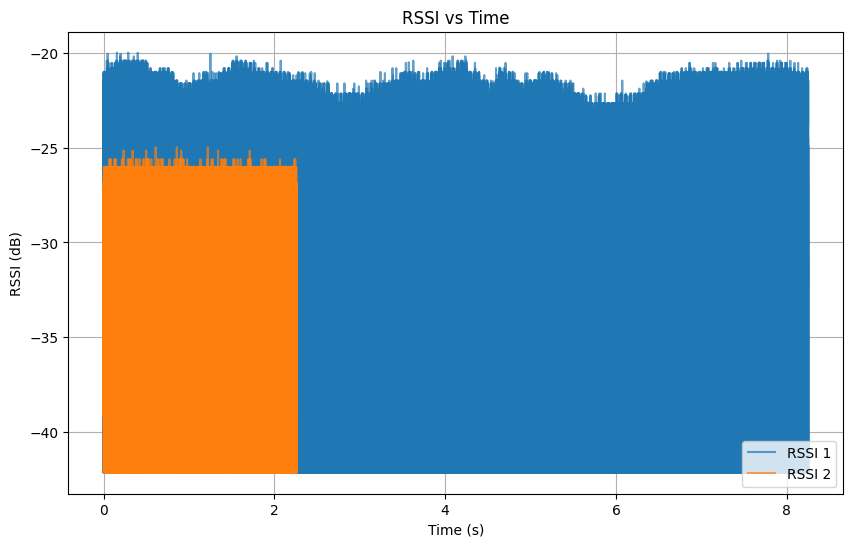

In [8]:
sample_rate = 20e6
plot_rssi_vs_time_2(dataWithInterferenceLOSCenter, dataWithOutInterference,sample_rate)

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_21076\277351076.py:10: RuntimeWarning: divide by zero encountered in log10
  rssi = 10 * np.log10(I**2 + Q**2)


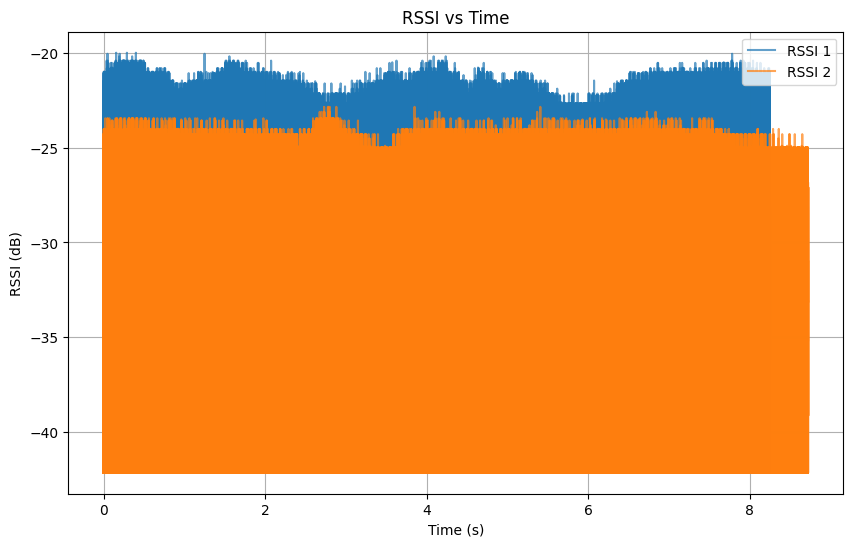

In [ ]:
sample_rate = 20e6
plot_rssi_vs_time_2(dataWithInterferenceLOSCenter, dataWithInterferenceLOSFirstQuartile, sample_rate)

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\277351076.py:10: RuntimeWarning: divide by zero encountered in log10
  rssi = 10 * np.log10(I**2 + Q**2)


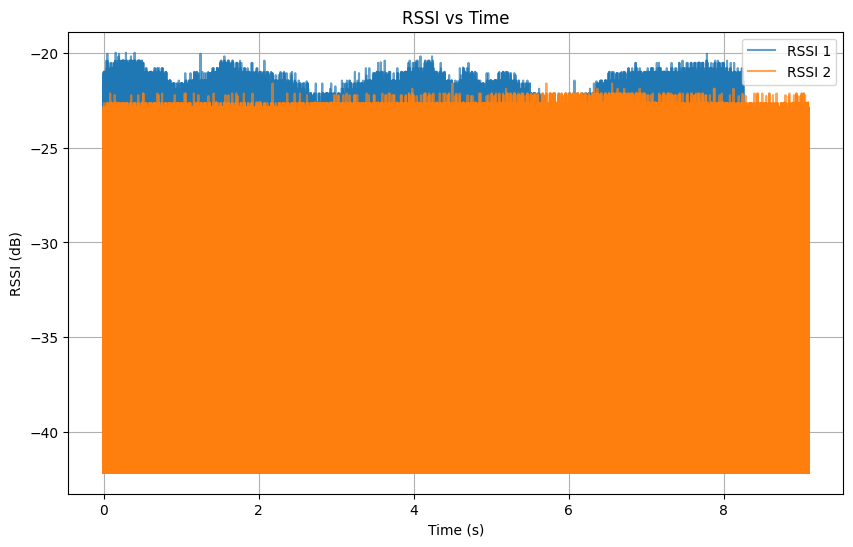

In [19]:
sample_rate = 20e6
plot_rssi_vs_time_2(dataWithInterferenceLOSCenter, dataWithInterferenceLOSThirdQuartile, sample_rate)

### Plot I/Q ( in-phase and quadrature)

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1677127246.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Deelaka Algawatta\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


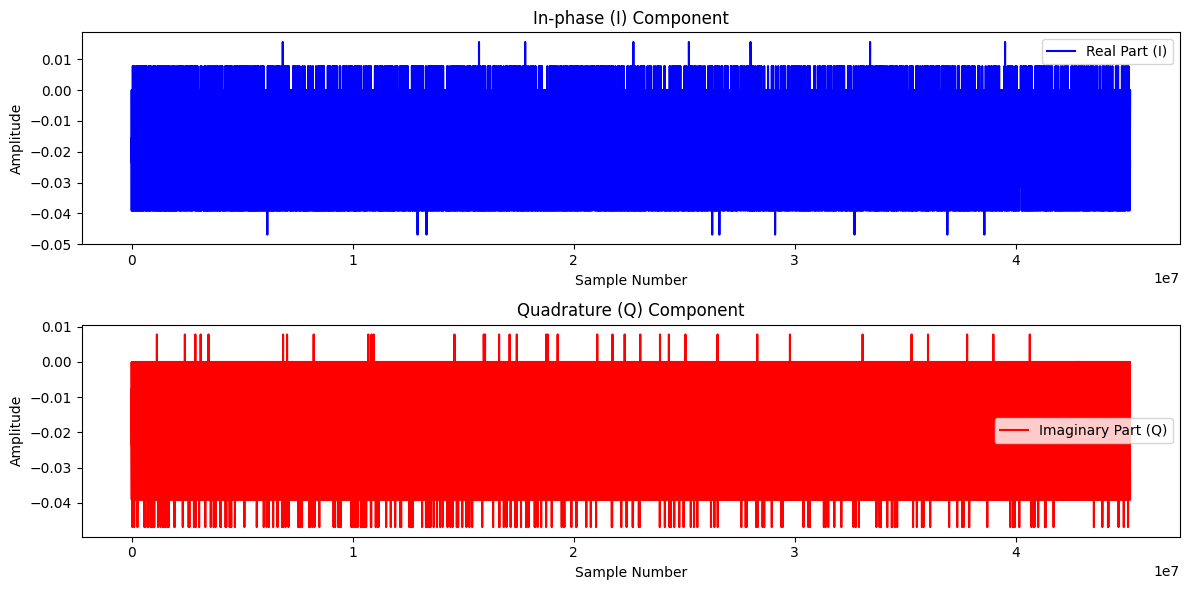

In [20]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(np.real(dataWithOutInterference), label='Real Part (I)', color='blue')
plt.title('In-phase (I) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.imag(dataWithOutInterference), label='Imaginary Part (Q)', color='red')
plt.title('Quadrature (Q) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1622901669.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


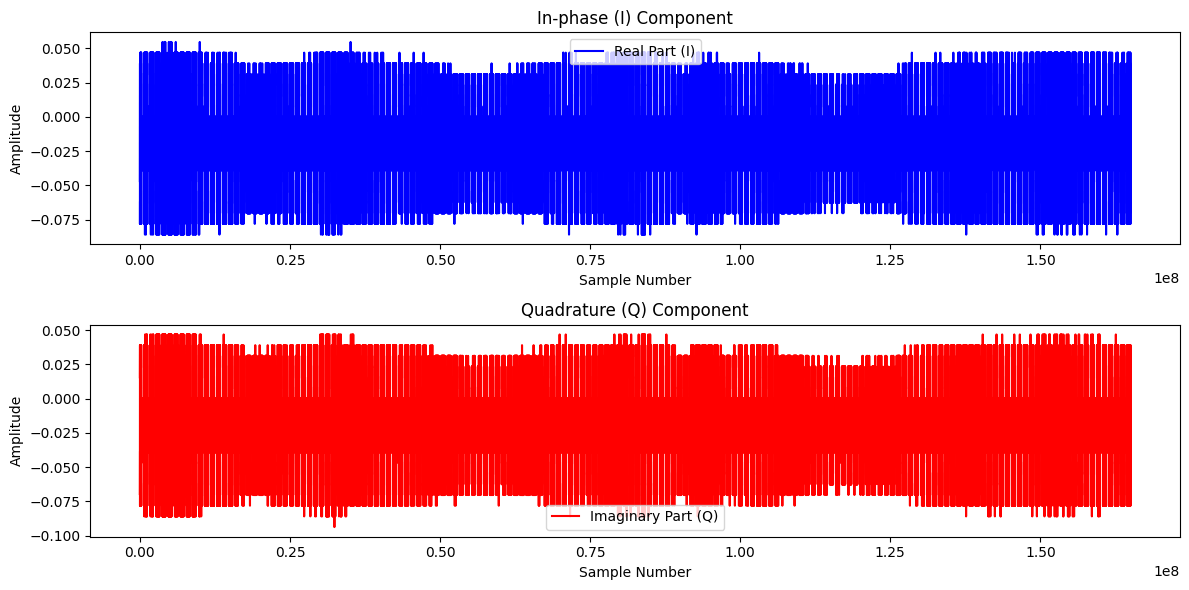

In [21]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(np.real(dataWithInterferenceLOSCenter), label='Real Part (I)', color='blue')
plt.title('In-phase (I) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.imag(dataWithInterferenceLOSCenter), label='Imaginary Part (Q)', color='red')
plt.title('Quadrature (Q) Component')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

### Plot IQ Magnitude vs Time

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\2408783359.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


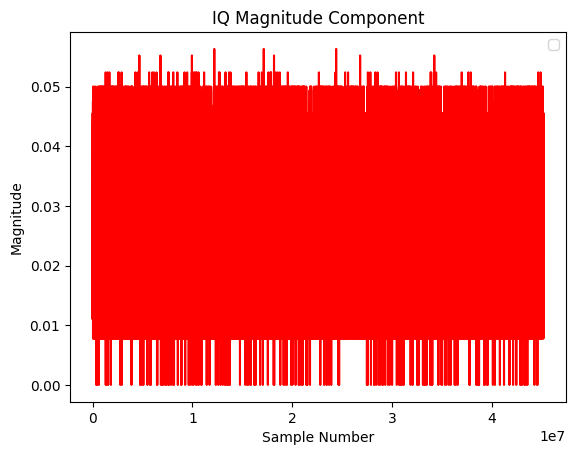

In [31]:
plot_IQ_magnitude(dataWithOutInterference)

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\2408783359.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


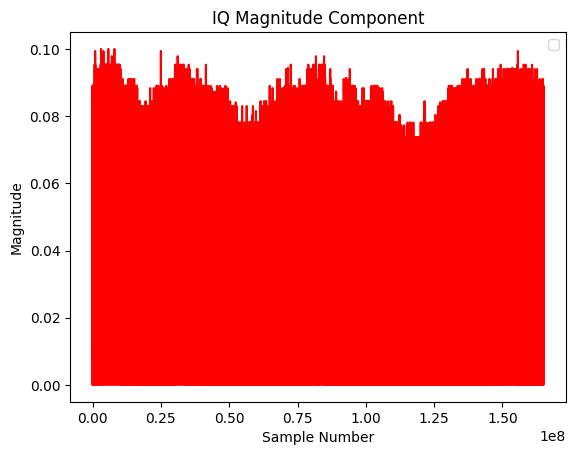

In [32]:
plot_IQ_magnitude(dataWithInterferenceLOSCenter)

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\2264303786.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


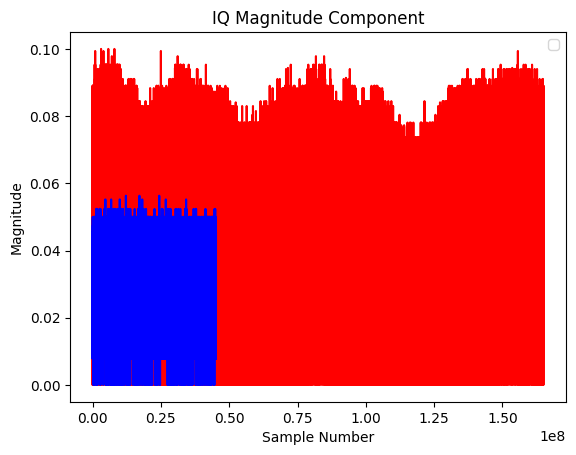

In [34]:
plot_IQ_magnitude_2(dataWithInterferenceLOSCenter, dataWithOutInterference)

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_1984\2264303786.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
c:\Users\Deelaka Algawatta\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


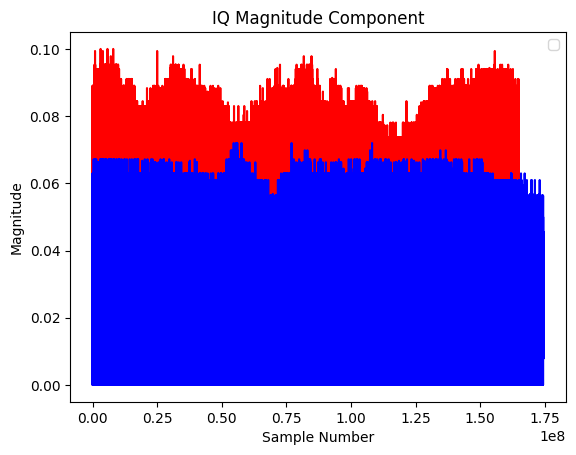

In [7]:
plot_IQ_magnitude_2(dataWithInterferenceLOSCenter, dataWithInterferenceLOSFirstQuartile)

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_1984\2264303786.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


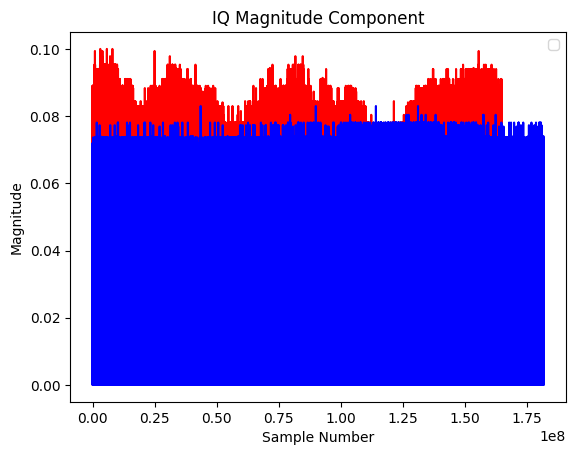

In [9]:
plot_IQ_magnitude_2(dataWithInterferenceLOSCenter, dataWithInterferenceLOSThirdQuartile)

### Plot IQ Angle vs Time

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1556778477.py:6: RuntimeWarning: divide by zero encountered in divide
  angle = np.arctan(Q/I)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1556778477.py:6: RuntimeWarning: invalid value encountered in divide
  angle = np.arctan(Q/I)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1556778477.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


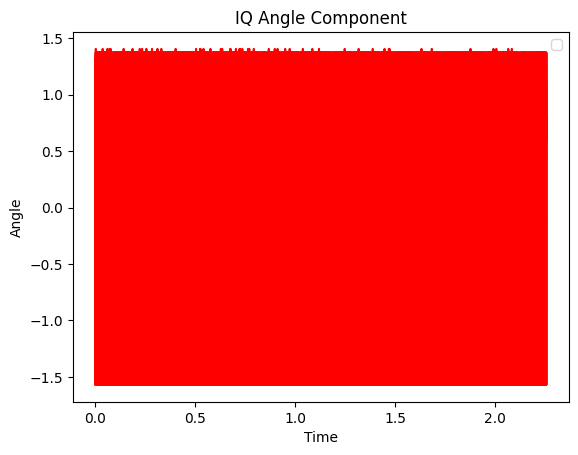

In [28]:
plot_IQ_Angle(dataWithOutInterference)

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1556778477.py:6: RuntimeWarning: divide by zero encountered in divide
  angle = np.arctan(Q/I)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1556778477.py:6: RuntimeWarning: invalid value encountered in divide
  angle = np.arctan(Q/I)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1556778477.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


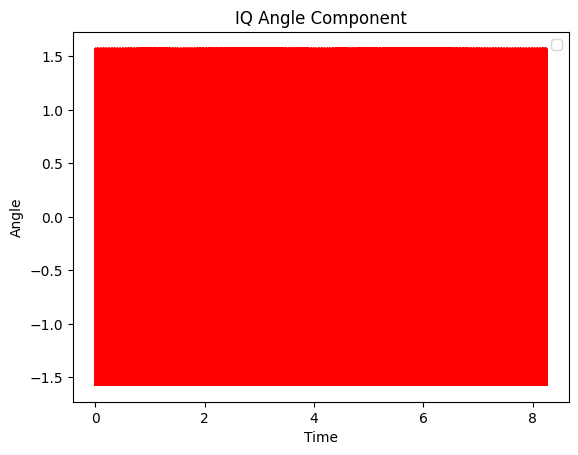

In [26]:
plot_IQ_Angle(dataWithInterferenceLOSCenter)

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1556778477.py:6: RuntimeWarning: divide by zero encountered in divide
  angle = np.arctan(Q/I)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1556778477.py:6: RuntimeWarning: invalid value encountered in divide
  angle = np.arctan(Q/I)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1556778477.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


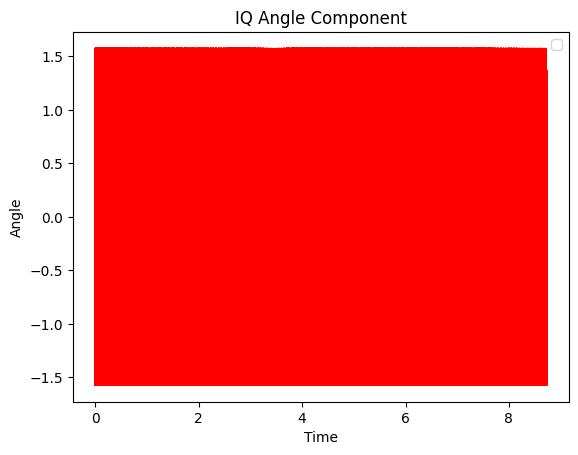

In [27]:
plot_IQ_Angle(dataWithInterferenceLOSFirstQuartile)

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1420369196.py:9: RuntimeWarning: divide by zero encountered in divide
  angle1 = np.arctan(Q1/I1)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1420369196.py:9: RuntimeWarning: invalid value encountered in divide
  angle1 = np.arctan(Q1/I1)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1420369196.py:10: RuntimeWarning: divide by zero encountered in divide
  angle2 = np.arctan(Q2/I2)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1420369196.py:10: RuntimeWarning: invalid value encountered in divide
  angle2 = np.arctan(Q2/I2)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1420369196.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


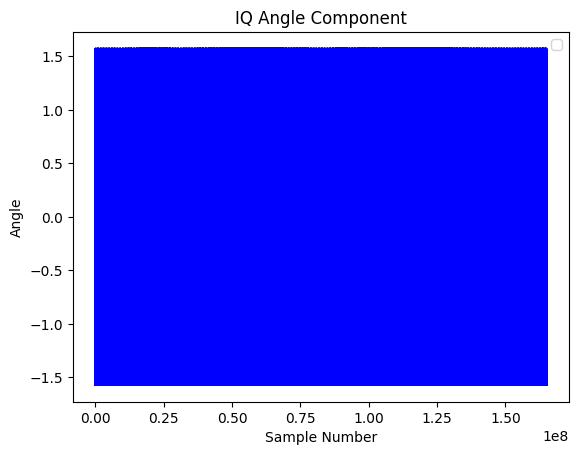

In [23]:
plot_IQ_Angle_2(dataWithOutInterference, dataWithInterferenceLOSCenter)

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1420369196.py:9: RuntimeWarning: divide by zero encountered in divide
  angle1 = np.arctan(Q1/I1)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1420369196.py:9: RuntimeWarning: invalid value encountered in divide
  angle1 = np.arctan(Q1/I1)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1420369196.py:10: RuntimeWarning: divide by zero encountered in divide
  angle2 = np.arctan(Q2/I2)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1420369196.py:10: RuntimeWarning: invalid value encountered in divide
  angle2 = np.arctan(Q2/I2)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_10252\1420369196.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


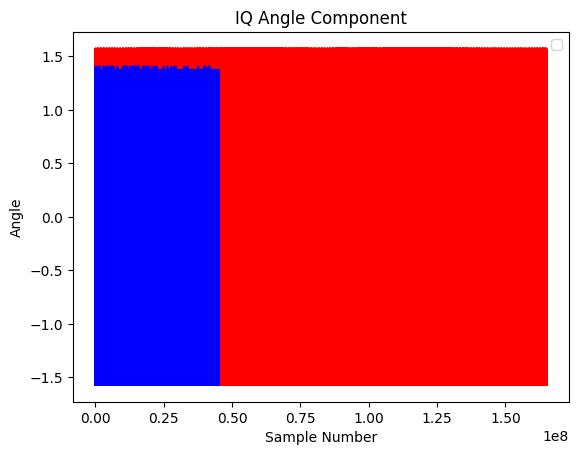

In [24]:
plot_IQ_Angle_2(dataWithInterferenceLOSCenter, dataWithOutInterference)

### Plot I vs Q

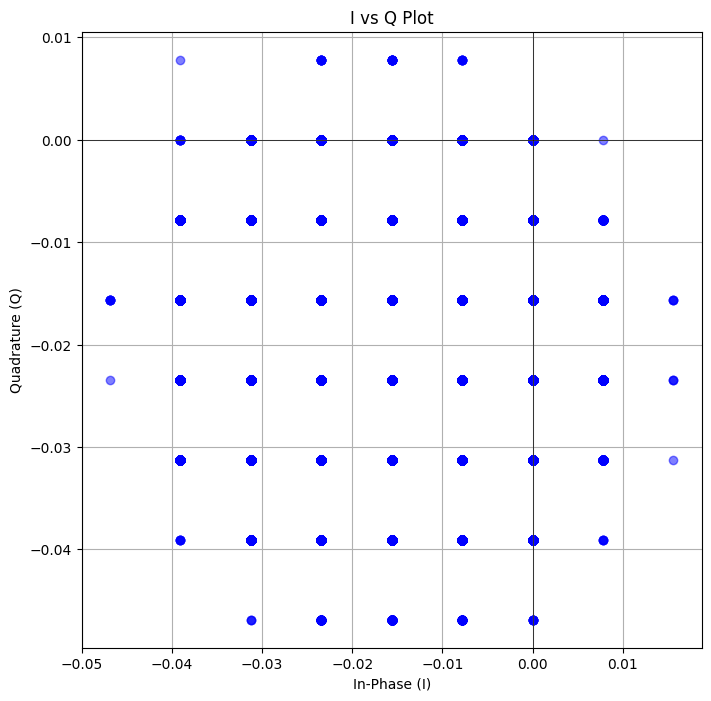

In [23]:
plot_I_vs_Q(dataWithOutInterference)

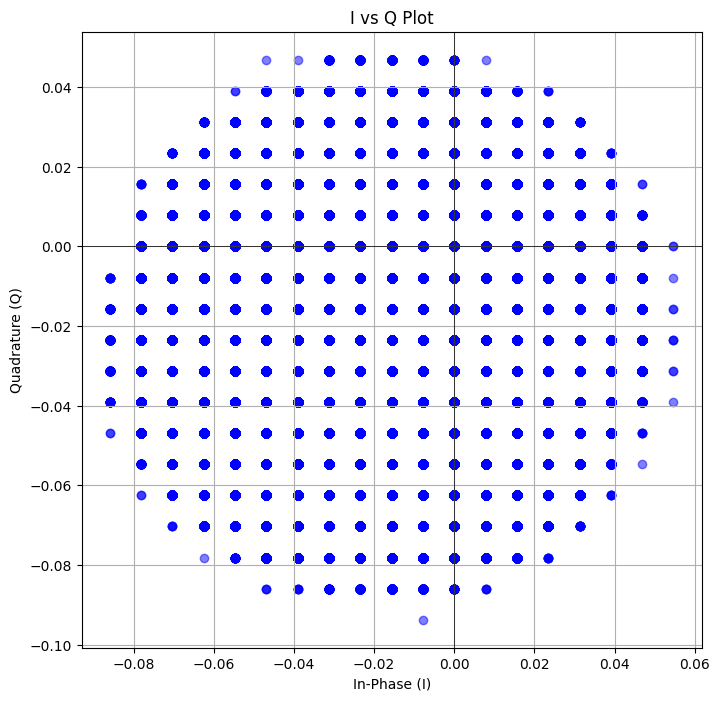

In [22]:
plot_I_vs_Q(dataWithInterferenceLOSCenter)

In [ ]:
plot_I_vs_Q_2(dataWithOutInterference, dataWithInterferenceLOSCenter)

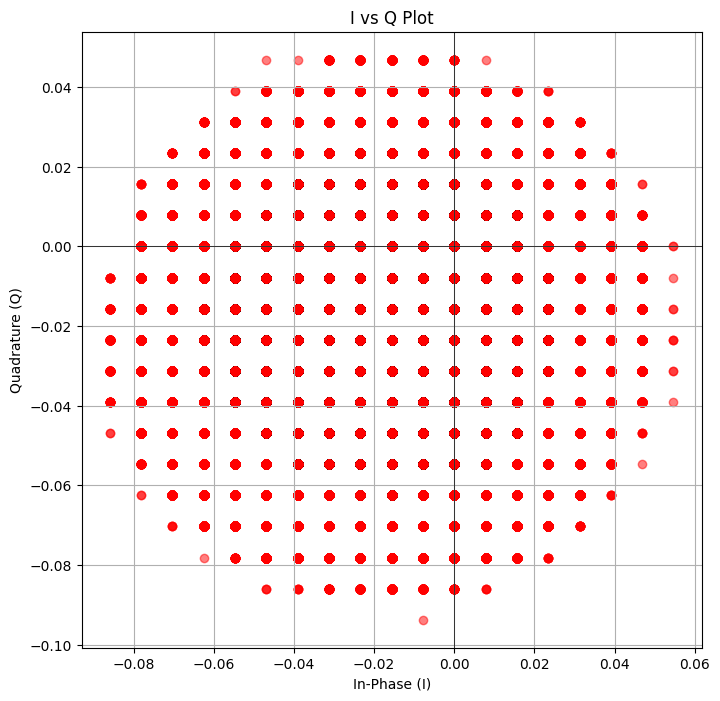

In [19]:
plot_I_vs_Q_2(dataWithInterferenceLOSFirstQuartile, dataWithInterferenceLOSCenter)

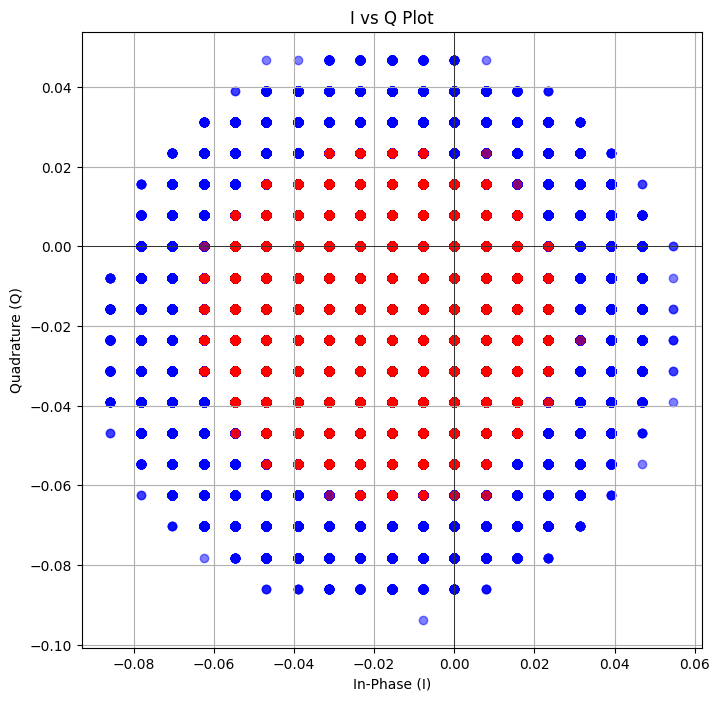

In [20]:
plot_I_vs_Q_2(dataWithInterferenceLOSCenter, dataWithInterferenceLOSFirstQuartile)

### Plot FFT

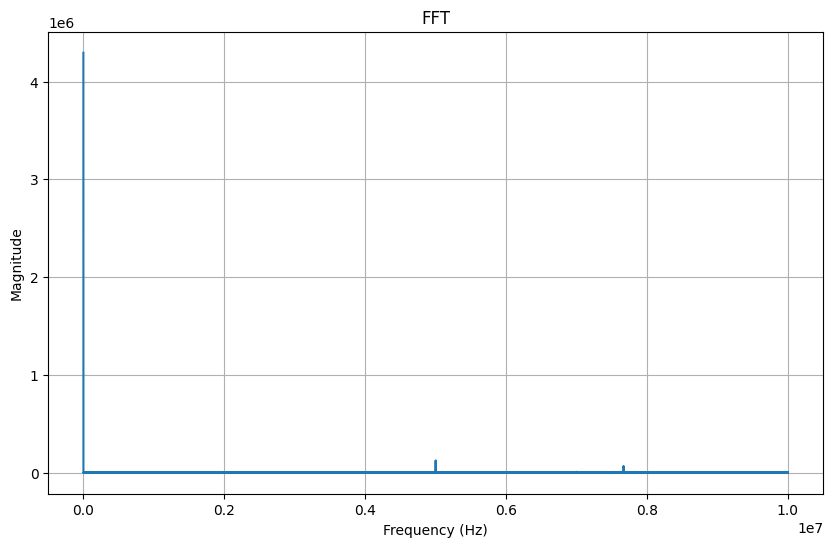

In [7]:
plot_fft(dataWithInterferenceLOSCenter)

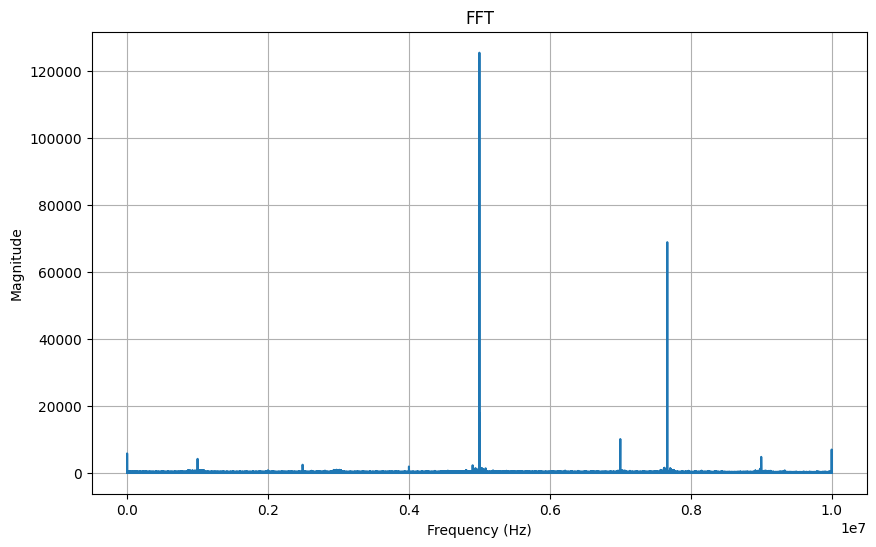

In [10]:
plot_fft(dataWithInterferenceLOSCenterDC)

### Calculate FFT

In [8]:
print(calculate_fft(dataWithInterferenceLOSCenter))

[-2.8030165e+06-3.2542740e+06j  4.2885444e+03-7.8108276e+02j
 -1.5628103e+03+3.1605159e+03j ...  1.1127673e+03+2.7785845e+01j
 -7.2342865e+01-2.8061328e+03j  2.3079288e+02-5.6948350e+03j]


In [11]:
print(calculate_fft(dataWithInterferenceLOSCenterDC))

[ 1.6376178e+00-1.9046359e+00j  4.2885444e+03-7.8108276e+02j
 -1.5628103e+03+3.1605159e+03j ...  1.1127673e+03+2.7785843e+01j
 -7.2342880e+01-2.8061328e+03j  2.3079286e+02-5.6948350e+03j]


In [23]:
dataWithInterferenceLOSCenterFFT = calculate_fft(dataWithInterferenceLOSCenterDC)
dataWithInterferenceLOSFirstQuartileFFT = calculate_fft(dataWithInterferenceLOSFirstQuartileDC)
dataWithInterferenceLOSThirdQuartileFFT = calculate_fft(dataWithInterferenceLOSThirdQuartileDC)
dataWithInterferenceNLOSLeftCenterFFT = calculate_fft(dataWithInterferenceNLOSLeftCenterDC)
dataWithInterferenceNLOSLeftFirstQuartileFFT = calculate_fft(dataWithInterferenceNLOSLeftFirstQuartileDC)
dataWithInterferenceNLOSLeftThirdQuartileFFT = calculate_fft(dataWithInterferenceNLOSLeftThirdQuartileDC)
dataWithInterferenceNLOSRightCenterFFT = calculate_fft(dataWithInterferenceNLOSRightCenterDC)
dataWithInterferenceNLOSRightFirstQuartileFFT = calculate_fft(dataWithInterferenceNLOSRightFirstQuartileDC)
dataWithInterferenceNLOSRightThirdQuartileFFT = calculate_fft(dataWithInterferenceNLOSRightThirdQuartileDC)

### Absolute of Complex IQ data Plot

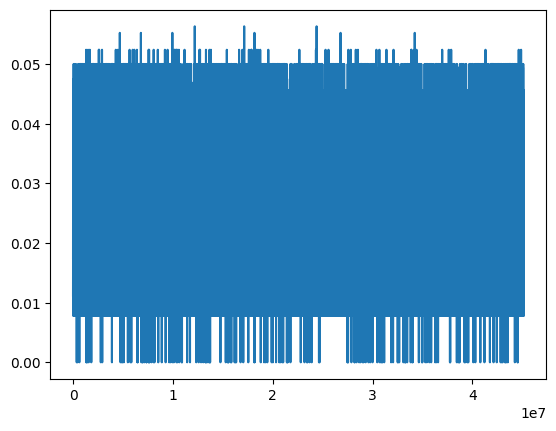

In [10]:
# combined = I + 1j * Q
plt.plot(np.abs(dataWithOutInterference))
plt.show()

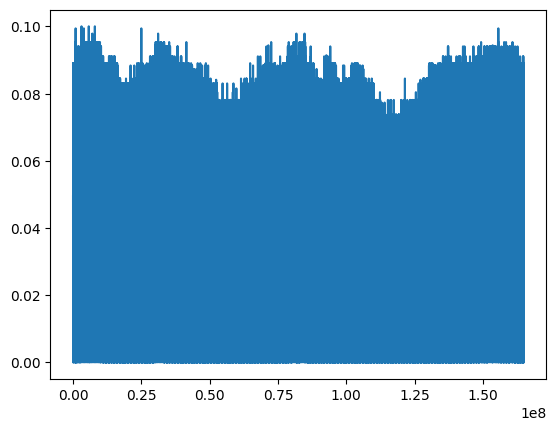

In [11]:
plt.plot(np.abs(dataWithInterferenceLOSCenter))
plt.show()

### Plotting Power Spectral Density (PSD)

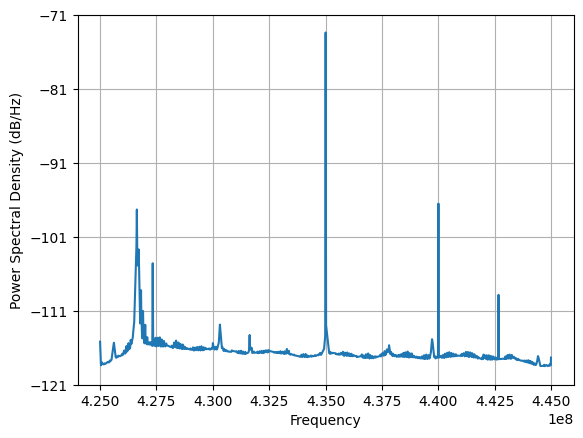

In [11]:
fig = plt.figure()
plt.psd(dataWithOutInterference, NFFT=2048, Fc=435e6, Fs=20e6)
#plt.xlim(4326, 434e6)
plt.show()

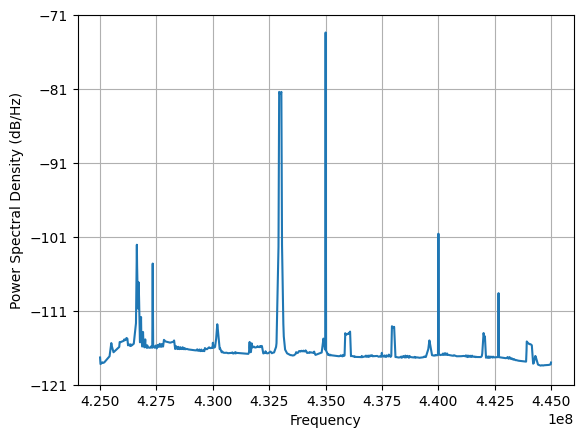

In [10]:
fig = plt.figure()
plt.psd(dataWithInterferenceLOSCenter, NFFT=2048, Fc=435e6, Fs=20e6)
#plt.xlim(432e6, 434e6)
plt.show()

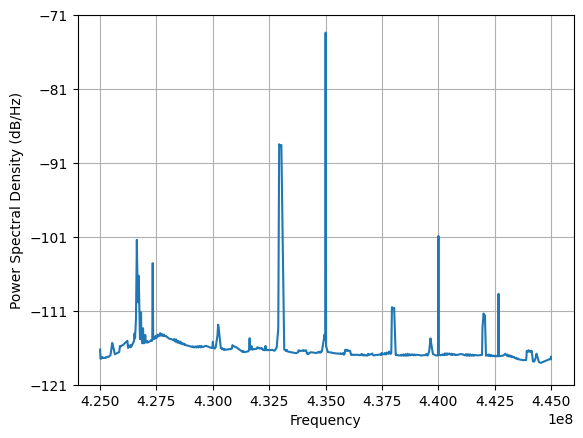

In [15]:
fig = plt.figure()
plt.psd(dataWithInterferenceLOSFirstQuartile, NFFT=2048, Fc=435e6, Fs=20e6)
#plt.xlim(432e6, 434e6)
plt.show()

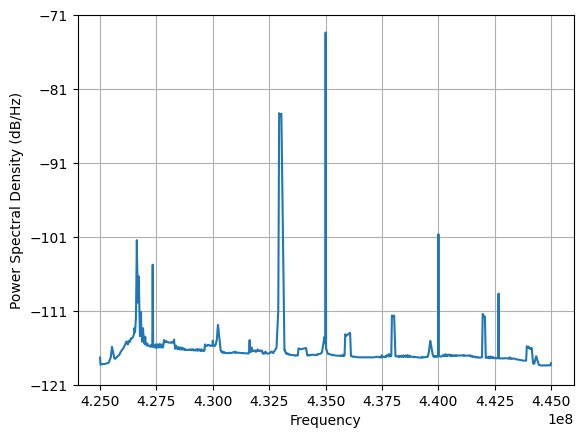

In [17]:
fig = plt.figure()
plt.psd(dataWithInterferenceLOSThirdQuartile, NFFT=2048, Fc=435e6, Fs=20e6)
#plt.xlim(432e6, 434e6)
plt.show()

### Plotting Spectrogram

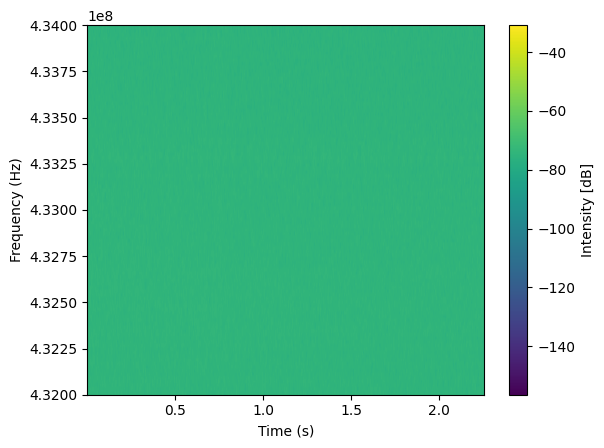

In [12]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(dataWithOutInterference, NFFT=1024, Fs=20e6, Fc=435e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.ylim(432e6, 434e6)
plt.show()

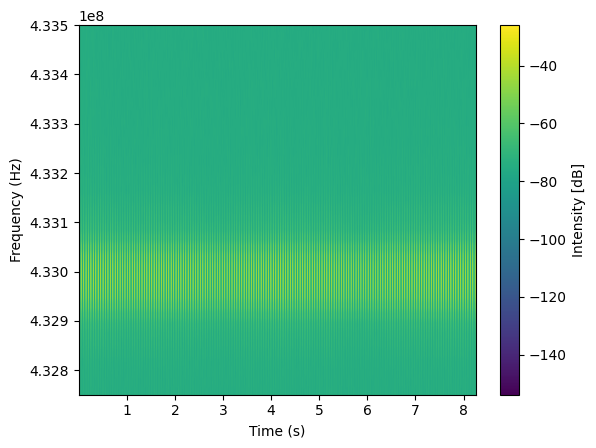

In [13]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(dataWithInterferenceLOSCenter, NFFT=1024, Fs=20e6, Fc=435e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.ylim(432.75e6, 433.5e6)
plt.show()

(432750000.0, 433500000.0)

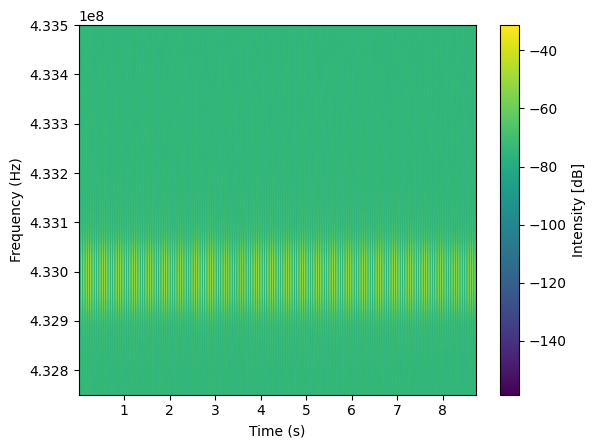

In [18]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(dataWithInterferenceLOSFirstQuartile, NFFT=1024, Fs=20e6, Fc=435e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.ylim(432.75e6, 433.5e6)

### Statistical Values for Locations

#### LOS

In [ ]:
#LOS Center
LOS_Center_rssi = calculate_rssi(dataWithInterferenceLOSCenterDC)
LOS_Center_magnitude = calculate_IQMagnitude(dataWithInterferenceLOSCenterDC)
LOS_Center_phase = calculate_IQ_Angle(dataWithInterferenceLOSCenterDC)
LOS_Center_cov = compute_covariance(dataWithInterferenceLOSCenterDC)
LOS_Center_mode = stats.mode(dataWithInterferenceLOSCenterDC)
LOS_Center_skewness = stats.skew(dataWithInterferenceLOSCenterDC)
LOS_Center_kurtosis = stats.kurtosis(dataWithInterferenceLOSCenterDC)
LOS_Center_correlation_coefficient = np.corrcoef(dataWithInterferenceLOSCenterDC, dataWithInterferenceLOSCenterDC)[0, 1]
LOS_Center_z_scores = stats.zscore(dataWithInterferenceLOSCenterDC)

# LOS_Center_q1 = np.percentile(dataWithInterferenceLOSCenterDC, 25)
# LOS_Center_q3 = np.percentile(dataWithInterferenceLOSCenterDC, 75)
# LOS_Center_iqr = LOS_Center_q3 - LOS_Center_q1
# LOS_Center_percentiles = np.percentile(dataWithInterferenceLOSCenterDC, [10, 25, 50, 75, 90])

LOS_Center_correlation_coefficient_withmag = np.corrcoef(LOS_Center_magnitude, LOS_Center_magnitude)

print("LOS Center RSSI:", LOS_Center_rssi)
print("LOS Center Magnitude:", LOS_Center_magnitude)
print("LOS Center Phase:", LOS_Center_phase)
print("LOS Center Amplitude:", LOS_Center_amplitude)
print("LOS Center Covariance:", LOS_Center_cov)
print("LOS Center Mode:", LOS_Center_mode)
print("LOS Center Skewness:", LOS_Center_skewness)
print("LOS Center Kurtosis:", LOS_Center_kurtosis)
print("LOS Center Correlation Coefficient:", LOS_Center_correlation_coefficient)
print("LOS Center Z-scores:", LOS_Center_z_scores)

print("LOS Center Correlation Coefficient:", LOS_Center_correlation_coefficient_withmag)


#Used for the statistical vector

LOS_Center_magnitude = calculate_IQMagnitude(dataWithInterferenceLOSCenterDC)
LOS_Center_mean = np.mean(dataWithInterferenceLOSCenterDC)
LOS_Center_var = np.var(dataWithInterferenceLOSCenterDC)
LOS_Center_median = np.median(dataWithInterferenceLOSCenterDC)
LOS_Center_std_dev = np.std(dataWithInterferenceLOSCenterDC)
LOS_Center_min = np.min(dataWithInterferenceLOSCenterDC)
LOS_Center_max = np.max(dataWithInterferenceLOSCenterDC)
LOS_Center_range = LOS_Center_max - LOS_Center_min
LOS_Center_mad = np.mean(np.abs(dataWithInterferenceLOSCenterDC - LOS_Center_mean))
LOS_Center_coefficient_of_variance = LOS_Center_std_dev / LOS_Center_mean if LOS_Center_mean != 0 else np.nan


LOS_Center_mean_withmag = np.mean(LOS_Center_magnitude)
LOS_Center_var_withmag = np.var(LOS_Center_magnitude)
LOS_Center_median_withmag = np.median(LOS_Center_magnitude)
LOS_Center_std_dev_withmag = np.std(LOS_Center_magnitude)
LOS_Center_min_withmag = np.min(LOS_Center_magnitude)
LOS_Center_max_withmag = np.max(LOS_Center_magnitude)
LOS_Center_range_withmag = LOS_Center_max_withmag - LOS_Center_min_withmag
LOS_Center_mad_withmag = np.mean(np.abs(LOS_Center_magnitude - LOS_Center_mean_withmag))
LOS_Center_coefficient_of_variance_withmag = LOS_Center_std_dev_withmag / LOS_Center_mean_withmag if LOS_Center_mean_withmag != 0 else np.nan


LOS_Center_skewness_withmag = stats.skew(LOS_Center_magnitude)
LOS_Center_kurtosis_withmag = stats.kurtosis(LOS_Center_magnitude)
LOS_Center_q1_withmag = np.percentile(LOS_Center_magnitude, 25)
LOS_Center_q3_withmag = np.percentile(LOS_Center_magnitude, 75)
LOS_Center_iqr_withmag = LOS_Center_q3_withmag - LOS_Center_q1_withmag
LOS_Center_percentiles_withmag = np.percentile(LOS_Center_magnitude, [10, 25, 50, 75, 90])


LOS_Center_mean_FFT = np.mean(dataWithInterferenceLOSCenterFFT)
LOS_Center_var_FFT = np.var(dataWithInterferenceLOSCenterFFT)
LOS_Center_median_FFT = np.median(dataWithInterferenceLOSCenterFFT)
LOS_Center_std_dev_FFT = np.std(dataWithInterferenceLOSCenterFFT)
LOS_Center_min_FFT = np.min(dataWithInterferenceLOSCenterFFT)
LOS_Center_max_FFT = np.max(dataWithInterferenceLOSCenterFFT)
LOS_Center_range_FFT = LOS_Center_max_FFT - LOS_Center_min_FFT
LOS_Center_mad_FFT = np.mean(np.abs(dataWithInterferenceLOSCenterFFT - LOS_Center_mean_FFT))
LOS_Center_coefficient_of_variance_FFT = LOS_Center_std_dev_FFT / LOS_Center_mean_FFT if LOS_Center_mean_FFT != 0 else np.nan
LOS_Center_skewness_FFT = stats.skew(dataWithInterferenceLOSCenterFFT)
LOS_Center_kurtosis_FFT = stats.kurtosis(dataWithInterferenceLOSCenterFFT)
# LOS_Center_q1_FFT = np.percentile(dataWithInterferenceLOSCenterFFT, 25)
# LOS_Center_q3_FFT = np.percentile(dataWithInterferenceLOSCenterFFT, 75)
# LOS_Center_iqr_FFT = LOS_Center_q3_FFT - LOS_Center_q1_FFT
# LOS_Center_percentiles_FFT = np.percentile(dataWithInterferenceLOSCenterFFT, [10, 25, 50, 75, 90])



print("LOS Center Mean:", LOS_Center_mean)
print("LOS Center Variance:", LOS_Center_var)
print("LOS Center Median:", LOS_Center_median)
print("LOS Center Standard Deviation:", LOS_Center_std_dev)
print("LOS Center Min:", LOS_Center_min)
print("LOS Center Max:", LOS_Center_max)
print("LOS Center Range:", LOS_Center_range)
print("LOS Center MAD:", LOS_Center_mad)
print("LOS Center Coefficient of Variance:", LOS_Center_coefficient_of_variance)


print("\n\n")
print("Magnitude\n")
print("LOS Center Mean:", LOS_Center_mean_withmag)
print("LOS Center Variance:", LOS_Center_var_withmag)
print("LOS Center Median:", LOS_Center_median_withmag)
print("LOS Center Standard Deviation:", LOS_Center_std_dev_withmag)
print("LOS Center Min:", LOS_Center_min_withmag)
print("LOS Center Max:", LOS_Center_max_withmag)
print("LOS Center Range:", LOS_Center_range_withmag)
print("LOS Center MAD:", LOS_Center_mad_withmag)
print("LOS Center Coefficient of Variance:", LOS_Center_coefficient_of_variance_withmag)

print("\n\n")
print("LOS Center Q1:", LOS_Center_q1_withmag)
print("LOS Center Q3:", LOS_Center_q3_withmag)
print("LOS Center IQR:", LOS_Center_iqr_withmag)
print("LOS Center Percentiles (10th, 25th, 50th, 75th, 90th):", LOS_Center_percentiles_withmag)
print("LOS Center Skewness:", LOS_Center_skewness_withmag)
print("LOS Center Kurtosis:", LOS_Center_kurtosis_withmag)

print("\n\n")
print("FFT\n")
print("LOS Center Mean:", LOS_Center_mean_FFT)
print("LOS Center Variance:", LOS_Center_var_FFT)
print("LOS Center Median:", LOS_Center_median_FFT)
print("LOS Center Standard Deviation:", LOS_Center_std_dev_FFT)
print("LOS Center Min:", LOS_Center_min_FFT)
print("LOS Center Max:", LOS_Center_max_FFT)
print("LOS Center Range:", LOS_Center_range_FFT)
print("LOS Center MAD:", LOS_Center_mad_FFT)
print("LOS Center Coefficient of Variance:", LOS_Center_coefficient_of_variance_FFT)
# print("LOS Center Q1:", LOS_Center_q1_FFT)
# print("LOS Center Q3:", LOS_Center_q3_FFT)
# print("LOS Center IQR:", LOS_Center_iqr_FFT)
# print("LOS Center Percentiles (10th, 25th, 50th, 75th, 90th):", LOS_Center_percentiles_FFT)
print("LOS Center Skewness:", LOS_Center_skewness_FFT)
print("LOS Center Kurtosis:", LOS_Center_kurtosis_FFT)




NameError: name 'calculate_rssi' is not defined

In [20]:
LOS_Center_amplitude = np.abs(dataWithInterferenceLOSCenterDC)
LOS_Center_angle = np.angle(dataWithInterferenceLOSCenterDC)

In [25]:
LOS_Center_vector = np.array([
    LOS_Center_mean,
    LOS_Center_var,
    LOS_Center_median,
    LOS_Center_std_dev,
    LOS_Center_min,
    LOS_Center_max,
    LOS_Center_range,
    LOS_Center_mad,
    LOS_Center_coefficient_of_variance,
    LOS_Center_skewness_withmag,
    LOS_Center_kurtosis_withmag,
    LOS_Center_q1_withmag,
    LOS_Center_q3_withmag,
    LOS_Center_iqr_withmag,
    *LOS_Center_percentiles_withmag  # Unpack percentiles into the vector
])



# Print the vector
print("LOS Center Vector:", LOS_Center_vector)


LOS Center Vector: [ 7.30538741e-09-9.15122556e-09j  9.03468463e-04+0.00000000e+00j
  1.36089697e-03-3.71706858e-03j  3.00577525e-02+0.00000000e+00j
 -6.89516068e-02-2.71545686e-02j  7.16733932e-02+1.97204314e-02j
  1.40625000e-01+4.68750000e-02j  2.39466056e-02+0.00000000e+00j
  1.60147138e+06+2.00611212e+06j  1.45847231e-01+0.00000000e+00j
 -1.67988014e+00+0.00000000e+00j  4.31562262e-03+0.00000000e+00j
  4.20354828e-02+0.00000000e+00j  3.77198607e-02+0.00000000e+00j
  3.95836309e-03+0.00000000e+00j  4.31562262e-03+0.00000000e+00j
  2.57417243e-02+0.00000000e+00j  4.20354828e-02+0.00000000e+00j
  4.69517261e-02+0.00000000e+00j]


In [26]:
LOS_Center_vector_withmag = np.array([
    LOS_Center_mean_withmag,
    LOS_Center_var_withmag,
    LOS_Center_median_withmag,
    LOS_Center_std_dev_withmag,
    LOS_Center_min_withmag,
    LOS_Center_max_withmag,
    LOS_Center_range_withmag,
    LOS_Center_mad_withmag,
    LOS_Center_coefficient_of_variance_withmag,
    LOS_Center_skewness_withmag,
    LOS_Center_kurtosis_withmag,
    LOS_Center_q1_withmag,
    LOS_Center_q3_withmag,
    LOS_Center_iqr_withmag,
    *LOS_Center_percentiles_withmag  # Unpack percentiles into the vector
], dtype=float)
print("LOS Center Vector:", LOS_Center_vector_withmag)

LOS_Center_vector_FFT = np.array([
    LOS_Center_mean_FFT,
    LOS_Center_var_FFT,
    LOS_Center_median_FFT,
    LOS_Center_std_dev_FFT,
    LOS_Center_min_FFT,
    LOS_Center_max_FFT,
    LOS_Center_range_FFT,
    LOS_Center_mad_FFT,
    LOS_Center_coefficient_of_variance_FFT,
], dtype=float)
print("LOS Center Vector FFT:", LOS_Center_vector_FFT)

LOS Center Vector: [ 2.39466056e-02  3.30031588e-04  2.57417243e-02  1.81667712e-02
  3.95836309e-03  7.46195763e-02  7.06612170e-02  1.73221156e-02
  7.58636594e-01  1.45847231e-01 -1.67988014e+00  4.31562262e-03
  4.20354828e-02  3.77198607e-02  3.95836309e-03  4.31562262e-03
  2.57417243e-02  4.20354828e-02  4.69517261e-02]
LOS Center Vector FFT: [-2.98891161e-02  1.49090859e+05 -5.81049919e-03  3.86122864e+02
 -6.35545781e+04  8.24858672e+04  1.46040438e+05  9.90851746e+01
 -5.38623047e+03]


C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_23364\3428092188.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  LOS_Center_vector_FFT = np.array([


In [27]:
#LOS First Quartile
# LOS_first_quartile_rssi = calculate_rssi(dataWithInterferenceLOSFirstQuartileDC)
# LOS_first_quartile_mean = np.mean(dataWithInterferenceLOSFirstQuartileDC)
# LOS_first_quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartileDC)
# LOS_first_quartile_var = np.var(dataWithInterferenceLOSFirstQuartileDC)
# LOS_first_quartile_phase = calculate_IQ_Angle(dataWithInterferenceLOSFirstQuartileDC)
# LOS_first_quartile_cov = compute_covariance(dataWithInterferenceLOSFirstQuartileDC)

# print("LOS First Quartile RSSI:", LOS_first_quartile_rssi)
# print("LOS First Quartile Mean:", LOS_first_quartile_mean)
# print("LOS First Quartile Magnitude:", LOS_first_quartile_magnitude)
# print("LOS First Quartile Variance:", LOS_first_quartile_var)
# print("LOS First Quartile Phase:", LOS_first_quartile_phase)
# print("LOS First Quartile Amplitude:", LOS_first_quartile_amplitude)
# print("LOS First Quartile Covariance:", LOS_first_quartile_cov)

LOS_First_Quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartileDC)
LOS_First_Quartile_mean = np.mean(dataWithInterferenceLOSFirstQuartileDC)
LOS_First_Quartile_var = np.var(dataWithInterferenceLOSFirstQuartileDC)
LOS_First_Quartile_median = np.median(dataWithInterferenceLOSFirstQuartileDC)
LOS_First_Quartile_std_dev = np.std(dataWithInterferenceLOSFirstQuartileDC)
LOS_First_Quartile_min = np.min(dataWithInterferenceLOSFirstQuartileDC)
LOS_First_Quartile_max = np.max(dataWithInterferenceLOSFirstQuartileDC)
LOS_First_Quartile_range = LOS_First_Quartile_max - LOS_First_Quartile_min
LOS_First_Quartile_mad = np.mean(np.abs(dataWithInterferenceLOSFirstQuartileDC - LOS_First_Quartile_mean))
LOS_First_Quartile_coefficient_of_variance = (
    LOS_First_Quartile_std_dev / LOS_First_Quartile_mean if LOS_First_Quartile_mean != 0 else np.nan
)

LOS_First_Quartile_mean_withmag = np.mean(LOS_First_Quartile_magnitude)
LOS_First_Quartile_var_withmag = np.var(LOS_First_Quartile_magnitude)
LOS_First_Quartile_median_withmag = np.median(LOS_First_Quartile_magnitude)
LOS_First_Quartile_std_dev_withmag = np.std(LOS_First_Quartile_magnitude)
LOS_First_Quartile_min_withmag = np.min(LOS_First_Quartile_magnitude)
LOS_First_Quartile_max_withmag = np.max(LOS_First_Quartile_magnitude)
LOS_First_Quartile_range_withmag = LOS_First_Quartile_max_withmag - LOS_First_Quartile_min_withmag
LOS_First_Quartile_mad_withmag = np.mean(np.abs(LOS_First_Quartile_magnitude - LOS_First_Quartile_mean_withmag))
LOS_First_Quartile_coefficient_of_variance_withmag = (
    LOS_First_Quartile_std_dev_withmag / LOS_First_Quartile_mean_withmag if LOS_First_Quartile_mean_withmag != 0 else np.nan
)

LOS_First_Quartile_skewness_withmag = stats.skew(LOS_First_Quartile_magnitude)
LOS_First_Quartile_kurtosis_withmag = stats.kurtosis(LOS_First_Quartile_magnitude)
LOS_First_Quartile_q1_withmag = np.percentile(LOS_First_Quartile_magnitude, 25)
LOS_First_Quartile_q3_withmag = np.percentile(LOS_First_Quartile_magnitude, 75)
LOS_First_Quartile_iqr_withmag = LOS_First_Quartile_q3_withmag - LOS_First_Quartile_q1_withmag
LOS_First_Quartile_percentiles_withmag = np.percentile(LOS_First_Quartile_magnitude, [10, 25, 50, 75, 90])

LOS_First_Quartile_mean_FFT = np.mean(dataWithInterferenceLOSFirstQuartileFFT)
LOS_First_Quartile_var_FFT = np.var(dataWithInterferenceLOSFirstQuartileFFT)
LOS_First_Quartile_median_FFT = np.median(dataWithInterferenceLOSFirstQuartileFFT)
LOS_First_Quartile_std_dev_FFT = np.std(dataWithInterferenceLOSFirstQuartileFFT)
LOS_First_Quartile_min_FFT = np.min(dataWithInterferenceLOSFirstQuartileFFT)
LOS_First_Quartile_max_FFT = np.max(dataWithInterferenceLOSFirstQuartileFFT)
LOS_First_Quartile_range_FFT = LOS_First_Quartile_max_FFT - LOS_First_Quartile_min_FFT
LOS_First_Quartile_mad_FFT = np.mean(np.abs(dataWithInterferenceLOSFirstQuartileFFT - LOS_First_Quartile_mean_FFT))
LOS_First_Quartile_coefficient_of_variance_FFT = (
    LOS_First_Quartile_std_dev_FFT / LOS_First_Quartile_mean_FFT if LOS_First_Quartile_mean_FFT != 0 else np.nan
)

LOS_First_Quartile_skewness_FFT = stats.skew(dataWithInterferenceLOSFirstQuartileFFT)
LOS_First_Quartile_kurtosis_FFT = stats.kurtosis(dataWithInterferenceLOSFirstQuartileFFT)

print("LOS First Quartile Mean:", LOS_First_Quartile_mean)
print("LOS First Quartile Variance:", LOS_First_Quartile_var)
print("LOS First Quartile Median:", LOS_First_Quartile_median)
print("LOS First Quartile Standard Deviation:", LOS_First_Quartile_std_dev)
print("LOS First Quartile Min:", LOS_First_Quartile_min)
print("LOS First Quartile Max:", LOS_First_Quartile_max)
print("LOS First Quartile Range:", LOS_First_Quartile_range)
print("LOS First Quartile MAD:", LOS_First_Quartile_mad)
print("LOS First Quartile Coefficient of Variance:", LOS_First_Quartile_coefficient_of_variance)

print("\n\n")
print("Magnitude")
print("LOS First Quartile Mean:", LOS_First_Quartile_mean_withmag)
print("LOS First Quartile Variance:", LOS_First_Quartile_var_withmag)
print("LOS First Quartile Median:", LOS_First_Quartile_median_withmag)
print("LOS First Quartile Standard Deviation:", LOS_First_Quartile_std_dev_withmag)
print("LOS First Quartile Min:", LOS_First_Quartile_min_withmag)
print("LOS First Quartile Max:", LOS_First_Quartile_max_withmag)
print("LOS First Quartile Range:", LOS_First_Quartile_range_withmag)
print("LOS First Quartile MAD:", LOS_First_Quartile_mad_withmag)
print("LOS First Quartile Coefficient of Variance:", LOS_First_Quartile_coefficient_of_variance_withmag)

print("\n")
print("LOS First Quartile Q1:", LOS_First_Quartile_q1_withmag)
print("LOS First Quartile Q3:", LOS_First_Quartile_q3_withmag)
print("LOS First Quartile IQR:", LOS_First_Quartile_iqr_withmag)
print("LOS First Quartile Percentiles (10th, 25th, 50th, 75th, 90th):", LOS_First_Quartile_percentiles_withmag)
print("LOS First Quartile Skewness:", LOS_First_Quartile_skewness_withmag)
print("LOS First Quartile Kurtosis:", LOS_First_Quartile_kurtosis_withmag)

print("\n\n")
print("FFT")
print("LOS First Quartile Mean:", LOS_First_Quartile_mean_FFT)
print("LOS First Quartile Variance:", LOS_First_Quartile_var_FFT)
print("LOS First Quartile Median:", LOS_First_Quartile_median_withmag)
print("LOS First Quartile Standard Deviation:", LOS_First_Quartile_std_dev_FFT)
print("LOS First Quartile Min:", LOS_First_Quartile_min_FFT)
print("LOS First Quartile Max:", LOS_First_Quartile_max_FFT)
print("LOS First Quartile Range:", LOS_First_Quartile_range_FFT)
print("LOS First Quartile MAD:", LOS_First_Quartile_mad_FFT)
print("LOS First Quartile Coefficient of Variance:", LOS_First_Quartile_coefficient_of_variance_FFT)



LOS First Quartile Mean: (8.203961e-08-4.5578386e-08j)
LOS First Quartile Variance: 0.00021647722
LOS First Quartile Median: (0.0012797769-0.0037231464j)
LOS First Quartile Standard Deviation: 0.014713164
LOS First Quartile Min: (-0.04559522-0.011535646j)
LOS First Quartile Max: (0.04815478-0.0037231464j)
LOS First Quartile Range: (0.09375+0.0078125j)
LOS First Quartile MAD: 0.012601509
LOS First Quartile Coefficient of Variance: (137043.34+76136.56j)



Magnitude
LOS First Quartile Mean: 0.01260151
LOS First Quartile Variance: 5.7677622e-05
LOS First Quartile Median: 0.011606419
LOS First Quartile Standard Deviation: 0.0075945784
LOS First Quartile Min: 0.0039369594
LOS First Quartile Max: 0.049729533
LOS First Quartile Range: 0.045792572
LOS First Quartile MAD: 0.0066221426
LOS First Quartile Coefficient of Variance: 0.6026721


LOS First Quartile Q1: 0.004284932
LOS First Quartile Q3: 0.019390425
LOS First Quartile IQR: 0.015105493
LOS First Quartile Percentiles (10th, 25th, 50th, 7

In [22]:
LOS_first_quartile_amplitude = np.abs(dataWithInterferenceLOSFirstQuartileDC)
LOS_first_quartile_angle = np.angle(dataWithInterferenceLOSFirstQuartileDC)

In [28]:
LOS_First_Quartile_vector = np.array([
    LOS_First_Quartile_mean,
    LOS_First_Quartile_var,
    LOS_First_Quartile_median,
    LOS_First_Quartile_std_dev,
    LOS_First_Quartile_min,
    LOS_First_Quartile_max,
    LOS_First_Quartile_range,
    LOS_First_Quartile_mad,
    LOS_First_Quartile_coefficient_of_variance,
    LOS_First_Quartile_skewness_withmag,
    LOS_First_Quartile_kurtosis_withmag,
    LOS_First_Quartile_q1_withmag,
    LOS_First_Quartile_q3_withmag,
    LOS_First_Quartile_iqr_withmag,
    *LOS_First_Quartile_percentiles_withmag  # Unpack percentiles into the vector
])



# Print the vector
print("LOS First Quartile Vector:", LOS_First_Quartile_vector)



LOS First Quartile Vector: [ 8.20396124e-08-4.55783855e-08j  2.16477216e-04+0.00000000e+00j
  1.27977692e-03-3.72314639e-03j  1.47131644e-02+0.00000000e+00j
 -4.55952212e-02-1.15356464e-02j  4.81547788e-02-3.72314639e-03j
  9.37500000e-02+7.81250000e-03j  1.26015088e-02+0.00000000e+00j
  1.37043344e+05+7.61365625e+04j  4.74434674e-01+0.00000000e+00j
 -8.89711380e-01+0.00000000e+00j  4.28493181e-03+0.00000000e+00j
  1.93904247e-02+0.00000000e+00j  1.51054934e-02+0.00000000e+00j
  3.93695943e-03+0.00000000e+00j  4.28493181e-03+0.00000000e+00j
  1.16064195e-02+0.00000000e+00j  1.93904247e-02+0.00000000e+00j
  2.25319229e-02+0.00000000e+00j]


In [29]:
LOS_First_Quartile_vector_withmag = np.array([
    LOS_First_Quartile_mean_withmag,
    LOS_First_Quartile_var_withmag,
    LOS_First_Quartile_median_withmag,
    LOS_First_Quartile_std_dev_withmag,
    LOS_First_Quartile_min_withmag,
    LOS_First_Quartile_max_withmag,
    LOS_First_Quartile_range_withmag,
    LOS_First_Quartile_mad_withmag,
    LOS_First_Quartile_coefficient_of_variance_withmag,
    LOS_First_Quartile_skewness_withmag,
    LOS_First_Quartile_kurtosis_withmag,
    LOS_First_Quartile_q1_withmag,
    LOS_First_Quartile_q3_withmag,
    LOS_First_Quartile_iqr_withmag,
    *LOS_First_Quartile_percentiles_withmag  # Unpack percentiles into the vector
], dtype=float)

print("\n\n")
print("LOS First Quartile Vector:", LOS_First_Quartile_vector_withmag)

LOS_First_Quartile_vector_FFT = np.array([
    LOS_First_Quartile_mean_FFT,
    LOS_First_Quartile_var_FFT,
    LOS_First_Quartile_median_FFT,
    LOS_First_Quartile_std_dev_FFT,
    LOS_First_Quartile_min_FFT,
    LOS_First_Quartile_max_FFT,
    LOS_First_Quartile_range_FFT,
    LOS_First_Quartile_mad_FFT,
    LOS_First_Quartile_coefficient_of_variance_FFT,
], dtype=float)

print("\n\n")
print("LOS First Quartile Vector:", LOS_First_Quartile_vector_FFT)




LOS First Quartile Vector: [ 1.26015097e-02  5.76776220e-05  1.16064195e-02  7.59457843e-03
  3.93695943e-03  4.97295335e-02  4.57925722e-02  6.62214262e-03
  6.02672100e-01  4.74434674e-01 -8.89711380e-01  4.28493181e-03
  1.93904247e-02  1.51054934e-02  3.93695943e-03  4.28493181e-03
  1.16064195e-02  1.93904247e-02  2.25319229e-02]



LOS First Quartile Vector: [ 1.69048216e-02  3.77738359e+04  1.17820827e-02  1.94354919e+02
 -6.71534062e+04  8.58401719e+04  1.52993578e+05  9.02602005e+01
  4.97714551e+03]


C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_23364\2158297898.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  LOS_First_Quartile_vector_FFT = np.array([


In [30]:
#LOS Third Quartile
# LOS_third_quartile_rssi = calculate_rssi(dataWithInterferenceLOSThirdQuartileDC)
# LOS_third_quartile_mean = np.mean(dataWithInterferenceLOSThirdQuartileDC)
# LOS_third_quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartileDC)
# LOS_third_quartile_var = np.var(dataWithInterferenceLOSThirdQuartileDC)
# LOS_third_quartile_phase = calculate_IQ_Angle(dataWithInterferenceLOSThirdQuartileDC)
# LOS_third_quartile_cov = compute_covariance(dataWithInterferenceLOSThirdQuartileDC)

# print("LOS Third Quartile RSSI:", LOS_third_quartile_rssi)
# print("LOS Third Quartile Mean:", LOS_third_quartile_mean)
# print("LOS Third Quartile Magnitude:", LOS_third_quartile_magnitude)
# print("LOS Third Quartile Variance:", LOS_third_quartile_var)
# print("LOS Third Quartile Phase:", LOS_third_quartile_phase)
# print("LOS Third Quartile Amplitude:", LOS_third_quartile_amplitude)
# print("LOS Third Quartile Covariance:", LOS_third_quartile_cov)

LOS_Third_Quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartileDC)
LOS_Third_Quartile_mean = np.mean(dataWithInterferenceLOSThirdQuartileDC)
LOS_Third_Quartile_var = np.var(dataWithInterferenceLOSThirdQuartileDC)
LOS_Third_Quartile_median = np.median(dataWithInterferenceLOSThirdQuartileDC)
LOS_Third_Quartile_std_dev = np.std(dataWithInterferenceLOSThirdQuartileDC)
LOS_Third_Quartile_min = np.min(dataWithInterferenceLOSThirdQuartileDC)
LOS_Third_Quartile_max = np.max(dataWithInterferenceLOSThirdQuartileDC)
LOS_Third_Quartile_range = LOS_Third_Quartile_max - LOS_Third_Quartile_min
LOS_Third_Quartile_mad = np.mean(np.abs(dataWithInterferenceLOSThirdQuartileDC - LOS_Third_Quartile_mean))
LOS_Third_Quartile_coefficient_of_variance = LOS_Third_Quartile_std_dev / LOS_Third_Quartile_mean if LOS_Third_Quartile_mean != 0 else np.nan

LOS_Third_Quartile_mean_withmag = np.mean(LOS_Third_Quartile_magnitude)
LOS_Third_Quartile_var_withmag = np.var(LOS_Third_Quartile_magnitude)
LOS_Third_Quartile_median_withmag = np.median(LOS_Third_Quartile_magnitude)
LOS_Third_Quartile_std_dev_withmag = np.std(LOS_Third_Quartile_magnitude)
LOS_Third_Quartile_min_withmag = np.min(LOS_Third_Quartile_magnitude)
LOS_Third_Quartile_max_withmag = np.max(LOS_Third_Quartile_magnitude)
LOS_Third_Quartile_range_withmag = LOS_Third_Quartile_max_withmag - LOS_Third_Quartile_min_withmag
LOS_Third_Quartile_mad_withmag = np.mean(np.abs(LOS_Third_Quartile_magnitude - LOS_Third_Quartile_mean_withmag))
LOS_Third_Quartile_coefficient_of_variance_withmag = LOS_Third_Quartile_std_dev_withmag / LOS_Third_Quartile_mean_withmag if LOS_Third_Quartile_mean_withmag != 0 else np.nan

LOS_Third_Quartile_skewness_withmag = stats.skew(LOS_Third_Quartile_magnitude)
LOS_Third_Quartile_kurtosis_withmag = stats.kurtosis(LOS_Third_Quartile_magnitude)
LOS_Third_Quartile_q1_withmag = np.percentile(LOS_Third_Quartile_magnitude, 25)
LOS_Third_Quartile_q3_withmag = np.percentile(LOS_Third_Quartile_magnitude, 75)
LOS_Third_Quartile_iqr_withmag = LOS_Third_Quartile_q3_withmag - LOS_Third_Quartile_q1_withmag
LOS_Third_Quartile_percentiles_withmag = np.percentile(LOS_Third_Quartile_magnitude, [10, 25, 50, 75, 90])

LOS_Third_Quartile_mean_FFT = np.mean(dataWithInterferenceLOSThirdQuartileFFT)
LOS_Third_Quartile_var_FFT = np.var(dataWithInterferenceLOSThirdQuartileFFT)
LOS_Third_Quartile_median_FFT = np.median(dataWithInterferenceLOSThirdQuartileFFT)
LOS_Third_Quartile_std_dev_FFT = np.std(dataWithInterferenceLOSThirdQuartileFFT)
LOS_Third_Quartile_min_FFT = np.min(dataWithInterferenceLOSThirdQuartileFFT)
LOS_Third_Quartile_max_FFT = np.max(dataWithInterferenceLOSThirdQuartileFFT)
LOS_Third_Quartile_range_FFT = LOS_Third_Quartile_max_FFT - LOS_Third_Quartile_min_FFT
LOS_Third_Quartile_mad_FFT = np.mean(np.abs(dataWithInterferenceLOSThirdQuartileFFT - LOS_Third_Quartile_mean_FFT))
LOS_Third_Quartile_coefficient_of_variance_FFT = (
    LOS_Third_Quartile_std_dev_FFT / LOS_Third_Quartile_mean_FFT 
    if LOS_Third_Quartile_mean_FFT != 0 else np.nan
)

print("LOS Third Quartile Mean:", LOS_Third_Quartile_mean)
print("LOS Third Quartile Variance:", LOS_Third_Quartile_var)
print("LOS Third Quartile Median:", LOS_Third_Quartile_median)
print("LOS Third Quartile Standard Deviation:", LOS_Third_Quartile_std_dev)
print("LOS Third Quartile Min:", LOS_Third_Quartile_min)
print("LOS Third Quartile Max:", LOS_Third_Quartile_max)
print("LOS Third Quartile Range:", LOS_Third_Quartile_range)
print("LOS Third Quartile MAD:", LOS_Third_Quartile_mad)
print("LOS Third Quartile Coefficient of Variance:", LOS_Third_Quartile_coefficient_of_variance)

print("\n\n")
print("Magnitude")
print("LOS Third Quartile Mean:", LOS_Third_Quartile_mean_withmag)
print("LOS Third Quartile Variance:", LOS_Third_Quartile_var_withmag)
print("LOS Third Quartile Median:", LOS_Third_Quartile_median_withmag)
print("LOS Third Quartile Standard Deviation:", LOS_Third_Quartile_std_dev_withmag)
print("LOS Third Quartile Min:", LOS_Third_Quartile_min_withmag)
print("LOS Third Quartile Max:", LOS_Third_Quartile_max_withmag)
print("LOS Third Quartile Range:", LOS_Third_Quartile_range_withmag)
print("LOS Third Quartile MAD:", LOS_Third_Quartile_mad)
print("LOS Third Quartile Coefficient of Variance:", LOS_Third_Quartile_coefficient_of_variance_withmag)

print("\n")
print("LOS Third Quartile Q1:", LOS_Third_Quartile_q1_withmag)
print("LOS Third Quartile Q3:", LOS_Third_Quartile_q3_withmag)
print("LOS Third Quartile IQR:", LOS_Third_Quartile_iqr_withmag)
print("LOS Third Quartile Percentiles (10th, 25th, 50th, 75th, 90th):", LOS_Third_Quartile_percentiles_withmag)
print("LOS Third Quartile Skewness:", LOS_Third_Quartile_skewness_withmag)
print("LOS Third Quartile Kurtosis:", LOS_Third_Quartile_kurtosis_withmag)

print("\n\n")
print("FFT")
print("LOS Third Quartile Mean:", LOS_Third_Quartile_mean_FFT)
print("LOS Third Quartile Variance:", LOS_Third_Quartile_var_FFT)
print("LOS Third Quartile Median:", LOS_Third_Quartile_median_FFT)
print("LOS Third Quartile Standard Deviation:", LOS_Third_Quartile_std_dev_FFT)
print("LOS Third Quartile Min:", LOS_Third_Quartile_min_FFT)
print("LOS Third Quartile Max:", LOS_Third_Quartile_max_FFT)
print("LOS Third Quartile Range:", LOS_Third_Quartile_range_FFT)
print("LOS Third Quartile MAD:", LOS_Third_Quartile_mad_FFT)
print("LOS Third Quartile Coefficient of Variance:", LOS_Third_Quartile_coefficient_of_variance_FFT)



LOS Third Quartile Mean: (-2.5573677e-08-1.091206e-08j)
LOS Third Quartile Variance: 0.0004857938
LOS Third Quartile Median: (0.0013266318-0.0036906172j)
LOS Third Quartile Standard Deviation: 0.02204073
LOS Third Quartile Min: (-0.05336087-0.019315617j)
LOS Third Quartile Max: (0.05601413+0.011934383j)
LOS Third Quartile Range: (0.109375+0.03125j)
LOS Third Quartile MAD: 0.018207187
LOS Third Quartile Coefficient of Variance: (-729107.1+311103.5j)



Magnitude
LOS Third Quartile Mean: 0.018207187
LOS Third Quartile Variance: 0.0001542953
LOS Third Quartile Median: 0.019361122
LOS Third Quartile Standard Deviation: 0.012421566
LOS Third Quartile Min: 0.0039218115
LOS Third Quartile Max: 0.059128445
LOS Third Quartile Range: 0.055206634
LOS Third Quartile MAD: 0.018207187
LOS Third Quartile Coefficient of Variance: 0.6822342


LOS Third Quartile Q1: 0.004330112
LOS Third Quartile Q3: 0.029645065
LOS Third Quartile IQR: 0.025314953
LOS Third Quartile Percentiles (10th, 25th, 50th, 75th, 

In [21]:
LOS_third_quartile_amplitude = np.abs(dataWithInterferenceLOSThirdQuartileDC)
LOS_third_quartile_angle = np.angle(dataWithInterferenceLOSThirdQuartileDC)

In [45]:
LOS_Third_Quartile_vector = np.array([
    LOS_Third_Quartile_mean,
    LOS_Third_Quartile_var,
    LOS_Third_Quartile_median,
    LOS_Third_Quartile_std_dev,
    LOS_Third_Quartile_min,
    LOS_Third_Quartile_max,
    LOS_Third_Quartile_range,
    LOS_Third_Quartile_mad,
    LOS_Third_Quartile_coefficient_of_variance,
    LOS_Third_Quartile_skewness_withmag,
    LOS_Third_Quartile_kurtosis_withmag,
    LOS_Third_Quartile_q1_withmag,
    LOS_Third_Quartile_q3_withmag,
    LOS_Third_Quartile_iqr_withmag,
    *LOS_Third_Quartile_percentiles_withmag  # Unpack percentiles into the vector
])

LOS_Third_Quartile_vector_withmag = np.array([
    LOS_Third_Quartile_mean_withmag,
    LOS_Third_Quartile_var_withmag,
    LOS_Third_Quartile_median_withmag,
    LOS_Third_Quartile_std_dev_withmag,
    LOS_Third_Quartile_min_withmag,
    LOS_Third_Quartile_max_withmag,
    LOS_Third_Quartile_range_withmag,
    LOS_Third_Quartile_mad_withmag,
    LOS_Third_Quartile_coefficient_of_variance_withmag,
    LOS_Third_Quartile_skewness_withmag,
    LOS_Third_Quartile_kurtosis_withmag,
    LOS_Third_Quartile_q1_withmag,
    LOS_Third_Quartile_q3_withmag,
    LOS_Third_Quartile_iqr_withmag,
    *LOS_Third_Quartile_percentiles_withmag  # Unpack percentiles into the vector
], dtype=float)

# Print the vector
print("LOS Third Quartile Vector:", LOS_Third_Quartile_vector)
print("\n")
print("LOS Third Quartile Vector:", LOS_Third_Quartile_vector_withmag)

LOS_Third_Quartile_vector_FFT = np.array([
    LOS_Third_Quartile_mean_FFT,
    LOS_Third_Quartile_var_FFT,
    LOS_Third_Quartile_median_FFT,
    LOS_Third_Quartile_std_dev_FFT,
    LOS_Third_Quartile_min_FFT,
    LOS_Third_Quartile_max_FFT,
    LOS_Third_Quartile_coefficient_of_variance_FFT,
    LOS_Third_Quartile_range_FFT,
    LOS_Third_Quartile_mad_FFT,
], dtype=float)

# Print the vector
print("\nLOS Third Quartile Vector FFT:", LOS_Third_Quartile_vector_FFT)


LOS Third Quartile Vector: [-2.55736765e-08-1.09120597e-08j  4.85793804e-04+0.00000000e+00j
  1.32663175e-03-3.69061716e-03j  2.20407303e-02+0.00000000e+00j
 -5.33608682e-02-1.93156172e-02j  5.60141318e-02+1.19343828e-02j
  1.09375000e-01+3.12500000e-02j  1.82071868e-02+0.00000000e+00j
 -7.29107125e+05+3.11103500e+05j  1.34379700e-01+0.00000000e+00j
 -1.60526443e+00+0.00000000e+00j  4.33011213e-03+0.00000000e+00j
  2.96450648e-02+0.00000000e+00j  2.53149532e-02+0.00000000e+00j
  3.92181147e-03+0.00000000e+00j  4.33011213e-03+0.00000000e+00j
  1.93611216e-02+0.00000000e+00j  2.96450648e-02+0.00000000e+00j
  3.46938968e-02+0.00000000e+00j]


LOS Third Quartile Vector: [ 1.82071868e-02  1.54295296e-04  1.93611216e-02  1.24215661e-02
  3.92181147e-03  5.91284446e-02  5.52066341e-02  1.17256530e-02
  6.82234228e-01  1.34379700e-01 -1.60526443e+00  4.33011213e-03
  2.96450648e-02  2.53149532e-02  3.92181147e-03  4.33011213e-03
  1.93611216e-02  2.96450648e-02  3.46938968e-02]

LOS Third Quar

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_23364\60159249.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  LOS_Third_Quartile_vector_FFT = np.array([


#### NLOS Left

In [32]:
# NLOS Left Center
# NLOS_left_center_rssi = calculate_rssi(dataWithInterferenceNLOSLeftCenterDC)
# NLOS_left_center_mean = np.mean(dataWithInterferenceNLOSLeftCenterDC)
# NLOS_left_center_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenterDC)
# NLOS_left_center_var = np.var(dataWithInterferenceNLOSLeftCenterDC)
# NLOS_left_center_phase = calculate_IQ_Angle(dataWithInterferenceNLOSLeftCenterDC)
# NLOS_left_center_amplitude = np.abs(dataWithInterferenceNLOSLeftCenterDC)
# NLOS_left_center_cov = compute_covariance(dataWithInterferenceNLOSLeftCenterDC)

# print("NLOS Left Center RSSI:", NLOS_left_center_rssi)
# print("NLOS Left Center Mean:", NLOS_left_center_mean)
# print("NLOS Left Center Magnitude:", NLOS_left_center_magnitude)
# print("NLOS Left Center Variance:", NLOS_left_center_var)
# print("NLOS Left Center Phase:", NLOS_left_center_phase)
# print("NLOS Left Center Amplitude:", NLOS_left_center_amplitude)
# print("NLOS Left Center Covariance:", NLOS_left_center_cov)

NLOS_Left_Center_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenterDC)
NLOS_Left_Center_mean = np.mean(dataWithInterferenceNLOSLeftCenterDC)
NLOS_Left_Center_var = np.var(dataWithInterferenceNLOSLeftCenterDC)
NLOS_Left_Center_median = np.median(dataWithInterferenceNLOSLeftCenterDC)
NLOS_Left_Center_std_dev = np.std(dataWithInterferenceNLOSLeftCenterDC)
NLOS_Left_Center_min = np.min(dataWithInterferenceNLOSLeftCenterDC)
NLOS_Left_Center_max = np.max(dataWithInterferenceNLOSLeftCenterDC)
NLOS_Left_Center_range = NLOS_Left_Center_max - NLOS_Left_Center_min
NLOS_Left_Center_mad = np.mean(np.abs(dataWithInterferenceNLOSLeftCenterDC - NLOS_Left_Center_mean))
NLOS_Left_Center_coefficient_of_variance = NLOS_Left_Center_std_dev / NLOS_Left_Center_mean if NLOS_Left_Center_mean != 0 else np.nan

NLOS_Left_Center_skewness_withmag = stats.skew(NLOS_Left_Center_magnitude)
NLOS_Left_Center_kurtosis_withmag = stats.kurtosis(NLOS_Left_Center_magnitude)
NLOS_Left_Center_q1_withmag = np.percentile(NLOS_Left_Center_magnitude, 25)
NLOS_Left_Center_q3_withmag = np.percentile(NLOS_Left_Center_magnitude, 75)
NLOS_Left_Center_iqr_withmag = NLOS_Left_Center_q3_withmag - NLOS_Left_Center_q1_withmag
NLOS_Left_Center_percentiles_withmag = np.percentile(NLOS_Left_Center_magnitude, [10, 25, 50, 75, 90])

NLOS_Left_Center_mean_withmag = np.mean(NLOS_Left_Center_magnitude)
NLOS_Left_Center_var_withmag = np.var(NLOS_Left_Center_magnitude)
NLOS_Left_Center_median_withmag = np.median(NLOS_Left_Center_magnitude)
NLOS_Left_Center_std_dev_withmag = np.std(NLOS_Left_Center_magnitude)
NLOS_Left_Center_min_withmag = np.min(NLOS_Left_Center_magnitude)
NLOS_Left_Center_max_withmag = np.max(NLOS_Left_Center_magnitude)
NLOS_Left_Center_range_withmag = NLOS_Left_Center_max_withmag - NLOS_Left_Center_min_withmag
NLOS_Left_Center_mad_withmag = np.mean(np.abs(NLOS_Left_Center_magnitude - NLOS_Left_Center_mean_withmag))
NLOS_Left_Center_coefficient_of_variance_withmag = NLOS_Left_Center_std_dev_withmag / NLOS_Left_Center_mean_withmag if NLOS_Left_Center_mean_withmag != 0 else np.nan

NLOS_Left_Center_magnitude_FFT = calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenterFFT)
NLOS_Left_Center_mean_FFT = np.mean(dataWithInterferenceNLOSLeftCenterFFT)
NLOS_Left_Center_var_FFT = np.var(dataWithInterferenceNLOSLeftCenterFFT)
NLOS_Left_Center_median_FFT = np.median(dataWithInterferenceNLOSLeftCenterFFT)
NLOS_Left_Center_std_dev_FFT = np.std(dataWithInterferenceNLOSLeftCenterFFT)
NLOS_Left_Center_min_FFT = np.min(dataWithInterferenceNLOSLeftCenterFFT)
NLOS_Left_Center_max_FFT = np.max(dataWithInterferenceNLOSLeftCenterFFT)
NLOS_Left_Center_range_FFT = NLOS_Left_Center_max_FFT - NLOS_Left_Center_min_FFT
NLOS_Left_Center_mad_FFT = np.mean(np.abs(dataWithInterferenceNLOSLeftCenterFFT - NLOS_Left_Center_mean_FFT))
NLOS_Left_Center_coefficient_of_variance_FFT = NLOS_Left_Center_std_dev_FFT / NLOS_Left_Center_mean_FFT if NLOS_Left_Center_mean_FFT != 0 else np.nan

print("NLOS Left Center Mean:", NLOS_Left_Center_mean)
print("NLOS Left Center Variance:", NLOS_Left_Center_var)
print("NLOS Left Center Median:", NLOS_Left_Center_median)
print("NLOS Left Center Standard Deviation:", NLOS_Left_Center_std_dev)
print("NLOS Left Center Min:", NLOS_Left_Center_min)
print("NLOS Left Center Max:", NLOS_Left_Center_max)
print("NLOS Left Center Range:", NLOS_Left_Center_range)
print("NLOS Left Center MAD:", NLOS_Left_Center_mad)
print("NLOS Left Center Coefficient of Variance:", NLOS_Left_Center_coefficient_of_variance)

print("NLOS Left Center Q1:", NLOS_Left_Center_q1_withmag)
print("NLOS Left Center Q3:", NLOS_Left_Center_q3_withmag)
print("NLOS Left Center IQR:", NLOS_Left_Center_iqr_withmag)
print("NLOS Left Center Percentiles (10th, 25th, 50th, 75th, 90th):", NLOS_Left_Center_percentiles_withmag)
print("NLOS Left Center Skewness:", NLOS_Left_Center_skewness_withmag)
print("NLOS Left Center Kurtosis:", NLOS_Left_Center_kurtosis_withmag)

print("\n\n")
print("Eucleidian Distance with Magnitude")
print("NLOS Left Center Mean with magnitude:", NLOS_Left_Center_mean_withmag)
print("NLOS Left Center Variance:", NLOS_Left_Center_var_withmag)
print("NLOS Left Center Median:", NLOS_Left_Center_median_withmag)
print("NLOS Left Center Standard Deviation:", NLOS_Left_Center_std_dev_withmag)
print("NLOS Left Center Min:", NLOS_Left_Center_min_withmag)
print("NLOS Left Center Max:", NLOS_Left_Center_max_withmag)
print("NLOS Left Center Range:", NLOS_Left_Center_range_withmag)
print("NLOS Left Center MAD:", NLOS_Left_Center_mad_withmag)
print("NLOS Left Center Coefficient of Variance:", NLOS_Left_Center_coefficient_of_variance_withmag)

print("\n\n")
print("FFT")
print("NLOS Left Center Mean with magnitude:", NLOS_Left_Center_mean_FFT)
print("NLOS Left Center Variance:", NLOS_Left_Center_var_FFT)
print("NLOS Left Center Median:", NLOS_Left_Center_median_FFT)
print("NLOS Left Center Standard Deviation:", NLOS_Left_Center_std_dev_FFT)
print("NLOS Left Center Min:", NLOS_Left_Center_min_FFT)
print("NLOS Left Center Max:", NLOS_Left_Center_max_FFT)
print("NLOS Left Center Range:", NLOS_Left_Center_range_FFT)
print("NLOS Left Center MAD:", NLOS_Left_Center_mad_FFT)
print("NLOS Left Center Coefficient of Variance:", NLOS_Left_Center_coefficient_of_variance_FFT)



NLOS Left Center Mean: (-5.4572347e-09-6.3764474e-09j)
NLOS Left Center Variance: 0.00032341233
NLOS Left Center Median: (0.0014163777-0.0036415718j)
NLOS Left Center Standard Deviation: 0.017983668
NLOS Left Center Min: (-0.053271122-0.019266572j)
NLOS Left Center Max: (0.056103878+0.011983428j)
NLOS Left Center Range: (0.109375+0.03125j)
NLOS Left Center MAD: 0.015199181
NLOS Left Center Coefficient of Variance: (-1393248.2+1627926j)
NLOS Left Center Q1: 0.007360124
NLOS Left Center Q3: 0.023939209
NLOS Left Center IQR: 0.016579084
NLOS Left Center Percentiles (10th, 25th, 50th, 75th, 90th): [0.00390732 0.00736012 0.01358355 0.02393921 0.02860854]
NLOS Left Center Skewness: 0.39181607961654663
NLOS Left Center Kurtosis: -1.075983



Eucleidian Distance with Magnitude
NLOS Left Center Mean with magnitude: 0.015199181
NLOS Left Center Variance: 9.239627e-05
NLOS Left Center Median: 0.013583554
NLOS Left Center Standard Deviation: 0.009612298
NLOS Left Center Min: 0.003907323
NLOS Left 

In [33]:
NLOS_Left_Center_vector = np.array([
    NLOS_Left_Center_mean,
    NLOS_Left_Center_var,
    NLOS_Left_Center_median,
    NLOS_Left_Center_std_dev,
    NLOS_Left_Center_min,
    NLOS_Left_Center_max,
    NLOS_Left_Center_range,
    NLOS_Left_Center_mad,
    NLOS_Left_Center_coefficient_of_variance,
    NLOS_Left_Center_skewness_withmag,
    NLOS_Left_Center_kurtosis_withmag,
    NLOS_Left_Center_q1_withmag,
    NLOS_Left_Center_q3_withmag,
    NLOS_Left_Center_iqr_withmag,
    *NLOS_Left_Center_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Left Center Vector:", NLOS_Left_Center_vector)

NLOS_Left_Center_vector_withmag = np.array([
    NLOS_Left_Center_mean_withmag,
    NLOS_Left_Center_var_withmag,
    NLOS_Left_Center_median_withmag,
    NLOS_Left_Center_std_dev_withmag,
    NLOS_Left_Center_min_withmag,
    NLOS_Left_Center_max_withmag,
    NLOS_Left_Center_range_withmag,
    NLOS_Left_Center_mad_withmag,
    NLOS_Left_Center_coefficient_of_variance_withmag,
    NLOS_Left_Center_skewness_withmag,
    NLOS_Left_Center_kurtosis_withmag,
    NLOS_Left_Center_q1_withmag,
    NLOS_Left_Center_q3_withmag,
    NLOS_Left_Center_iqr_withmag,
    *NLOS_Left_Center_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Left Center Vector with Magnitude:", NLOS_Left_Center_vector_withmag)

NLOS_Left_Center_vector_FFT = np.array([
    NLOS_Left_Center_mean_FFT,
    NLOS_Left_Center_var_FFT,
    NLOS_Left_Center_median_FFT,
    NLOS_Left_Center_std_dev_FFT,
    NLOS_Left_Center_min_FFT,
    NLOS_Left_Center_max_FFT,
    NLOS_Left_Center_range_FFT,
    NLOS_Left_Center_mad_FFT,
    NLOS_Left_Center_coefficient_of_variance_FFT,
])
print("NLOS Left Center Vector with FFT:", NLOS_Left_Center_vector_FFT)

NLOS Left Center Vector: [-5.45723466e-09-6.37644737e-09j  3.23412329e-04+0.00000000e+00j
  1.41637772e-03-3.64157185e-03j  1.79836676e-02+0.00000000e+00j
 -5.32711223e-02-1.92665718e-02j  5.61038777e-02+1.19834282e-02j
  1.09375000e-01+3.12500000e-02j  1.51991807e-02+0.00000000e+00j
 -1.39324825e+06+1.62792600e+06j  3.91816080e-01+0.00000000e+00j
 -1.07598305e+00+0.00000000e+00j  7.36012403e-03+0.00000000e+00j
  2.39392091e-02+0.00000000e+00j  1.65790841e-02+0.00000000e+00j
  3.90732288e-03+0.00000000e+00j  7.36012403e-03+0.00000000e+00j
  1.35835540e-02+0.00000000e+00j  2.39392091e-02+0.00000000e+00j
  2.86085363e-02+0.00000000e+00j]
NLOS Left Center Vector with Magnitude: [ 1.51991807e-02  9.23962725e-05  1.35835540e-02  9.61229764e-03
  3.90732288e-03  6.00003153e-02  5.60929924e-02  8.52363743e-03
  6.32422090e-01  3.91816080e-01 -1.07598305e+00  7.36012403e-03
  2.39392091e-02  1.65790841e-02  3.90732288e-03  7.36012403e-03
  1.35835540e-02  2.39392091e-02  2.86085363e-02]
NLOS L

In [34]:
# NLOS Left First Quartile
# NLOS_left_first_quartile_rssi = calculate_rssi(dataWithInterferenceNLOSLeftFirstQuartileDC)
# NLOS_left_first_quartile_mean = np.mean(dataWithInterferenceNLOSLeftFirstQuartileDC)
# NLOS_left_first_quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartileDC)
# NLOS_left_first_quartile_var = np.var(dataWithInterferenceNLOSLeftFirstQuartileDC)
# NLOS_left_first_quartile_phase = calculate_IQ_Angle(dataWithInterferenceNLOSLeftFirstQuartileDC)
# NLOS_left_first_quartile_amplitude = np.abs(dataWithInterferenceNLOSLeftFirstQuartileDC)
# NLOS_left_first_quartile_cov = compute_covariance(dataWithInterferenceNLOSLeftFirstQuartileDC)

# print("NLOS Left First Quartile RSSI:", NLOS_left_first_quartile_rssi)
# print("NLOS Left First Quartile Mean:", NLOS_left_first_quartile_mean)
# print("NLOS Left First Quartile Magnitude:", NLOS_left_first_quartile_magnitude)
# print("NLOS Left First Quartile Variance:", NLOS_left_first_quartile_var)
# print("NLOS Left First Quartile Phase:", NLOS_left_first_quartile_phase)
# print("NLOS Left First Quartile Amplitude:", NLOS_left_first_quartile_amplitude)
# print("NLOS Left First Quartile Covariance:", NLOS_left_first_quartile_cov)

NLOS_Left_First_Quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartileDC)
NLOS_Left_First_Quartile_mean = np.mean(dataWithInterferenceNLOSLeftFirstQuartileDC)
NLOS_Left_First_Quartile_var = np.var(dataWithInterferenceNLOSLeftFirstQuartileDC)
NLOS_Left_First_Quartile_median = np.median(dataWithInterferenceNLOSLeftFirstQuartileDC)
NLOS_Left_First_Quartile_std_dev = np.std(dataWithInterferenceNLOSLeftFirstQuartileDC)
NLOS_Left_First_Quartile_min = np.min(dataWithInterferenceNLOSLeftFirstQuartileDC)
NLOS_Left_First_Quartile_max = np.max(dataWithInterferenceNLOSLeftFirstQuartileDC)
NLOS_Left_First_Quartile_range = NLOS_Left_First_Quartile_max - NLOS_Left_First_Quartile_min
NLOS_Left_First_Quartile_mad = np.mean(np.abs(dataWithInterferenceNLOSLeftFirstQuartileDC - NLOS_Left_First_Quartile_mean))
NLOS_Left_First_Quartile_coefficient_of_variance = NLOS_Left_First_Quartile_std_dev / NLOS_Left_First_Quartile_mean if NLOS_Left_First_Quartile_mean != 0 else np.nan

NLOS_Left_First_Quartile_skewness_withmag = stats.skew(NLOS_Left_First_Quartile_magnitude)
NLOS_Left_First_Quartile_kurtosis_withmag = stats.kurtosis(NLOS_Left_First_Quartile_magnitude)
NLOS_Left_First_Quartile_q1_withmag = np.percentile(NLOS_Left_First_Quartile_magnitude, 25)
NLOS_Left_First_Quartile_q3_withmag = np.percentile(NLOS_Left_First_Quartile_magnitude, 75)
NLOS_Left_First_Quartile_iqr_withmag = NLOS_Left_First_Quartile_q3_withmag - NLOS_Left_First_Quartile_q1_withmag
NLOS_Left_First_Quartile_percentiles_withmag = np.percentile(NLOS_Left_First_Quartile_magnitude, [10, 25, 50, 75, 90])

NLOS_Left_First_Quartile_mean_withmag = np.mean(NLOS_Left_First_Quartile_magnitude)
NLOS_Left_First_Quartile_var_withmag = np.var(NLOS_Left_First_Quartile_magnitude)
NLOS_Left_First_Quartile_median_withmag = np.median(NLOS_Left_First_Quartile_magnitude)
NLOS_Left_First_Quartile_std_dev_withmag = np.std(NLOS_Left_First_Quartile_magnitude)
NLOS_Left_First_Quartile_min_withmag = np.min(NLOS_Left_First_Quartile_magnitude)
NLOS_Left_First_Quartile_max_withmag = np.max(NLOS_Left_First_Quartile_magnitude)
NLOS_Left_First_Quartile_range_withmag = NLOS_Left_First_Quartile_max_withmag - NLOS_Left_First_Quartile_min_withmag
NLOS_Left_First_Quartile_mad_withmag = np.mean(np.abs(NLOS_Left_First_Quartile_magnitude - NLOS_Left_First_Quartile_mean_withmag))
NLOS_Left_First_Quartile_coefficient_of_variance_withmag = NLOS_Left_First_Quartile_std_dev_withmag / NLOS_Left_First_Quartile_mean_withmag if NLOS_Left_First_Quartile_mean_withmag != 0 else np.nan

NLOS_Left_First_Quartile_mean_FFT = np.mean(dataWithInterferenceNLOSLeftFirstQuartileFFT)
NLOS_Left_First_Quartile_var_FFT = np.var(dataWithInterferenceNLOSLeftFirstQuartileFFT)
NLOS_Left_First_Quartile_median_FFT = np.median(dataWithInterferenceNLOSLeftFirstQuartileFFT)
NLOS_Left_First_Quartile_std_dev_FFT = np.std(dataWithInterferenceNLOSLeftFirstQuartileFFT)
NLOS_Left_First_Quartile_min_FFT = np.min(dataWithInterferenceNLOSLeftFirstQuartileFFT)
NLOS_Left_First_Quartile_max_FFT = np.max(dataWithInterferenceNLOSLeftFirstQuartileFFT)
NLOS_Left_First_Quartile_range_FFT = NLOS_Left_First_Quartile_max_FFT - NLOS_Left_First_Quartile_min_FFT
NLOS_Left_First_Quartile_mad_FFT = np.mean(np.abs(dataWithInterferenceNLOSLeftFirstQuartileFFT - NLOS_Left_First_Quartile_mean_FFT))
NLOS_Left_First_Quartile_coefficient_of_variance_FFT = (
    NLOS_Left_First_Quartile_std_dev_FFT / NLOS_Left_First_Quartile_mean_FFT 
    if NLOS_Left_First_Quartile_mean_FFT != 0 else np.nan
)


print("NLOS Left First Quartile Mean:", NLOS_Left_First_Quartile_mean)
print("NLOS Left First Quartile Variance:", NLOS_Left_First_Quartile_var)
print("NLOS Left First Quartile Median:", NLOS_Left_First_Quartile_median)
print("NLOS Left First Quartile Standard Deviation:", NLOS_Left_First_Quartile_std_dev)
print("NLOS Left First Quartile Min:", NLOS_Left_First_Quartile_min)
print("NLOS Left First Quartile Max:", NLOS_Left_First_Quartile_max)
print("NLOS Left First Quartile Range:", NLOS_Left_First_Quartile_range)
print("NLOS Left First Quartile MAD:", NLOS_Left_First_Quartile_mad)
print("NLOS Left First Quartile Coefficient of Variance:", NLOS_Left_First_Quartile_coefficient_of_variance)

print("NLOS Left First Quartile Q1:", NLOS_Left_First_Quartile_q1_withmag)
print("NLOS Left First Quartile Q3:", NLOS_Left_First_Quartile_q3_withmag)
print("NLOS Left First Quartile IQR:", NLOS_Left_First_Quartile_iqr_withmag)
print("NLOS Left First Quartile Percentiles (10th, 25th, 50th, 75th, 90th):", NLOS_Left_First_Quartile_percentiles_withmag)
print("NLOS Left First Quartile Skewness:", NLOS_Left_First_Quartile_skewness_withmag)
print("NLOS Left First Quartile Kurtosis:", NLOS_Left_First_Quartile_kurtosis_withmag)

print("\n\n")
print("Eucleidian Distance with Magnitude")
print("NLOS Left First Quartile Mean:", NLOS_Left_First_Quartile_mean_withmag)
print("NLOS Left First Quartile Variance:", NLOS_Left_First_Quartile_var_withmag)
print("NLOS Left First Quartile Median:", NLOS_Left_First_Quartile_median_withmag)
print("NLOS Left First Quartile Standard Deviation:", NLOS_Left_First_Quartile_std_dev_withmag)
print("NLOS Left First Quartile Min:", NLOS_Left_First_Quartile_min_withmag)
print("NLOS Left First Quartile Max:", NLOS_Left_First_Quartile_max_withmag)
print("NLOS Left First Quartile Range:", NLOS_Left_First_Quartile_range_withmag)
print("NLOS Left First Quartile MAD:", NLOS_Left_First_Quartile_mad_withmag)
print("NLOS Left First Quartile Coefficient of Variance:", NLOS_Left_First_Quartile_coefficient_of_variance_withmag)

print("\n\n")
print("FFT")
print("NLOS Left First Quartile Mean:", NLOS_Left_First_Quartile_mean_FFT)
print("NLOS Left First Quartile Variance:", NLOS_Left_First_Quartile_var_FFT)
print("NLOS Left First Quartile Median:", NLOS_Left_First_Quartile_median_FFT)
print("NLOS Left First Quartile Standard Deviation:", NLOS_Left_First_Quartile_std_dev_FFT)
print("NLOS Left First Quartile Min:", NLOS_Left_First_Quartile_min_FFT)
print("NLOS Left First Quartile Max:", NLOS_Left_First_Quartile_max_FFT)
print("NLOS Left First Quartile Range:", NLOS_Left_First_Quartile_range_FFT)
print("NLOS Left First Quartile MAD:", NLOS_Left_First_Quartile_mad_FFT)
print("NLOS Left First Quartile Coefficient of Variance:", NLOS_Left_First_Quartile_coefficient_of_variance_FFT)



NLOS Left First Quartile Mean: (4.1573433e-08-2.3879345e-08j)
NLOS Left First Quartile Variance: 0.00046002568
NLOS Left First Quartile Median: (0.0013838541-0.0036413372j)
NLOS Left First Quartile Standard Deviation: 0.02144821
NLOS Left First Quartile Min: (-0.061116144-0.0036413372j)
NLOS Left First Quartile Max: (0.056071356+0.019796163j)
NLOS Left First Quartile Range: (0.1171875+0.0234375j)
NLOS Left First Quartile MAD: 0.017865444
NLOS Left First Quartile Coefficient of Variance: (387925.72+222820.47j)
NLOS Left First Quartile Q1: 0.0073882896
NLOS Left First Quartile Q3: 0.02859784
NLOS Left First Quartile IQR: 0.02120955
NLOS Left First Quartile Percentiles (10th, 25th, 50th, 75th, 90th): [0.00389543 0.00738829 0.01739427 0.02859784 0.03289935]
NLOS Left First Quartile Skewness: 0.23673811554908752
NLOS Left First Quartile Kurtosis: -1.4009985



Eucleidian Distance with Magnitude
NLOS Left First Quartile Mean: 0.017865445
NLOS Left First Quartile Variance: 0.00014085116
NLOS 

In [35]:
NLOS_Left_First_Quartile_vector = np.array([
    NLOS_Left_First_Quartile_mean,
    NLOS_Left_First_Quartile_var,
    NLOS_Left_First_Quartile_median,
    NLOS_Left_First_Quartile_std_dev,
    NLOS_Left_First_Quartile_min,
    NLOS_Left_First_Quartile_max,
    NLOS_Left_First_Quartile_range,
    NLOS_Left_First_Quartile_mad,
    NLOS_Left_First_Quartile_coefficient_of_variance,
    NLOS_Left_First_Quartile_skewness_withmag,
    NLOS_Left_First_Quartile_kurtosis_withmag,
    NLOS_Left_First_Quartile_q1_withmag,
    NLOS_Left_First_Quartile_q3_withmag,
    NLOS_Left_First_Quartile_iqr_withmag,
    *NLOS_Left_First_Quartile_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Left First Quartile Vector:", NLOS_Left_First_Quartile_vector)

NLOS_Left_First_Quartile_vector_withmag = np.array([
    NLOS_Left_First_Quartile_mean_withmag,
    NLOS_Left_First_Quartile_var_withmag,
    NLOS_Left_First_Quartile_median_withmag,
    NLOS_Left_First_Quartile_std_dev_withmag,
    NLOS_Left_First_Quartile_min_withmag,
    NLOS_Left_First_Quartile_max_withmag,
    NLOS_Left_First_Quartile_range_withmag,
    NLOS_Left_First_Quartile_mad_withmag,
    NLOS_Left_First_Quartile_coefficient_of_variance_withmag,
    NLOS_Left_First_Quartile_skewness_withmag,
    NLOS_Left_First_Quartile_kurtosis_withmag,
    NLOS_Left_First_Quartile_q1_withmag,
    NLOS_Left_First_Quartile_q3_withmag,
    NLOS_Left_First_Quartile_iqr_withmag,
    *NLOS_Left_First_Quartile_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Left First Quartile Vector with Magnitude:", NLOS_Left_First_Quartile_vector_withmag)

NLOS_Left_First_Quartile_vector_FFT = np.array([
    NLOS_Left_First_Quartile_mean_FFT,
    NLOS_Left_First_Quartile_var_FFT,
    NLOS_Left_First_Quartile_median_FFT,
    NLOS_Left_First_Quartile_std_dev_FFT,
    NLOS_Left_First_Quartile_min_FFT,
    NLOS_Left_First_Quartile_max_FFT,
    NLOS_Left_First_Quartile_range_FFT,
    NLOS_Left_First_Quartile_mad_FFT,
    NLOS_Left_First_Quartile_coefficient_of_variance_FFT,
])

print("NLOS Left First Quartile Vector with FFT:", NLOS_Left_First_Quartile_vector_FFT)


NLOS Left First Quartile Vector: [ 4.15734327e-08-2.38793447e-08j  4.60025680e-04+0.00000000e+00j
  1.38385408e-03-3.64133716e-03j  2.14482099e-02+0.00000000e+00j
 -6.11161441e-02-3.64133716e-03j  5.60713559e-02+1.97961628e-02j
  1.17187500e-01+2.34375000e-02j  1.78654436e-02+0.00000000e+00j
  3.87925719e+05+2.22820469e+05j  2.36738116e-01+0.00000000e+00j
 -1.40099847e+00+0.00000000e+00j  7.38828955e-03+0.00000000e+00j
  2.85978392e-02+0.00000000e+00j  2.12095492e-02+0.00000000e+00j
  3.89543176e-03+0.00000000e+00j  7.38828955e-03+0.00000000e+00j
  1.73942652e-02+0.00000000e+00j  2.85978392e-02+0.00000000e+00j
  3.28993499e-02+0.00000000e+00j]
NLOS Left First Quartile Vector with Magnitude: [ 1.78654455e-02  1.40851160e-04  1.73942652e-02  1.18680727e-02
  3.89543176e-03  6.23944066e-02  5.84989749e-02  1.09014735e-02
  6.64303184e-01  2.36738116e-01 -1.40099847e+00  7.38828955e-03
  2.85978392e-02  2.12095492e-02  3.89543176e-03  7.38828955e-03
  1.73942652e-02  2.85978392e-02  3.2899

In [36]:
# NLOS Left Third Quartile
# NLOS_left_third_quartile_rssi = calculate_rssi(dataWithInterferenceNLOSLeftThirdQuartileDC)
# NLOS_left_third_quartile_mean = np.mean(dataWithInterferenceNLOSLeftThirdQuartileDC)
# NLOS_left_third_quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartileDC)
# NLOS_left_third_quartile_var = np.var(dataWithInterferenceNLOSLeftThirdQuartileDC)
# NLOS_left_third_quartile_phase = calculate_IQ_Angle(dataWithInterferenceNLOSLeftThirdQuartileDC)
# NLOS_left_third_quartile_amplitude = np.abs(dataWithInterferenceNLOSLeftThirdQuartileDC)
# NLOS_left_third_quartile_cov = compute_covariance(dataWithInterferenceNLOSLeftThirdQuartileDC)

# print("NLOS Left Third Quartile RSSI:", NLOS_left_third_quartile_rssi)
# print("NLOS Left Third Quartile Mean:", NLOS_left_third_quartile_mean)
# print("NLOS Left Third Quartile Magnitude:", NLOS_left_third_quartile_magnitude)
# print("NLOS Left Third Quartile Variance:", NLOS_left_third_quartile_var)
# print("NLOS Left Third Quartile Phase:", NLOS_left_third_quartile_phase)
# print("NLOS Left Third Quartile Amplitude:", NLOS_left_third_quartile_amplitude)
# print("NLOS Left Third Quartile Covariance:", NLOS_left_third_quartile_cov)

NLOS_Left_Third_Quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartileDC)
NLOS_Left_Third_Quartile_mean = np.mean(dataWithInterferenceNLOSLeftThirdQuartileDC)
NLOS_Left_Third_Quartile_var = np.var(dataWithInterferenceNLOSLeftThirdQuartileDC)
NLOS_Left_Third_Quartile_median = np.median(dataWithInterferenceNLOSLeftThirdQuartileDC)
NLOS_Left_Third_Quartile_std_dev = np.std(dataWithInterferenceNLOSLeftThirdQuartileDC)
NLOS_Left_Third_Quartile_min = np.min(dataWithInterferenceNLOSLeftThirdQuartileDC)
NLOS_Left_Third_Quartile_max = np.max(dataWithInterferenceNLOSLeftThirdQuartileDC)
NLOS_Left_Third_Quartile_range = NLOS_Left_Third_Quartile_max - NLOS_Left_Third_Quartile_min
NLOS_Left_Third_Quartile_mad = np.mean(np.abs(dataWithInterferenceNLOSLeftThirdQuartileDC - NLOS_Left_Third_Quartile_mean))
NLOS_Left_Third_Quartile_coefficient_of_variance = NLOS_Left_Third_Quartile_std_dev / NLOS_Left_Third_Quartile_mean if NLOS_Left_Third_Quartile_mean != 0 else np.nan

NLOS_Left_Third_Quartile_skewness_withmag = stats.skew(NLOS_Left_Third_Quartile_magnitude)
NLOS_Left_Third_Quartile_kurtosis_withmag = stats.kurtosis(NLOS_Left_Third_Quartile_magnitude)
NLOS_Left_Third_Quartile_q1_withmag = np.percentile(NLOS_Left_Third_Quartile_magnitude, 25)
NLOS_Left_Third_Quartile_q3_withmag = np.percentile(NLOS_Left_Third_Quartile_magnitude, 75)
NLOS_Left_Third_Quartile_iqr_withmag = NLOS_Left_Third_Quartile_q3_withmag - NLOS_Left_Third_Quartile_q1_withmag
NLOS_Left_Third_Quartile_percentiles_withmag = np.percentile(NLOS_Left_Third_Quartile_magnitude, [10, 25, 50, 75, 90])

NLOS_Left_Third_Quartile_mean_withmag = np.mean(NLOS_Left_Third_Quartile_magnitude)
NLOS_Left_Third_Quartile_var_withmag = np.var(NLOS_Left_Third_Quartile_magnitude)
NLOS_Left_Third_Quartile_median_withmag = np.median(NLOS_Left_Third_Quartile_magnitude)
NLOS_Left_Third_Quartile_std_dev_withmag = np.std(NLOS_Left_Third_Quartile_magnitude)
NLOS_Left_Third_Quartile_min_withmag = np.min(NLOS_Left_Third_Quartile_magnitude)
NLOS_Left_Third_Quartile_max_withmag = np.max(NLOS_Left_Third_Quartile_magnitude)
NLOS_Left_Third_Quartile_range_withmag = NLOS_Left_Third_Quartile_max_withmag - NLOS_Left_Third_Quartile_min_withmag
NLOS_Left_Third_Quartile_mad_withmag = np.mean(np.abs(NLOS_Left_Third_Quartile_magnitude - NLOS_Left_Third_Quartile_mean_withmag))
NLOS_Left_Third_Quartile_coefficient_of_variance_withmag = NLOS_Left_Third_Quartile_std_dev_withmag / NLOS_Left_Third_Quartile_mean_withmag if NLOS_Left_Third_Quartile_mean_withmag != 0 else np.nan

NLOS_Left_Third_Quartile_mean_FFT = np.mean(dataWithInterferenceNLOSLeftThirdQuartileFFT)
NLOS_Left_Third_Quartile_var_FFT = np.var(dataWithInterferenceNLOSLeftThirdQuartileFFT)
NLOS_Left_Third_Quartile_median_FFT = np.median(dataWithInterferenceNLOSLeftThirdQuartileFFT)
NLOS_Left_Third_Quartile_std_dev_FFT = np.std(dataWithInterferenceNLOSLeftThirdQuartileFFT)
NLOS_Left_Third_Quartile_min_FFT = np.min(dataWithInterferenceNLOSLeftThirdQuartileFFT)
NLOS_Left_Third_Quartile_max_FFT = np.max(dataWithInterferenceNLOSLeftThirdQuartileFFT)
NLOS_Left_Third_Quartile_range_FFT = NLOS_Left_Third_Quartile_max_FFT - NLOS_Left_Third_Quartile_min_FFT
NLOS_Left_Third_Quartile_mad_FFT = np.mean(
    np.abs(dataWithInterferenceNLOSLeftThirdQuartileFFT - NLOS_Left_Third_Quartile_mean_FFT)
)
NLOS_Left_Third_Quartile_coefficient_of_variance_FFT = (
    NLOS_Left_Third_Quartile_std_dev_FFT / NLOS_Left_Third_Quartile_mean_FFT
    if NLOS_Left_Third_Quartile_mean_FFT != 0
    else np.nan
)



print("NLOS Left Third Quartile Mean:", NLOS_Left_Third_Quartile_mean)
print("NLOS Left Third Quartile Variance:", NLOS_Left_Third_Quartile_var)
print("NLOS Left Third Quartile Median:", NLOS_Left_Third_Quartile_median)
print("NLOS Left Third Quartile Standard Deviation:", NLOS_Left_Third_Quartile_std_dev)
print("NLOS Left Third Quartile Min:", NLOS_Left_Third_Quartile_min)
print("NLOS Left Third Quartile Max:", NLOS_Left_Third_Quartile_max)
print("NLOS Left Third Quartile Range:", NLOS_Left_Third_Quartile_range)
print("NLOS Left Third Quartile MAD:", NLOS_Left_Third_Quartile_mad)
print("NLOS Left Third Quartile Coefficient of Variance:", NLOS_Left_Third_Quartile_coefficient_of_variance)

print("NLOS Left Third Quartile Q1:", NLOS_Left_Third_Quartile_q1_withmag)
print("NLOS Left Third Quartile Q3:", NLOS_Left_Third_Quartile_q3_withmag)
print("NLOS Left Third Quartile IQR:", NLOS_Left_Third_Quartile_iqr_withmag)
print("NLOS Left Third Quartile Percentiles (10th, 25th, 50th, 75th, 90th):", NLOS_Left_Third_Quartile_percentiles_withmag)
print("NLOS Left Third Quartile Skewness:", NLOS_Left_Third_Quartile_skewness_withmag)
print("NLOS Left Third Quartile Kurtosis:", NLOS_Left_Third_Quartile_kurtosis_withmag)

print("\n\n")
print("Eucleidian Distance with Magnitude")
print("NLOS Left Third Quartile Mean:", NLOS_Left_Third_Quartile_mean_withmag)
print("NLOS Left Third Quartile Variance:", NLOS_Left_Third_Quartile_var_withmag)
print("NLOS Left Third Quartile Median:", NLOS_Left_Third_Quartile_median_withmag)
print("NLOS Left Third Quartile Standard Deviation:", NLOS_Left_Third_Quartile_std_dev_withmag)
print("NLOS Left Third Quartile Min:", NLOS_Left_Third_Quartile_min_withmag)
print("NLOS Left Third Quartile Max:", NLOS_Left_Third_Quartile_max_withmag)
print("NLOS Left Third Quartile Range:", NLOS_Left_Third_Quartile_range_withmag)
print("NLOS Left Third Quartile MAD:", NLOS_Left_Third_Quartile_mad_withmag)
print("NLOS Left Third Quartile Coefficient of Variance:", NLOS_Left_Third_Quartile_coefficient_of_variance_withmag)

print("\n\n")
print("FFT")
print("NLOS Left Third Quartile Mean:", NLOS_Left_Third_Quartile_mean_FFT)
print("NLOS Left Third Quartile Variance:", NLOS_Left_Third_Quartile_var_FFT)
print("NLOS Left Third Quartile Median:", NLOS_Left_Third_Quartile_median_FFT)
print("NLOS Left Third Quartile Standard Deviation:", NLOS_Left_Third_Quartile_std_dev_FFT)
print("NLOS Left Third Quartile Min:", NLOS_Left_Third_Quartile_min_FFT)
print("NLOS Left Third Quartile Max:", NLOS_Left_Third_Quartile_max_FFT)
print("NLOS Left Third Quartile Range:", NLOS_Left_Third_Quartile_range_FFT)
print("NLOS Left Third Quartile MAD:", NLOS_Left_Third_Quartile_mad_FFT)
print("NLOS Left Third Quartile Coefficient of Variance:", NLOS_Left_Third_Quartile_coefficient_of_variance_FFT)


NLOS Left Third Quartile Mean: (-1.8394388e-08+5.1420046e-09j)
NLOS Left Third Quartile Variance: 0.00042049357
NLOS Left Third Quartile Median: (0.0013912823-0.0037330277j)
NLOS Left Third Quartile Standard Deviation: 0.02050594
NLOS Left Third Quartile Min: (-0.053296216-0.019358028j)
NLOS Left Third Quartile Max: (0.056078784+0.019704472j)
NLOS Left Third Quartile Range: (0.109375+0.0390625j)
NLOS Left Third Quartile MAD: 0.017111203
NLOS Left Third Quartile Coefficient of Variance: (-1033993.2-289044.56j)
NLOS Left Third Quartile Q1: 0.0043101925
NLOS Left Third Quartile Q3: 0.027529756
NLOS Left Third Quartile IQR: 0.023219563
NLOS Left Third Quartile Percentiles (10th, 25th, 50th, 75th, 90th): [0.00398386 0.00431019 0.01503757 0.02752976 0.03205919]
NLOS Left Third Quartile Skewness: 0.2614630460739136
NLOS Left Third Quartile Kurtosis: -1.3641615



Eucleidian Distance with Magnitude
NLOS Left Third Quartile Mean: 0.0171112
NLOS Left Third Quartile Variance: 0.00012770042
NLOS L

In [37]:
NLOS_Left_Third_Quartile_vector = np.array([
    NLOS_Left_Third_Quartile_mean,
    NLOS_Left_Third_Quartile_var,
    NLOS_Left_Third_Quartile_median,
    NLOS_Left_Third_Quartile_std_dev,
    NLOS_Left_Third_Quartile_min,
    NLOS_Left_Third_Quartile_max,
    NLOS_Left_Third_Quartile_range,
    NLOS_Left_Third_Quartile_mad,
    NLOS_Left_Third_Quartile_coefficient_of_variance,
    NLOS_Left_Third_Quartile_skewness_withmag,
    NLOS_Left_Third_Quartile_kurtosis_withmag,
    NLOS_Left_Third_Quartile_q1_withmag,
    NLOS_Left_Third_Quartile_q3_withmag,
    NLOS_Left_Third_Quartile_iqr_withmag,
    *NLOS_Left_Third_Quartile_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Left Third Quartile Vector:", NLOS_Left_Third_Quartile_vector)

NLOS_Left_Third_Quartile_vector_withmag = np.array([
    NLOS_Left_Third_Quartile_mean_withmag,
    NLOS_Left_Third_Quartile_var_withmag,
    NLOS_Left_Third_Quartile_median_withmag,
    NLOS_Left_Third_Quartile_std_dev_withmag,
    NLOS_Left_Third_Quartile_min_withmag,
    NLOS_Left_Third_Quartile_max_withmag,
    NLOS_Left_Third_Quartile_range_withmag,
    NLOS_Left_Third_Quartile_mad_withmag,
    NLOS_Left_Third_Quartile_coefficient_of_variance_withmag,
    NLOS_Left_Third_Quartile_skewness_withmag,
    NLOS_Left_Third_Quartile_kurtosis_withmag,
    NLOS_Left_Third_Quartile_q1_withmag,
    NLOS_Left_Third_Quartile_q3_withmag,
    NLOS_Left_Third_Quartile_iqr_withmag,
    *NLOS_Left_Third_Quartile_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Left Third Quartile Vector with Magnitude:", NLOS_Left_Third_Quartile_vector_withmag)

NLOS_Left_Third_Quartile_vector_FFT = np.array([
    NLOS_Left_Third_Quartile_mean_FFT,
    NLOS_Left_Third_Quartile_var_FFT,
    NLOS_Left_Third_Quartile_median_FFT,
    NLOS_Left_Third_Quartile_std_dev_FFT,
    NLOS_Left_Third_Quartile_min_FFT,
    NLOS_Left_Third_Quartile_max_FFT,
    NLOS_Left_Third_Quartile_range_FFT,
    NLOS_Left_Third_Quartile_mad_FFT,
    NLOS_Left_Third_Quartile_coefficient_of_variance_FFT,
])

print("NLOS Left Third Quartile Vector with FFT:", NLOS_Left_Third_Quartile_vector_FFT)


NLOS Left Third Quartile Vector: [-1.83943882e-08+5.14200460e-09j  4.20493569e-04+0.00000000e+00j
  1.39128231e-03-3.73302773e-03j  2.05059405e-02+0.00000000e+00j
 -5.32962158e-02-1.93580277e-02j  5.60787842e-02+1.97044723e-02j
  1.09375000e-01+3.90625000e-02j  1.71112027e-02+0.00000000e+00j
 -1.03399319e+06-2.89044562e+05j  2.61463046e-01+0.00000000e+00j
 -1.36416149e+00+0.00000000e+00j  4.31019254e-03+0.00000000e+00j
  2.75297556e-02+0.00000000e+00j  2.32195631e-02+0.00000000e+00j
  3.98386270e-03+0.00000000e+00j  4.31019254e-03+0.00000000e+00j
  1.50375729e-02+0.00000000e+00j  2.75297556e-02+0.00000000e+00j
  3.20591852e-02+0.00000000e+00j]
NLOS Left Third Quartile Vector with Magnitude: [ 1.71112008e-02  1.27700419e-04  1.50375729e-02  1.13004614e-02
  3.98386270e-03  6.05129078e-02  5.65290451e-02  1.03453398e-02
  6.60413086e-01  2.61463046e-01 -1.36416149e+00  4.31019254e-03
  2.75297556e-02  2.32195631e-02  3.98386270e-03  4.31019254e-03
  1.50375729e-02  2.75297556e-02  3.2059

#### NLOS Right

In [38]:
# NLOS Right Center Metrics
# NLOS_right_center_rssi = calculate_rssi(dataWithInterferenceNLOSRightCenterDC)
# NLOS_right_center_mean = np.mean(dataWithInterferenceNLOSRightCenterDC)
# NLOS_right_center_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSRightCenterDC)
# NLOS_right_center_var = np.var(dataWithInterferenceNLOSRightCenterDC)
# NLOS_right_center_phase = calculate_IQ_Angle(dataWithInterferenceNLOSRightCenterDC)
# NLOS_right_center_amplitude = np.abs(dataWithInterferenceNLOSRightCenterDC)
# NLOS_right_center_cov = compute_covariance(dataWithInterferenceNLOSRightCenterDC)

# print("NLOS Right Center RSSI:", NLOS_right_center_rssi)
# print("NLOS Right Center Mean:", NLOS_right_center_mean)
# print("NLOS Right Center Magnitude:", NLOS_right_center_magnitude)
# print("NLOS Right Center Variance:", NLOS_right_center_var)
# print("NLOS Right Center Phase:", NLOS_right_center_phase)
# print("NLOS Right Center Amplitude:", NLOS_right_center_amplitude)
# print("NLOS Right Center Covariance:", NLOS_right_center_cov)

NLOS_Right_Center_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSRightCenterDC)
NLOS_Right_Center_mean = np.mean(dataWithInterferenceNLOSRightCenterDC)
NLOS_Right_Center_var = np.var(dataWithInterferenceNLOSRightCenterDC)
NLOS_Right_Center_median = np.median(dataWithInterferenceNLOSRightCenterDC)
NLOS_Right_Center_std_dev = np.std(dataWithInterferenceNLOSRightCenterDC)
NLOS_Right_Center_min = np.min(dataWithInterferenceNLOSRightCenterDC)
NLOS_Right_Center_max = np.max(dataWithInterferenceNLOSRightCenterDC)
NLOS_Right_Center_range = NLOS_Right_Center_max - NLOS_Right_Center_min
NLOS_Right_Center_mad = np.mean(np.abs(dataWithInterferenceNLOSRightCenterDC - NLOS_Right_Center_mean))
NLOS_Right_Center_coefficient_of_variance = (
    NLOS_Right_Center_std_dev / NLOS_Right_Center_mean if NLOS_Right_Center_mean != 0 else np.nan
)

NLOS_Right_Center_skewness_withmag = stats.skew(NLOS_Right_Center_magnitude)
NLOS_Right_Center_kurtosis_withmag = stats.kurtosis(NLOS_Right_Center_magnitude)
NLOS_Right_Center_q1_withmag = np.percentile(NLOS_Right_Center_magnitude, 25)
NLOS_Right_Center_q3_withmag = np.percentile(NLOS_Right_Center_magnitude, 75)
NLOS_Right_Center_iqr_withmag = NLOS_Right_Center_q3_withmag - NLOS_Right_Center_q1_withmag
NLOS_Right_Center_percentiles_withmag = np.percentile(NLOS_Right_Center_magnitude, [10, 25, 50, 75, 90])

NLOS_Right_Center_mean_withmag = np.mean(NLOS_Right_Center_magnitude)
NLOS_Right_Center_var_withmag = np.var(NLOS_Right_Center_magnitude)
NLOS_Right_Center_median_withmag = np.median(NLOS_Right_Center_magnitude)
NLOS_Right_Center_std_dev_withmag = np.std(NLOS_Right_Center_magnitude)
NLOS_Right_Center_min_withmag = np.min(NLOS_Right_Center_magnitude)
NLOS_Right_Center_max_withmag = np.max(NLOS_Right_Center_magnitude)
NLOS_Right_Center_range_withmag = NLOS_Right_Center_max_withmag - NLOS_Right_Center_min_withmag
NLOS_Right_Center_mad_withmag = np.mean(np.abs(NLOS_Right_Center_magnitude - NLOS_Right_Center_mean_withmag))
NLOS_Right_Center_coefficient_of_variance_withmag = (
    NLOS_Right_Center_std_dev_withmag / NLOS_Right_Center_mean_withmag if NLOS_Right_Center_mean_withmag != 0 else np.nan
)

NLOS_Right_Center_mean_FFT = np.mean(dataWithInterferenceNLOSRightCenterFFT)
NLOS_Right_Center_var_FFT = np.var(dataWithInterferenceNLOSRightCenterFFT)
NLOS_Right_Center_median_FFT = np.median(dataWithInterferenceNLOSRightCenterFFT)
NLOS_Right_Center_std_dev_FFT = np.std(dataWithInterferenceNLOSRightCenterFFT)
NLOS_Right_Center_min_FFT = np.min(dataWithInterferenceNLOSRightCenterFFT)
NLOS_Right_Center_max_FFT = np.max(dataWithInterferenceNLOSRightCenterFFT)
NLOS_Right_Center_range_FFT = NLOS_Right_Center_max_FFT - NLOS_Right_Center_min_FFT
NLOS_Right_Center_mad_FFT = np.mean(np.abs(dataWithInterferenceNLOSRightCenterFFT - NLOS_Right_Center_mean_FFT))
NLOS_Right_Center_coefficient_of_variance_FFT = (
    NLOS_Right_Center_std_dev_FFT / NLOS_Right_Center_mean_FFT if NLOS_Right_Center_mean_FFT != 0 else np.nan
)

print("NLOS Right Center Mean:", NLOS_Right_Center_mean)
print("NLOS Right Center Variance:", NLOS_Right_Center_var)
print("NLOS Right Center Median:", NLOS_Right_Center_median)
print("NLOS Right Center Standard Deviation:", NLOS_Right_Center_std_dev)
print("NLOS Right Center Min:", NLOS_Right_Center_min)
print("NLOS Right Center Max:", NLOS_Right_Center_max)
print("NLOS Right Center Range:", NLOS_Right_Center_range)
print("NLOS Right Center MAD:", NLOS_Right_Center_mad)
print("NLOS Right Center Coefficient of Variance:", NLOS_Right_Center_coefficient_of_variance)

print("NLOS Right Center Q1:", NLOS_Right_Center_q1_withmag)
print("NLOS Right Center Q3:", NLOS_Right_Center_q3_withmag)
print("NLOS Right Center IQR:", NLOS_Right_Center_iqr_withmag)
print("NLOS Right Center Percentiles (10th, 25th, 50th, 75th, 90th):", NLOS_Right_Center_percentiles_withmag)
print("NLOS Right Center Skewness:", NLOS_Right_Center_skewness_withmag)
print("NLOS Right Center Kurtosis:", NLOS_Right_Center_kurtosis_withmag)

print("\n\n")
print("Eucleidian Distance with Magnitude")
print("NLOS Right Center Mean:", NLOS_Right_Center_mean_withmag)
print("NLOS Right Center Variance:", NLOS_Right_Center_var_withmag)
print("NLOS Right Center Median:", NLOS_Right_Center_median_withmag)
print("NLOS Right Center Standard Deviation:", NLOS_Right_Center_std_dev_withmag)
print("NLOS Right Center Min:", NLOS_Right_Center_min_withmag)
print("NLOS Right Center Max:", NLOS_Right_Center_max_withmag)
print("NLOS Right Center Range:", NLOS_Right_Center_range_withmag)
print("NLOS Right Center MAD:", NLOS_Right_Center_mad_withmag)
print("NLOS Right Center Coefficient of Variance:", NLOS_Right_Center_coefficient_of_variance_withmag)


print("\n\n")
print("FFT")
print("NLOS Right Center Mean:", NLOS_Right_Center_mean_FFT)
print("NLOS Right Center Variance:", NLOS_Right_Center_var_FFT)
print("NLOS Right Center Median:", NLOS_Right_Center_median_FFT)
print("NLOS Right Center Standard Deviation:", NLOS_Right_Center_std_dev_FFT)
print("NLOS Right Center Min:", NLOS_Right_Center_min_FFT)
print("NLOS Right Center Max:", NLOS_Right_Center_max_FFT)
print("NLOS Right Center Range:", NLOS_Right_Center_range_FFT)
print("NLOS Right Center MAD:", NLOS_Right_Center_mad_FFT)
print("NLOS Right Center Coefficient of Variance:", NLOS_Right_Center_coefficient_of_variance_FFT)



NLOS Right Center Mean: (-6.2168354e-08+3.0235636e-09j)
NLOS Right Center Variance: 0.00080052787
NLOS Right Center Median: (0.0013491679-0.003752593j)
NLOS Right Center Standard Deviation: 0.0282936
NLOS Right Center Min: (-0.061150834-0.027190093j)
NLOS Right Center Max: (0.063849166+0.011872407j)
NLOS Right Center Range: (0.125+0.0390625j)
NLOS Right Center MAD: 0.022838043
NLOS Right Center Coefficient of Variance: (-454038.6-22082.209j)
NLOS Right Center Q1: 0.0042782123
NLOS Right Center Q3: 0.038086597
NLOS Right Center IQR: 0.033808384
NLOS Right Center Percentiles (10th, 25th, 50th, 75th, 90th): [0.00398776 0.00427821 0.02824681 0.0380866  0.0428901 ]
NLOS Right Center Skewness: 0.05440134555101395
NLOS Right Center Kurtosis: -1.7710073



Eucleidian Distance with Magnitude
NLOS Right Center Mean: 0.022838043
NLOS Right Center Variance: 0.00027895055
NLOS Right Center Median: 0.028246805
NLOS Right Center Standard Deviation: 0.016701812
NLOS Right Center Min: 0.003987757
NLOS 

In [39]:
NLOS_Right_Center_vector = np.array([
    NLOS_Right_Center_mean,
    NLOS_Right_Center_var,
    NLOS_Right_Center_median,
    NLOS_Right_Center_std_dev,
    NLOS_Right_Center_min,
    NLOS_Right_Center_max,
    NLOS_Right_Center_range,
    NLOS_Right_Center_mad,
    NLOS_Right_Center_coefficient_of_variance,
    NLOS_Right_Center_skewness_withmag,
    NLOS_Right_Center_kurtosis_withmag,
    NLOS_Right_Center_q1_withmag,
    NLOS_Right_Center_q3_withmag,
    NLOS_Right_Center_iqr_withmag,
    *NLOS_Right_Center_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Right Center Vector:", NLOS_Right_Center_vector)

NLOS_Right_Center_vector_withmag = np.array([
    NLOS_Right_Center_mean_withmag,
    NLOS_Right_Center_var_withmag,
    NLOS_Right_Center_median_withmag,
    NLOS_Right_Center_std_dev_withmag,
    NLOS_Right_Center_min_withmag,
    NLOS_Right_Center_max_withmag,
    NLOS_Right_Center_range_withmag,
    NLOS_Right_Center_mad_withmag,
    NLOS_Right_Center_coefficient_of_variance_withmag,
    NLOS_Right_Center_skewness_withmag,
    NLOS_Right_Center_kurtosis_withmag,
    NLOS_Right_Center_q1_withmag,
    NLOS_Right_Center_q3_withmag,
    NLOS_Right_Center_iqr_withmag,
    *NLOS_Right_Center_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Right Center Vector with Magnitude:", NLOS_Right_Center_vector_withmag)

NLOS_Right_Center_vector_FFT = np.array([
    NLOS_Right_Center_mean_FFT,
    NLOS_Right_Center_var_FFT,
    NLOS_Right_Center_median_FFT,
    NLOS_Right_Center_std_dev_FFT,
    NLOS_Right_Center_min_FFT,
    NLOS_Right_Center_max_FFT,
    NLOS_Right_Center_range_FFT,
    NLOS_Right_Center_mad_FFT,
    NLOS_Right_Center_coefficient_of_variance_FFT,
])

print("NLOS Right Center Vector with FFT:", NLOS_Right_Center_vector_FFT)




NLOS Right Center Vector: [-6.21683540e-08+3.02356362e-09j  8.00527865e-04+0.00000000e+00j
  1.34916790e-03-3.75259295e-03j  2.82936003e-02+0.00000000e+00j
 -6.11508340e-02-2.71900930e-02j  6.38491660e-02+1.18724070e-02j
  1.25000000e-01+3.90625000e-02j  2.28380430e-02+0.00000000e+00j
 -4.54038594e+05-2.20822090e+04j  5.44013456e-02+0.00000000e+00j
 -1.77100730e+00+0.00000000e+00j  4.27821232e-03+0.00000000e+00j
  3.80865969e-02+0.00000000e+00j  3.38083841e-02+0.00000000e+00j
  3.98775702e-03+0.00000000e+00j  4.27821232e-03+0.00000000e+00j
  2.82468051e-02+0.00000000e+00j  3.80865969e-02+0.00000000e+00j
  4.28900979e-02+0.00000000e+00j]
NLOS Right Center Vector with Magnitude: [ 2.28380430e-02  2.78950552e-04  2.82468051e-02  1.67018119e-02
  3.98775702e-03  6.69232830e-02  6.29355237e-02  1.61628705e-02
  7.31315374e-01  5.44013456e-02 -1.77100730e+00  4.27821232e-03
  3.80865969e-02  3.38083841e-02  3.98775702e-03  4.27821232e-03
  2.82468051e-02  3.80865969e-02  4.28900979e-02]
NLOS

In [40]:
# NLOS Right First Quartile Metrics
# NLOS_right_first_quartile_rssi = calculate_rssi(dataWithInterferenceNLOSRightFirstQuartileDC)
# NLOS_right_first_quartile_mean = np.mean(dataWithInterferenceNLOSRightFirstQuartileDC)
# NLOS_right_first_quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartileDC)
# NLOS_right_first_quartile_var = np.var(dataWithInterferenceNLOSRightFirstQuartileDC)
# NLOS_right_first_quartile_phase = calculate_IQ_Angle(dataWithInterferenceNLOSRightFirstQuartileDC)
# NLOS_right_first_quartile_amplitude = np.abs(dataWithInterferenceNLOSRightFirstQuartileDC)
# NLOS_right_first_quartile_cov = compute_covariance(dataWithInterferenceNLOSRightFirstQuartileDC)

# print("NLOS Right First Quartile RSSI:", NLOS_right_first_quartile_rssi)
# print("NLOS Right First Quartile Mean:", NLOS_right_first_quartile_mean)
# print("NLOS Right First Quartile Magnitude:", NLOS_right_first_quartile_magnitude)
# print("NLOS Right First Quartile Variance:", NLOS_right_first_quartile_var)
# print("NLOS Right First Quartile Phase:", NLOS_right_first_quartile_phase)
# print("NLOS Right First Quartile Amplitude:", NLOS_right_first_quartile_amplitude)
# print("NLOS Right First Quartile Covariance:", NLOS_right_first_quartile_cov)

NLOS_Right_First_Quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartileDC)
NLOS_Right_First_Quartile_mean = np.mean(dataWithInterferenceNLOSRightFirstQuartileDC)
NLOS_Right_First_Quartile_var = np.var(dataWithInterferenceNLOSRightFirstQuartileDC)
NLOS_Right_First_Quartile_median = np.median(dataWithInterferenceNLOSRightFirstQuartileDC)
NLOS_Right_First_Quartile_std_dev = np.std(dataWithInterferenceNLOSRightFirstQuartileDC)
NLOS_Right_First_Quartile_min = np.min(dataWithInterferenceNLOSRightFirstQuartileDC)
NLOS_Right_First_Quartile_max = np.max(dataWithInterferenceNLOSRightFirstQuartileDC)
NLOS_Right_First_Quartile_range = NLOS_Right_First_Quartile_max - NLOS_Right_First_Quartile_min
NLOS_Right_First_Quartile_mad = np.mean(
    np.abs(dataWithInterferenceNLOSRightFirstQuartileDC - NLOS_Right_First_Quartile_mean)
)
NLOS_Right_First_Quartile_coefficient_of_variance = (
    NLOS_Right_First_Quartile_std_dev / NLOS_Right_First_Quartile_mean
    if NLOS_Right_First_Quartile_mean != 0
    else np.nan
)

NLOS_Right_First_Quartile_skewness_withmag = stats.skew(NLOS_Right_First_Quartile_magnitude)
NLOS_Right_First_Quartile_kurtosis_withmag = stats.kurtosis(NLOS_Right_First_Quartile_magnitude)
NLOS_Right_First_Quartile_q1_withmag = np.percentile(NLOS_Right_First_Quartile_magnitude, 25)
NLOS_Right_First_Quartile_q3_withmag = np.percentile(NLOS_Right_First_Quartile_magnitude, 75)
NLOS_Right_First_Quartile_iqr_withmag = (
    NLOS_Right_First_Quartile_q3_withmag - NLOS_Right_First_Quartile_q1_withmag
)
NLOS_Right_First_Quartile_percentiles_withmag = np.percentile(
    NLOS_Right_First_Quartile_magnitude, [10, 25, 50, 75, 90]
)

NLOS_Right_First_Quartile_mean_withmag = np.mean(NLOS_Right_First_Quartile_magnitude)
NLOS_Right_First_Quartile_var_withmag = np.var(NLOS_Right_First_Quartile_magnitude)
NLOS_Right_First_Quartile_median_withmag = np.median(NLOS_Right_First_Quartile_magnitude)
NLOS_Right_First_Quartile_std_dev_withmag = np.std(NLOS_Right_First_Quartile_magnitude)
NLOS_Right_First_Quartile_min_withmag = np.min(NLOS_Right_First_Quartile_magnitude)
NLOS_Right_First_Quartile_max_withmag = np.max(NLOS_Right_First_Quartile_magnitude)
NLOS_Right_First_Quartile_range_withmag = NLOS_Right_First_Quartile_max_withmag - NLOS_Right_First_Quartile_min_withmag
NLOS_Right_First_Quartile_mad_withmag = np.mean(
    np.abs(NLOS_Right_First_Quartile_magnitude - NLOS_Right_First_Quartile_mean_withmag)
)
NLOS_Right_First_Quartile_coefficient_of_variance_withmag = (
    NLOS_Right_First_Quartile_std_dev_withmag / NLOS_Right_First_Quartile_mean_withmag
    if NLOS_Right_First_Quartile_mean_withmag != 0
    else np.nan
)

NLOS_Right_First_Quartile_mean_FFT = np.mean(dataWithInterferenceNLOSRightFirstQuartileFFT)
NLOS_Right_First_Quartile_var_FFT = np.var(dataWithInterferenceNLOSRightFirstQuartileFFT)
NLOS_Right_First_Quartile_median_FFT = np.median(dataWithInterferenceNLOSRightFirstQuartileFFT)
NLOS_Right_First_Quartile_std_dev_FFT = np.std(dataWithInterferenceNLOSRightFirstQuartileFFT)
NLOS_Right_First_Quartile_min_FFT = np.min(dataWithInterferenceNLOSRightFirstQuartileFFT)
NLOS_Right_First_Quartile_max_FFT = np.max(dataWithInterferenceNLOSRightFirstQuartileFFT)
NLOS_Right_First_Quartile_range_FFT = NLOS_Right_First_Quartile_max_FFT - NLOS_Right_First_Quartile_min_FFT
NLOS_Right_First_Quartile_mad_FFT = np.mean(
    np.abs(dataWithInterferenceNLOSRightFirstQuartileFFT - NLOS_Right_First_Quartile_mean_FFT)
)
NLOS_Right_First_Quartile_coefficient_of_variance_FFT = (
    NLOS_Right_First_Quartile_std_dev_FFT / NLOS_Right_First_Quartile_mean_FFT
    if NLOS_Right_First_Quartile_mean_FFT != 0
    else np.nan
)


print("NLOS Right First Quartile Mean:", NLOS_Right_First_Quartile_mean)
print("NLOS Right First Quartile Variance:", NLOS_Right_First_Quartile_var)
print("NLOS Right First Quartile Median:", NLOS_Right_First_Quartile_median)
print("NLOS Right First Quartile Standard Deviation:", NLOS_Right_First_Quartile_std_dev)
print("NLOS Right First Quartile Min:", NLOS_Right_First_Quartile_min)
print("NLOS Right First Quartile Max:", NLOS_Right_First_Quartile_max)
print("NLOS Right First Quartile Range:", NLOS_Right_First_Quartile_range)
print("NLOS Right First Quartile MAD:", NLOS_Right_First_Quartile_mad)
print("NLOS Right First Quartile Coefficient of Variance:", NLOS_Right_First_Quartile_coefficient_of_variance)

print("NLOS Right First Quartile Skewness:", NLOS_Right_First_Quartile_skewness_withmag)
print("NLOS Right First Quartile Kurtosis:", NLOS_Right_First_Quartile_kurtosis_withmag)
print("NLOS Right First Quartile Q1:", NLOS_Right_First_Quartile_q1_withmag)
print("NLOS Right First Quartile Q3:", NLOS_Right_First_Quartile_q3_withmag)
print("NLOS Right First Quartile IQR:", NLOS_Right_First_Quartile_iqr_withmag)
print("NLOS Right First Quartile Percentiles (10th, 25th, 50th, 75th, 90th):", NLOS_Right_First_Quartile_percentiles_withmag)

print("\n\n")
print("Eucleidian Distance with Magnitude")
print("NLOS Right First Quartile Mean:", NLOS_Right_First_Quartile_mean_withmag)
print("NLOS Right First Quartile Variance:", NLOS_Right_First_Quartile_var_withmag)
print("NLOS Right First Quartile Median:", NLOS_Right_First_Quartile_median_withmag)
print("NLOS Right First Quartile Standard Deviation:", NLOS_Right_First_Quartile_std_dev_withmag)
print("NLOS Right First Quartile Min:", NLOS_Right_First_Quartile_min_withmag)
print("NLOS Right First Quartile Max:", NLOS_Right_First_Quartile_max_withmag)
print("NLOS Right First Quartile Range:", NLOS_Right_First_Quartile_range_withmag)
print("NLOS Right First Quartile MAD:", NLOS_Right_First_Quartile_mad_withmag)
print("NLOS Right First Quartile Coefficient of Variance:", NLOS_Right_First_Quartile_coefficient_of_variance_withmag)

print("\n\n")
print("FFT")
print("NLOS Right First Quartile Mean:", NLOS_Right_First_Quartile_mean_FFT)
print("NLOS Right First Quartile Variance:", NLOS_Right_First_Quartile_var_FFT)
print("NLOS Right First Quartile Median:", NLOS_Right_First_Quartile_median_FFT)
print("NLOS Right First Quartile Standard Deviation:", NLOS_Right_First_Quartile_std_dev_FFT)
print("NLOS Right First Quartile Min:", NLOS_Right_First_Quartile_min_FFT)
print("NLOS Right First Quartile Max:", NLOS_Right_First_Quartile_max_FFT)
print("NLOS Right First Quartile Range:", NLOS_Right_First_Quartile_range_FFT)
print("NLOS Right First Quartile MAD:", NLOS_Right_First_Quartile_mad_FFT)
print("NLOS Right First Quartile Coefficient of Variance:", NLOS_Right_First_Quartile_coefficient_of_variance_FFT)



NLOS Right First Quartile Mean: (-1.2569342e-08+1.1459774e-08j)
NLOS Right First Quartile Variance: 0.0007697006
NLOS Right First Quartile Median: (0.0013444833-0.0036783703j)
NLOS Right First Quartile Standard Deviation: 0.02774348
NLOS Right First Quartile Min: (-0.061155517-0.02711587j)
NLOS Right First Quartile Max: (0.06384449+0.01975913j)
NLOS Right First Quartile Range: (0.125+0.046875j)
NLOS Right First Quartile MAD: 0.022393553
NLOS Right First Quartile Coefficient of Variance: (-1205321.4-1098920.6j)
NLOS Right First Quartile Skewness: 0.06869594752788544
NLOS Right First Quartile Kurtosis: -1.7499983
NLOS Right First Quartile Q1: 0.004347259
NLOS Right First Quartile Q3: 0.03788166
NLOS Right First Quartile IQR: 0.0335344
NLOS Right First Quartile Percentiles (10th, 25th, 50th, 75th, 90th): [0.00391638 0.00434726 0.02751125 0.03788166 0.04258018]



Eucleidian Distance with Magnitude
NLOS Right First Quartile Mean: 0.022393553
NLOS Right First Quartile Variance: 0.0002682309

In [41]:
NLOS_Right_First_Quartile_vector = np.array([
    NLOS_Right_First_Quartile_mean,
    NLOS_Right_First_Quartile_var,
    NLOS_Right_First_Quartile_median,
    NLOS_Right_First_Quartile_std_dev,
    NLOS_Right_First_Quartile_min,
    NLOS_Right_First_Quartile_max,
    NLOS_Right_First_Quartile_range,
    NLOS_Right_First_Quartile_mad,
    NLOS_Right_First_Quartile_coefficient_of_variance,
    NLOS_Right_First_Quartile_skewness_withmag,
    NLOS_Right_First_Quartile_kurtosis_withmag,
    NLOS_Right_First_Quartile_q1_withmag,
    NLOS_Right_First_Quartile_q3_withmag,
    NLOS_Right_First_Quartile_iqr_withmag,
    *NLOS_Right_First_Quartile_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Right First Quartile Vector:", NLOS_Right_First_Quartile_vector)

NLOS_Right_First_Quartile_vector_withmag = np.array([
    NLOS_Right_First_Quartile_mean_withmag,
    NLOS_Right_First_Quartile_var_withmag,
    NLOS_Right_First_Quartile_median_withmag,
    NLOS_Right_First_Quartile_std_dev_withmag,
    NLOS_Right_First_Quartile_min_withmag,
    NLOS_Right_First_Quartile_max_withmag,
    NLOS_Right_First_Quartile_range_withmag,
    NLOS_Right_First_Quartile_mad_withmag,
    NLOS_Right_First_Quartile_coefficient_of_variance_withmag,
    NLOS_Right_First_Quartile_skewness_withmag,
    NLOS_Right_First_Quartile_kurtosis_withmag,
    NLOS_Right_First_Quartile_q1_withmag,
    NLOS_Right_First_Quartile_q3_withmag,
    NLOS_Right_First_Quartile_iqr_withmag,
    *NLOS_Right_First_Quartile_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Right First Quartile Vector with Magnitude:", NLOS_Right_First_Quartile_vector_withmag)

NLOS_Right_First_Quartile_vector_FFT = np.array([
    NLOS_Right_First_Quartile_mean_FFT,
    NLOS_Right_First_Quartile_var_FFT,
    NLOS_Right_First_Quartile_median_FFT,
    NLOS_Right_First_Quartile_std_dev_FFT,
    NLOS_Right_First_Quartile_min_FFT,
    NLOS_Right_First_Quartile_max_FFT,
    NLOS_Right_First_Quartile_range_FFT,
    NLOS_Right_First_Quartile_mad_FFT,
    NLOS_Right_First_Quartile_coefficient_of_variance_FFT,
])

print("NLOS Right First Quartile Vector with FFT:", NLOS_Right_First_Quartile_vector_FFT)



NLOS Right First Quartile Vector: [-1.25693420e-08+1.14597736e-08j  7.69700622e-04+0.00000000e+00j
  1.34448335e-03-3.67837027e-03j  2.77434792e-02+0.00000000e+00j
 -6.11555167e-02-2.71158703e-02j  6.38444871e-02+1.97591297e-02j
  1.25000000e-01+4.68750000e-02j  2.23935526e-02+0.00000000e+00j
 -1.20532138e+06-1.09892062e+06j  6.86959475e-02+0.00000000e+00j
 -1.74999833e+00+0.00000000e+00j  4.34725918e-03+0.00000000e+00j
  3.78816612e-02+0.00000000e+00j  3.35344002e-02+0.00000000e+00j
  3.91638139e-03+0.00000000e+00j  4.34725918e-03+0.00000000e+00j
  2.75112465e-02+0.00000000e+00j  3.78816612e-02+0.00000000e+00j
  4.25801836e-02+0.00000000e+00j]
NLOS Right First Quartile Vector with Magnitude: [ 2.23935526e-02  2.68230942e-04  2.75112465e-02  1.63777582e-02
  3.91638139e-03  6.70834705e-02  6.31670877e-02  1.58139765e-02
  7.31360435e-01  6.86959475e-02 -1.74999833e+00  4.34725918e-03
  3.78816612e-02  3.35344002e-02  3.91638139e-03  4.34725918e-03
  2.75112465e-02  3.78816612e-02  4.25

In [42]:
# NLOS Right Third Quartile Metrics
# NLOS_right_third_quartile_rssi = calculate_rssi(dataWithInterferenceNLOSRightThirdQuartileDC)
# NLOS_right_third_quartile_mean = np.mean(dataWithInterferenceNLOSRightThirdQuartileDC)
# NLOS_right_third_quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartileDC)
# NLOS_right_third_quartile_var = np.var(dataWithInterferenceNLOSRightThirdQuartileDC)
# NLOS_right_third_quartile_phase = calculate_IQ_Angle(dataWithInterferenceNLOSRightThirdQuartileDC)
# NLOS_right_third_quartile_amplitude = np.abs(dataWithInterferenceNLOSRightThirdQuartileDC)
# NLOS_right_third_quartile_cov = compute_covariance(dataWithInterferenceNLOSRightThirdQuartileDC)

# print("NLOS Right Third Quartile RSSI:", NLOS_right_third_quartile_rssi)
# print("NLOS Right Third Quartile Mean:", NLOS_right_third_quartile_mean)
# print("NLOS Right Third Quartile Magnitude:", NLOS_right_third_quartile_magnitude)
# print("NLOS Right Third Quartile Variance:", NLOS_right_third_quartile_var)
# print("NLOS Right Third Quartile Phase:", NLOS_right_third_quartile_phase)
# print("NLOS Right Third Quartile Amplitude:", NLOS_right_third_quartile_amplitude)
# print("NLOS Right Third Quartile Covariance:", NLOS_right_third_quartile_cov)

NLOS_Right_Third_Quartile_magnitude = calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartileDC)
NLOS_Right_Third_Quartile_mean = np.mean(dataWithInterferenceNLOSRightThirdQuartileDC)
NLOS_Right_Third_Quartile_var = np.var(dataWithInterferenceNLOSRightThirdQuartileDC)
NLOS_Right_Third_Quartile_median = np.median(dataWithInterferenceNLOSRightThirdQuartileDC)
NLOS_Right_Third_Quartile_std_dev = np.std(dataWithInterferenceNLOSRightThirdQuartileDC)
NLOS_Right_Third_Quartile_min = np.min(dataWithInterferenceNLOSRightThirdQuartileDC)
NLOS_Right_Third_Quartile_max = np.max(dataWithInterferenceNLOSRightThirdQuartileDC)
NLOS_Right_Third_Quartile_range = NLOS_Right_Third_Quartile_max - NLOS_Right_Third_Quartile_min
NLOS_Right_Third_Quartile_mad = np.mean(
    np.abs(dataWithInterferenceNLOSRightThirdQuartileDC - NLOS_Right_Third_Quartile_mean)
)
NLOS_Right_Third_Quartile_coefficient_of_variance = (
    NLOS_Right_Third_Quartile_std_dev / NLOS_Right_Third_Quartile_mean
    if NLOS_Right_Third_Quartile_mean != 0
    else np.nan
)

NLOS_Right_Third_Quartile_skewness_withmag = stats.skew(NLOS_Right_Third_Quartile_magnitude)
NLOS_Right_Third_Quartile_kurtosis_withmag = stats.kurtosis(NLOS_Right_Third_Quartile_magnitude)
NLOS_Right_Third_Quartile_q1_withmag = np.percentile(NLOS_Right_Third_Quartile_magnitude, 25)
NLOS_Right_Third_Quartile_q3_withmag = np.percentile(NLOS_Right_Third_Quartile_magnitude, 75)
NLOS_Right_Third_Quartile_iqr_withmag = (
    NLOS_Right_Third_Quartile_q3_withmag - NLOS_Right_Third_Quartile_q1_withmag
)
NLOS_Right_Third_Quartile_percentiles_withmag = np.percentile(
    NLOS_Right_Third_Quartile_magnitude, [10, 25, 50, 75, 90]
)

NLOS_Right_Third_Quartile_mean_withmag = np.mean(NLOS_Right_Third_Quartile_magnitude)
NLOS_Right_Third_Quartile_var_withmag = np.var(NLOS_Right_Third_Quartile_magnitude)
NLOS_Right_Third_Quartile_median_withmag = np.median(NLOS_Right_Third_Quartile_magnitude)
NLOS_Right_Third_Quartile_std_dev_withmag = np.std(NLOS_Right_Third_Quartile_magnitude)
NLOS_Right_Third_Quartile_min_withmag = np.min(NLOS_Right_Third_Quartile_magnitude)
NLOS_Right_Third_Quartile_max_withmag = np.max(NLOS_Right_Third_Quartile_magnitude)
NLOS_Right_Third_Quartile_range_withmag = NLOS_Right_Third_Quartile_max_withmag - NLOS_Right_Third_Quartile_min_withmag
NLOS_Right_Third_Quartile_mad_withmag = np.mean(
    np.abs(NLOS_Right_Third_Quartile_magnitude - NLOS_Right_Third_Quartile_mean)
)
NLOS_Right_Third_Quartile_coefficient_of_variance_withmag = (
    NLOS_Right_Third_Quartile_std_dev_withmag / NLOS_Right_Third_Quartile_mean_withmag
    if NLOS_Right_Third_Quartile_mean_withmag != 0
    else np.nan
)

NLOS_Right_Third_Quartile_mean_FFT = np.mean(dataWithInterferenceNLOSRightThirdQuartileFFT)
NLOS_Right_Third_Quartile_var_FFT = np.var(dataWithInterferenceNLOSRightThirdQuartileFFT)
NLOS_Right_Third_Quartile_median_FFT = np.median(dataWithInterferenceNLOSRightThirdQuartileFFT)
NLOS_Right_Third_Quartile_std_dev_FFT = np.std(dataWithInterferenceNLOSRightThirdQuartileFFT)
NLOS_Right_Third_Quartile_min_FFT = np.min(dataWithInterferenceNLOSRightThirdQuartileFFT)
NLOS_Right_Third_Quartile_max_FFT = np.max(dataWithInterferenceNLOSRightThirdQuartileFFT)
NLOS_Right_Third_Quartile_range_FFT = NLOS_Right_Third_Quartile_max_FFT - NLOS_Right_Third_Quartile_min_FFT
NLOS_Right_Third_Quartile_mad_FFT = np.mean(np.abs(dataWithInterferenceNLOSRightThirdQuartileFFT - NLOS_Right_Third_Quartile_mean_FFT))
NLOS_Right_Third_Quartile_coefficient_of_variance_FFT = (
    NLOS_Right_Third_Quartile_std_dev_FFT / NLOS_Right_Third_Quartile_mean_FFT
    if NLOS_Right_Third_Quartile_mean_FFT != 0
    else np.nan
)



print("NLOS Right Third Quartile Mean:", NLOS_Right_Third_Quartile_mean)
print("NLOS Right Third Quartile Variance:", NLOS_Right_Third_Quartile_var)
print("NLOS Right Third Quartile Median:", NLOS_Right_Third_Quartile_median)
print("NLOS Right Third Quartile Standard Deviation:", NLOS_Right_Third_Quartile_std_dev)
print("NLOS Right Third Quartile Min:", NLOS_Right_Third_Quartile_min)
print("NLOS Right Third Quartile Max:", NLOS_Right_Third_Quartile_max)
print("NLOS Right Third Quartile Range:", NLOS_Right_Third_Quartile_range)
print("NLOS Right Third Quartile MAD:", NLOS_Right_Third_Quartile_mad)
print("NLOS Right Third Quartile Coefficient of Variance:", NLOS_Right_Third_Quartile_coefficient_of_variance)

print("NLOS Right Third Quartile Skewness:", NLOS_Right_Third_Quartile_skewness_withmag)
print("NLOS Right Third Quartile Kurtosis:", NLOS_Right_Third_Quartile_kurtosis_withmag)
print("NLOS Right Third Quartile Q1:", NLOS_Right_Third_Quartile_q1_withmag)
print("NLOS Right Third Quartile Q3:", NLOS_Right_Third_Quartile_q3_withmag)
print("NLOS Right Third Quartile IQR:", NLOS_Right_Third_Quartile_iqr_withmag)
print("NLOS Right Third Quartile Percentiles (10th, 25th, 50th, 75th, 90th):", NLOS_Right_Third_Quartile_percentiles_withmag)

print("\n\n")
print("Eucleidian Distance with Magnitude")
print("NLOS Right Third Quartile Mean:", NLOS_Right_Third_Quartile_mean_withmag)
print("NLOS Right Third Quartile Variance:", NLOS_Right_Third_Quartile_var_withmag)
print("NLOS Right Third Quartile Median:", NLOS_Right_Third_Quartile_median_withmag)
print("NLOS Right Third Quartile Standard Deviation:", NLOS_Right_Third_Quartile_std_dev_withmag)
print("NLOS Right Third Quartile Min:", NLOS_Right_Third_Quartile_min_withmag)
print("NLOS Right Third Quartile Max:", NLOS_Right_Third_Quartile_max_withmag)
print("NLOS Right Third Quartile Range:", NLOS_Right_Third_Quartile_range_withmag)
print("NLOS Right Third Quartile MAD:", NLOS_Right_Third_Quartile_mad_withmag)
print("NLOS Right Third Quartile Coefficient of Variance:", NLOS_Right_Third_Quartile_coefficient_of_variance_withmag)

print("\n\n")
print("FFT")
print("NLOS Right Third Quartile Mean:", NLOS_Right_Third_Quartile_mean_FFT)
print("NLOS Right Third Quartile Variance:", NLOS_Right_Third_Quartile_var_FFT)
print("NLOS Right Third Quartile Median:", NLOS_Right_Third_Quartile_median_FFT)
print("NLOS Right Third Quartile Standard Deviation:", NLOS_Right_Third_Quartile_std_dev_FFT)
print("NLOS Right Third Quartile Min:", NLOS_Right_Third_Quartile_min_FFT)
print("NLOS Right Third Quartile Max:", NLOS_Right_Third_Quartile_max_FFT)
print("NLOS Right Third Quartile Range:", NLOS_Right_Third_Quartile_range_FFT)
print("NLOS Right Third Quartile MAD:", NLOS_Right_Third_Quartile_mad_FFT)
print("NLOS Right Third Quartile Coefficient of Variance:", NLOS_Right_Third_Quartile_coefficient_of_variance_FFT)


NLOS Right Third Quartile Mean: (-2.47862e-08-7.601807e-08j)
NLOS Right Third Quartile Variance: 0.0007497026
NLOS Right Third Quartile Median: (0.0013607163-0.0036749728j)
NLOS Right Third Quartile Standard Deviation: 0.027380697
NLOS Right Third Quartile Min: (-0.084576786-0.019299973j)
NLOS Right Third Quartile Max: (0.087298214-0.011487473j)
NLOS Right Third Quartile Range: (0.171875+0.0078125j)
NLOS Right Third Quartile MAD: 0.022181625
NLOS Right Third Quartile Coefficient of Variance: (-106155.56+325573.97j)
NLOS Right Third Quartile Skewness: 0.06475676596164703
NLOS Right Third Quartile Kurtosis: -1.7498152
NLOS Right Third Quartile Q1: 0.0043555344
NLOS Right Third Quartile Q3: 0.037725635
NLOS Right Third Quartile IQR: 0.0333701
NLOS Right Third Quartile Percentiles (10th, 25th, 50th, 75th, 90th): [0.0039188  0.00435553 0.0271466  0.03772563 0.04215257]



Eucleidian Distance with Magnitude
NLOS Right Third Quartile Mean: 0.022181625
NLOS Right Third Quartile Variance: 0.000

In [43]:
NLOS_Right_Third_Quartile_vector = np.array([
    NLOS_Right_Third_Quartile_mean,
    NLOS_Right_Third_Quartile_var,
    NLOS_Right_Third_Quartile_median,
    NLOS_Right_Third_Quartile_std_dev,
    NLOS_Right_Third_Quartile_min,
    NLOS_Right_Third_Quartile_max,
    NLOS_Right_Third_Quartile_range,
    NLOS_Right_Third_Quartile_mad,
    NLOS_Right_Third_Quartile_coefficient_of_variance,
    NLOS_Right_Third_Quartile_skewness_withmag,
    NLOS_Right_Third_Quartile_kurtosis_withmag,
    NLOS_Right_Third_Quartile_q1_withmag,
    NLOS_Right_Third_Quartile_q3_withmag,
    NLOS_Right_Third_Quartile_iqr_withmag,
    *NLOS_Right_Third_Quartile_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Right Third Quartile Vector:", NLOS_Right_Third_Quartile_vector)

NLOS_Right_Third_Quartile_vector_withmag = np.array([
    NLOS_Right_Third_Quartile_mean_withmag,
    NLOS_Right_Third_Quartile_var_withmag,
    NLOS_Right_Third_Quartile_median_withmag,
    NLOS_Right_Third_Quartile_std_dev_withmag,
    NLOS_Right_Third_Quartile_min_withmag,
    NLOS_Right_Third_Quartile_max_withmag,
    NLOS_Right_Third_Quartile_range_withmag,
    NLOS_Right_Third_Quartile_mad_withmag,
    NLOS_Right_Third_Quartile_coefficient_of_variance_withmag,
    NLOS_Right_Third_Quartile_skewness_withmag,
    NLOS_Right_Third_Quartile_kurtosis_withmag,
    NLOS_Right_Third_Quartile_q1_withmag,
    NLOS_Right_Third_Quartile_q3_withmag,
    NLOS_Right_Third_Quartile_iqr_withmag,
    *NLOS_Right_Third_Quartile_percentiles_withmag  # Unpack percentiles into the vector
])

print("NLOS Right Third Quartile Vector with magnitude:", NLOS_Right_Third_Quartile_vector_withmag)

NLOS_Right_Third_Quartile_vector_FFT = np.array([
    NLOS_Right_Third_Quartile_mean_FFT,
    NLOS_Right_Third_Quartile_var_FFT,
    NLOS_Right_Third_Quartile_median_FFT,
    NLOS_Right_Third_Quartile_std_dev_FFT,
    NLOS_Right_Third_Quartile_min_FFT,
    NLOS_Right_Third_Quartile_max_FFT,
    NLOS_Right_Third_Quartile_range_FFT,
    NLOS_Right_Third_Quartile_mad_FFT,
    NLOS_Right_Third_Quartile_coefficient_of_variance_FFT,
])

print("NLOS Right Third Quartile Vector with FFT:", NLOS_Right_Third_Quartile_vector_FFT)


NLOS Right Third Quartile Vector: [-2.47861998e-08-7.60180683e-08j  7.49702624e-04+0.00000000e+00j
  1.36071630e-03-3.67497280e-03j  2.73806974e-02+0.00000000e+00j
 -8.45767856e-02-1.92999728e-02j  8.72982144e-02-1.14874728e-02j
  1.71875000e-01+7.81250000e-03j  2.21816245e-02+0.00000000e+00j
 -1.06155562e+05+3.25573969e+05j  6.47567660e-02+0.00000000e+00j
 -1.74981523e+00+0.00000000e+00j  4.35553445e-03+0.00000000e+00j
  3.77256349e-02+0.00000000e+00j  3.33701000e-02+0.00000000e+00j
  3.91879771e-03+0.00000000e+00j  4.35553445e-03+0.00000000e+00j
  2.71465965e-02+0.00000000e+00j  3.77256349e-02+0.00000000e+00j
  4.21525724e-02+0.00000000e+00j]
NLOS Right Third Quartile Vector with magnitude: [ 2.21816245e-02  2.57677428e-04  2.71465965e-02  1.60523336e-02
  3.91879771e-03  9.19636786e-02  8.80448818e-02  2.21816525e-02
  7.23677099e-01  6.47567660e-02 -1.74981523e+00  4.35553445e-03
  3.77256349e-02  3.33701000e-02  3.91879771e-03  4.35553445e-03
  2.71465965e-02  3.77256349e-02  4.21

#### Eucleidian Distance

In [46]:
# LOS_Center_vector
print("\nEucleidian Distance")
print("LOS_Center_vector: ", distance.euclidean(LOS_Center_vector, LOS_Center_vector))
print("LOS_First_Quartile_vector: ", distance.euclidean(LOS_Center_vector, LOS_First_Quartile_vector))
print("LOS_Third_Quartile_vector: ", distance.euclidean(LOS_Center_vector, LOS_Third_Quartile_vector))
print("NLOS_Left_Center_vector: ", distance.euclidean(LOS_Center_vector, NLOS_Left_Center_vector))
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(LOS_Center_vector, NLOS_Left_First_Quartile_vector))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(LOS_Center_vector, NLOS_Left_Third_Quartile_vector))
print("NLOS_Right_Center_vector: ", distance.euclidean(LOS_Center_vector, NLOS_Right_Center_vector))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(LOS_Center_vector, NLOS_Right_First_Quartile_vector))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(LOS_Center_vector, NLOS_Right_Third_Quartile_vector))

# LOS_Center_vector
print("\nManhattan Distance")
print("LOS_Center_vector: ", cityblock(LOS_Center_vector, LOS_Center_vector))
print("LOS_First_Quartile_vector: ", cityblock(LOS_Center_vector, LOS_First_Quartile_vector))
print("LOS_Third_Quartile_vector: ", cityblock(LOS_Center_vector, LOS_Third_Quartile_vector))
print("NLOS_Left_Center_vector: ", cityblock(LOS_Center_vector, NLOS_Left_Center_vector))
print("NLOS_Left_First_Quartile_vector: ", cityblock(LOS_Center_vector, NLOS_Left_First_Quartile_vector))
print("NLOS_Left_Third_Quartile_vector: ", cityblock(LOS_Center_vector, NLOS_Left_Third_Quartile_vector))
print("NLOS_Right_Center_vector: ", cityblock(LOS_Center_vector, NLOS_Right_Center_vector))
print("NLOS_Right_First_Quartile_vector: ", cityblock(LOS_Center_vector, NLOS_Right_First_Quartile_vector))
print("NLOS_Right_Third_Quartile_vector: ", cityblock(LOS_Center_vector, NLOS_Right_Third_Quartile_vector))

print("\nEucleidian Distance Magnitude")
print("LOS_Center_vector: ", distance.euclidean(LOS_Center_vector_withmag, LOS_Center_vector_withmag))
print("LOS_First_Quartile_vector: ", distance.euclidean(LOS_Center_vector_withmag, LOS_First_Quartile_vector_withmag))
print("LOS_Third_Quartile_vector: ", distance.euclidean(LOS_Center_vector_withmag, LOS_Third_Quartile_vector_withmag))
print("NLOS_Left_Center_vector: ", distance.euclidean(LOS_Center_vector_withmag, NLOS_Left_Center_vector_withmag))
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(LOS_Center_vector_withmag, NLOS_Left_First_Quartile_vector_withmag))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(LOS_Center_vector_withmag, NLOS_Left_Third_Quartile_vector_withmag))
print("NLOS_Right_Center_vector: ", distance.euclidean(LOS_Center_vector_withmag, NLOS_Right_Center_vector_withmag))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(LOS_Center_vector_withmag, NLOS_Right_First_Quartile_vector_withmag))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(LOS_Center_vector_withmag, NLOS_Right_Third_Quartile_vector_withmag))

print("\nEucleidian Distance FFT")
print("LOS_Center_vector: ", distance.euclidean(LOS_Center_vector_FFT, LOS_Center_vector_FFT))
print("LOS_First_Quartile_vector: ", distance.euclidean(LOS_Center_vector_FFT, LOS_First_Quartile_vector_FFT))
print("LOS_Third_Quartile_vector: ", distance.euclidean(LOS_Center_vector_FFT, LOS_Third_Quartile_vector_FFT))
print("NLOS_Left_Center_vector: ", distance.euclidean(LOS_Center_vector_FFT, NLOS_Left_Center_vector_FFT))
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(LOS_Center_vector_FFT, NLOS_Left_First_Quartile_vector_FFT))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(LOS_Center_vector_FFT, NLOS_Left_Third_Quartile_vector_FFT))
print("NLOS_Right_Center_vector: ", distance.euclidean(LOS_Center_vector_FFT, NLOS_Right_Center_vector_FFT))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(LOS_Center_vector_FFT, NLOS_Right_First_Quartile_vector_FFT))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(LOS_Center_vector_FFT, NLOS_Right_Third_Quartile_vector_FFT))


Eucleidian Distance
LOS_Center_vector:  0.0
LOS_First_Quartile_vector:  2422675.201210159
LOS_Third_Quartile_vector:  2881779.030995723
NLOS_Left_Center_vector:  3018504.659181941
NLOS_Left_First_Quartile_vector:  2157040.145906932
NLOS_Left_Third_Quartile_vector:  3494770.0468513523
NLOS_Right_Center_vector:  2887679.6027324367
NLOS_Right_First_Quartile_vector:  4185607.951065787
NLOS_Right_Third_Quartile_vector:  2395871.084238005

Manhattan Distance
LOS_Center_vector:  0.0
LOS_First_Quartile_vector:  2422676.5762891322
LOS_Third_Quartile_vector:  2881779.2570633236
NLOS_Left_Center_vector:  3018505.6943950383
NLOS_Left_First_Quartile_vector:  2157040.676418736
NLOS_Left_Third_Quartile_vector:  3494770.629530875
NLOS_Right_Center_vector:  2887679.8431508886
NLOS_Right_First_Quartile_vector:  4185608.1523680273
NLOS_Right_Third_Quartile_vector:  2395871.361607945

Eucleidian Distance Magnitude
LOS_Center_vector:  0.0
LOS_First_Quartile_vector:  0.8722311984314155
LOS_Third_Quartile_v

In [26]:
min_size = min(len(LOS_Center_amplitude), len(LOS_first_quartile_amplitude), len(LOS_third_quartile_amplitude))
LOS_Center_amplitude = LOS_Center_amplitude[:min_size]
LOS_first_quartile_amplitude = LOS_first_quartile_amplitude[:min_size]
LOS_third_quartile_amplitude = LOS_third_quartile_amplitude[:min_size]

print(distance.euclidean(LOS_Center_amplitude, LOS_Center_amplitude))
print(distance.euclidean(LOS_Center_amplitude, LOS_first_quartile_amplitude))
print(distance.euclidean(LOS_Center_amplitude, LOS_third_quartile_amplitude))
print(distance.euclidean(LOS_first_quartile_amplitude, LOS_third_quartile_amplitude))

0.0
286.41925048828125
153.67855834960938
200.2025604248047


In [27]:
min_size = min(len(LOS_Center_angle), len(LOS_first_quartile_angle), len(LOS_third_quartile_angle))

# Trim all arrays to the minimum size
LOS_Center_angle = LOS_Center_angle[:min_size]
LOS_first_quartile_angle = LOS_first_quartile_angle[:min_size]
LOS_third_quartile_angle = LOS_third_quartile_angle[:min_size]

# Calculate Euclidean distances
print(distance.euclidean(LOS_Center_angle, LOS_Center_angle))
print(distance.euclidean(LOS_Center_angle, LOS_first_quartile_angle))
print(distance.euclidean(LOS_Center_angle, LOS_third_quartile_angle))
print(distance.euclidean(LOS_first_quartile_angle, LOS_third_quartile_angle))

0.0
31597.078125
31830.91796875
31773.248046875


In [28]:
print(distance.euclidean(LOS_Center_amplitude, LOS_Center_amplitude) + distance.euclidean(LOS_Center_angle, LOS_Center_angle))
print(distance.euclidean(LOS_Center_amplitude, LOS_first_quartile_amplitude) + distance.euclidean(LOS_Center_angle, LOS_first_quartile_angle))
print(distance.euclidean(LOS_Center_amplitude, LOS_third_quartile_amplitude) + distance.euclidean(LOS_Center_angle, LOS_third_quartile_angle))
print(distance.euclidean(LOS_first_quartile_amplitude, LOS_third_quartile_amplitude) + distance.euclidean(LOS_first_quartile_angle, LOS_third_quartile_angle))

0.0
31883.49737548828
31984.59652709961
31973.450607299805


In [ ]:
# print(np.shape(LOS_Center_mean_withmag))
# print(LOS_Center_mean_withmag)
# print(LOS_First_Quartile_mean_withmag)
# LOS_Center_mean_withmag_wrap = np.array([LOS_Center_mean_withmag], dtype=float)
# LOS_First_Quartile_mean_withmag_wrap = np.array([LOS_First_Quartile_mean_withmag], dtype=float)
# # print("Shape of LOS_Center_mean_withmag:", np.shape(LOS_Center_mean_withmag))
# LOS_Center_var_withmag_wrap = np.array([LOS_Center_var_withmag], dtype=float)
# LOS_First_Quartile_var_withmag_wrap = np.array([LOS_First_Quartile_var_withmag], dtype=float)
# print("LOS_Center_vector Mean: ", distance.euclidean(LOS_Center_mean_withmag_wrap, LOS_First_Quartile_mean_withmag_wrap))
# print("LOS_Center_vector Var: ", distance.euclidean(LOS_Center_var_withmag_wrap, LOS_First_Quartile_var_withmag_wrap))
# # print(LOS_First_Quartile_var_withmag)


()
0.023946606
0.01260151
LOS_Center_vector Mean:  0.011345095932483673
LOS_Center_vector Var:  0.000272353965556249


In [47]:
# NLOS_Left_Center_vector
print("NLOS_Left_Center_vector: ", distance.euclidean(NLOS_Left_Center_vector, NLOS_Left_Center_vector))
print("LOS_Center_vector: ", distance.euclidean(NLOS_Left_Center_vector, LOS_Center_vector))
print("LOS_First_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector, LOS_First_Quartile_vector))
print("LOS_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector, LOS_Third_Quartile_vector))
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector, NLOS_Left_First_Quartile_vector))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector, NLOS_Left_Third_Quartile_vector))
print("NLOS_Right_Center_vector: ", distance.euclidean(NLOS_Left_Center_vector, NLOS_Right_Center_vector))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector, NLOS_Right_First_Quartile_vector))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector, NLOS_Right_Third_Quartile_vector))

print("\nManhattan Distance")
print("NLOS_Left_Center_vector: ", cityblock(NLOS_Left_Center_vector, NLOS_Left_Center_vector))
print("LOS_Center_vector: ", cityblock(NLOS_Left_Center_vector, LOS_Center_vector))
print("LOS_First_Quartile_vector: ", cityblock(NLOS_Left_Center_vector, LOS_First_Quartile_vector))
print("LOS_Third_Quartile_vector: ", cityblock(NLOS_Left_Center_vector, LOS_Third_Quartile_vector))
print("NLOS_Left_First_Quartile_vector: ", cityblock(NLOS_Left_Center_vector, NLOS_Left_First_Quartile_vector))
print("NLOS_Left_Third_Quartile_vector: ", cityblock(NLOS_Left_Center_vector, NLOS_Left_Third_Quartile_vector))
print("NLOS_Right_Center_vector: ", cityblock(NLOS_Left_Center_vector, NLOS_Right_Center_vector))
print("NLOS_Right_First_Quartile_vector: ", cityblock(NLOS_Left_Center_vector, NLOS_Right_First_Quartile_vector))
print("NLOS_Right_Third_Quartile_vector: ", cityblock(NLOS_Left_Center_vector, NLOS_Right_Third_Quartile_vector))

print("\nEucleidian Distance Magnitude")
print("NLOS_Left_Center_vector: ", distance.euclidean(NLOS_Left_Center_vector_withmag, NLOS_Left_Center_vector_withmag))
print("LOS_Center_vector: ", distance.euclidean(NLOS_Left_Center_vector_withmag, LOS_Center_vector_withmag))
print("LOS_First_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_withmag, LOS_First_Quartile_vector_withmag))
print("LOS_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_withmag, LOS_Third_Quartile_vector_withmag))
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_withmag, NLOS_Left_First_Quartile_vector_withmag))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_withmag, NLOS_Left_Third_Quartile_vector_withmag))
print("NLOS_Right_Center_vector: ", distance.euclidean(NLOS_Left_Center_vector_withmag, NLOS_Right_Center_vector_withmag))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_withmag, NLOS_Right_First_Quartile_vector_withmag))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_withmag, NLOS_Right_Third_Quartile_vector_withmag))

print("\nEucleidian Distance FFT")
print("NLOS_Left_Center_vector: ", distance.euclidean(NLOS_Left_Center_vector_FFT, NLOS_Left_Center_vector_FFT))
print("LOS_Center_vector: ", distance.euclidean(NLOS_Left_Center_vector_FFT, LOS_Center_vector_FFT))
print("LOS_First_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_FFT, LOS_First_Quartile_vector_FFT))
print("LOS_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_FFT, LOS_Third_Quartile_vector_FFT))
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_FFT, NLOS_Left_First_Quartile_vector_FFT))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_FFT, NLOS_Left_Third_Quartile_vector_FFT))
print("NLOS_Right_Center_vector: ", distance.euclidean(NLOS_Left_Center_vector_FFT, NLOS_Right_Center_vector_FFT))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_FFT, NLOS_Right_First_Quartile_vector_FFT))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_Center_vector_FFT, NLOS_Right_Third_Quartile_vector_FFT))

NLOS_Left_Center_vector:  0.0
LOS_Center_vector:  3018504.659181941
LOS_First_Quartile_vector:  2179413.4119616966
LOS_Third_Quartile_vector:  1474823.6946912883
NLOS_Left_First_Quartile_vector:  2268678.5274476637
NLOS_Left_Third_Quartile_vector:  1950343.6459823037
NLOS_Right_Center_vector:  1898589.4416934026
NLOS_Right_First_Quartile_vector:  2733314.6592775807
NLOS_Right_Third_Quartile_vector:  1831045.7120229257

Manhattan Distance
NLOS_Left_Center_vector:  0.0
LOS_Center_vector:  3018505.6943950383
LOS_First_Quartile_vector:  2179413.7684574383
LOS_Third_Quartile_vector:  1474824.5270282396
NLOS_Left_First_Quartile_vector:  2268679.072303896
NLOS_Left_Third_Quartile_vector:  1950344.1096710493
NLOS_Right_Center_vector:  1898590.609791106
NLOS_Right_First_Quartile_vector:  2733315.7968627303
NLOS_Right_Third_Quartile_vector:  1831046.944370379

Eucleidian Distance Magnitude
NLOS_Left_Center_vector:  0.0
LOS_Center_vector:  0.6659790832426363
LOS_First_Quartile_vector:  0.20673960

In [49]:
print("NLOS_Right_Center_vector: ", distance.euclidean(NLOS_Right_Center_vector, NLOS_Right_Center_vector))
print("LOS_Center_vector: ", distance.euclidean(NLOS_Right_Center_vector, LOS_Center_vector))
print("LOS_First_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector, LOS_First_Quartile_vector))
print("LOS_Third_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector, LOS_Third_Quartile_vector))
print("NLOS_Left_Center_vector: ", distance.euclidean(NLOS_Right_Center_vector, NLOS_Left_Center_vector))
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector, NLOS_Left_First_Quartile_vector))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector, NLOS_Left_Third_Quartile_vector))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector, NLOS_Right_First_Quartile_vector))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector, NLOS_Right_Third_Quartile_vector))

print("\nManhattan Distance")
print("NLOS_Right_Center_vector: ", cityblock(NLOS_Right_Center_vector, NLOS_Right_Center_vector))
print("LOS_Center_vector: ", cityblock(NLOS_Right_Center_vector, LOS_Center_vector))
print("LOS_First_Quartile_vector: ", cityblock(NLOS_Right_Center_vector, LOS_First_Quartile_vector))
print("LOS_Third_Quartile_vector: ", cityblock(NLOS_Right_Center_vector, LOS_Third_Quartile_vector))
print("NLOS_Left_Center_vector: ", cityblock(NLOS_Right_Center_vector, NLOS_Left_Center_vector))
print("NLOS_Left_First_Quartile_vector: ", cityblock(NLOS_Right_Center_vector, NLOS_Left_First_Quartile_vector))
print("NLOS_Left_Third_Quartile_vector: ", cityblock(NLOS_Right_Center_vector, NLOS_Left_Third_Quartile_vector))
print("NLOS_Right_First_Quartile_vector: ", cityblock(NLOS_Right_Center_vector, NLOS_Right_First_Quartile_vector))
print("NLOS_Right_Third_Quartile_vector: ", cityblock(NLOS_Right_Center_vector, NLOS_Right_Third_Quartile_vector))

print("\nEucleidian Distance Magnitude")
print("NLOS_Right_Center_vector: ", distance.euclidean(NLOS_Right_Center_vector_withmag, NLOS_Right_Center_vector_withmag))
print("LOS_Center_vector: ", distance.euclidean(NLOS_Right_Center_vector_withmag, LOS_Center_vector_withmag))
print("LOS_First_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_withmag, LOS_First_Quartile_vector_withmag))
print("LOS_Third_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_withmag, LOS_Third_Quartile_vector_withmag))
print("NLOS_Left_Center_vector: ", distance.euclidean(NLOS_Right_Center_vector_withmag, NLOS_Left_Center_vector_withmag))
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_withmag, NLOS_Left_First_Quartile_vector_withmag))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_withmag, NLOS_Left_Third_Quartile_vector_withmag))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_withmag, NLOS_Right_First_Quartile_vector_withmag))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_withmag, NLOS_Right_Third_Quartile_vector_withmag))

print("\nEucleidian Distance FFT")
print("NLOS_Right_Center_vector: ", distance.euclidean(NLOS_Right_Center_vector_FFT, NLOS_Right_Center_vector_FFT))
print("LOS_Center_vector: ", distance.euclidean(NLOS_Right_Center_vector_FFT, LOS_Center_vector_FFT))
print("LOS_First_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_FFT, LOS_First_Quartile_vector_FFT))
print("LOS_Third_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_FFT, LOS_Third_Quartile_vector_FFT))
print("NLOS_Left_Center_vector: ", distance.euclidean(NLOS_Right_Center_vector_FFT, NLOS_Left_Center_vector_FFT))
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_FFT, NLOS_Left_First_Quartile_vector_FFT))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_FFT, NLOS_Left_Third_Quartile_vector_FFT))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_FFT, NLOS_Right_First_Quartile_vector_FFT))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(NLOS_Right_Center_vector_FFT, NLOS_Right_Third_Quartile_vector_FFT))

NLOS_Right_Center_vector:  0.0
LOS_Center_vector:  2887679.6027324367
LOS_First_Quartile_vector:  599186.7688055303
LOS_Third_Quartile_vector:  432059.50233212975
NLOS_Left_Center_vector:  1898589.4416934026
NLOS_Left_First_Quartile_vector:  876858.7258419893
NLOS_Left_Third_Quartile_vector:  638448.2978335355
NLOS_Right_First_Quartile_vector:  1313014.391242448
NLOS_Right_Third_Quartile_vector:  491820.5174131812

Manhattan Distance
NLOS_Right_Center_vector:  0.0
LOS_Center_vector:  2887679.8431508886
LOS_First_Quartile_vector:  599188.2761571328
LOS_Third_Quartile_vector:  432059.83832704264
NLOS_Left_Center_vector:  1898590.609791106
NLOS_Left_First_Quartile_vector:  876859.4013159679
NLOS_Left_Third_Quartile_vector:  638449.0192422526
NLOS_Right_First_Quartile_vector:  1313014.4453582694
NLOS_Right_Third_Quartile_vector:  491820.6680356385

Eucleidian Distance Magnitude
NLOS_Right_Center_vector:  0.0
LOS_Center_vector:  0.132710729813512
LOS_First_Quartile_vector:  0.98617698829819

In [50]:
# NLOS_Left_First_Quartile_vector

print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector, NLOS_Left_First_Quartile_vector))
print("LOS_Center_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector, LOS_Center_vector))
print("LOS_First_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector, LOS_First_Quartile_vector))
print("LOS_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector, LOS_Third_Quartile_vector))
print("NLOS_Left_Center_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector, NLOS_Left_Center_vector))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector, NLOS_Left_Third_Quartile_vector))
print("NLOS_Right_Center_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector, NLOS_Right_Center_vector))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector, NLOS_Right_First_Quartile_vector))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector, NLOS_Right_Third_Quartile_vector))

print("\nManhattan Distance")
print("NLOS_Left_First_Quartile_vector: ", cityblock(NLOS_Left_First_Quartile_vector, NLOS_Left_First_Quartile_vector))
print("LOS_Center_vector: ", cityblock(NLOS_Left_First_Quartile_vector, LOS_Center_vector))
print("LOS_First_Quartile_vector: ", cityblock(NLOS_Left_First_Quartile_vector, LOS_First_Quartile_vector))
print("LOS_Third_Quartile_vector: ", cityblock(NLOS_Left_First_Quartile_vector, LOS_Third_Quartile_vector))
print("NLOS_Left_Center_vector: ", cityblock(NLOS_Left_First_Quartile_vector, NLOS_Left_Center_vector))
print("NLOS_Left_Third_Quartile_vector: ", cityblock(NLOS_Left_First_Quartile_vector, NLOS_Left_Third_Quartile_vector))
print("NLOS_Right_Center_vector: ", cityblock(NLOS_Left_First_Quartile_vector, NLOS_Right_Center_vector))
print("NLOS_Right_First_Quartile_vector: ", cityblock(NLOS_Left_First_Quartile_vector, NLOS_Right_First_Quartile_vector))
print("NLOS_Right_Third_Quartile_vector: ", cityblock(NLOS_Left_First_Quartile_vector, NLOS_Right_Third_Quartile_vector))

print("\nEucleidian Distance Magnitude")
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_withmag, NLOS_Left_First_Quartile_vector_withmag))
print("LOS_Center_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_withmag, LOS_Center_vector_withmag))
print("LOS_First_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_withmag, LOS_First_Quartile_vector_withmag))
print("LOS_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_withmag, LOS_Third_Quartile_vector_withmag))
print("NLOS_Left_Center_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_withmag, NLOS_Left_Center_vector_withmag))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_withmag, NLOS_Left_Third_Quartile_vector_withmag))
print("NLOS_Right_Center_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_withmag, NLOS_Right_Center_vector_withmag))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_withmag, NLOS_Right_First_Quartile_vector_withmag))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_withmag, NLOS_Right_Third_Quartile_vector_withmag))

print("\nEucleidian Distance FFT")
print("NLOS_Left_First_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_FFT, NLOS_Left_First_Quartile_vector_FFT))
print("LOS_Center_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_FFT, LOS_Center_vector_FFT))
print("LOS_First_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_FFT, LOS_First_Quartile_vector_FFT))
print("LOS_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_FFT, LOS_Third_Quartile_vector_FFT))
print("NLOS_Left_Center_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_FFT, NLOS_Left_Center_vector_FFT))
print("NLOS_Left_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_FFT, NLOS_Left_Third_Quartile_vector_FFT))
print("NLOS_Right_Center_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_FFT, NLOS_Right_Center_vector_FFT))
print("NLOS_Right_First_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_FFT, NLOS_Right_First_Quartile_vector_FFT))
print("NLOS_Right_Third_Quartile_vector: ", distance.euclidean(NLOS_Left_First_Quartile_vector_FFT, NLOS_Right_Third_Quartile_vector_FFT))

NLOS_Left_First_Quartile_vector:  0.0
LOS_Center_vector:  2157040.145906932
LOS_First_Quartile_vector:  290616.817198729
LOS_Third_Quartile_vector:  1120516.0720056419
NLOS_Left_Center_vector:  2268678.5274476637
NLOS_Left_Third_Quartile_vector:  1511244.250995769
NLOS_Right_Center_vector:  876858.7258419893
NLOS_Right_First_Quartile_vector:  2070129.4212320202
NLOS_Right_Third_Quartile_vector:  504652.9443528982

Manhattan Distance
NLOS_Left_First_Quartile_vector:  0.0
LOS_Center_vector:  2157040.676418736
LOS_First_Quartile_vector:  290617.69587666943
LOS_Third_Quartile_vector:  1120516.4321680495
NLOS_Left_Center_vector:  2268679.072303896
NLOS_Left_Third_Quartile_vector:  1511244.3630893622
NLOS_Right_Center_vector:  876859.4013159679
NLOS_Right_First_Quartile_vector:  2070130.0622075787
NLOS_Right_Third_Quartile_vector:  504653.66052442836

Eucleidian Distance Magnitude
NLOS_Left_First_Quartile_vector:  0.0
LOS_Center_vector:  0.3103863250350705
LOS_First_Quartile_vector:  0.56789

### Calculate IQ Magnitude State

In [10]:
print(np.var(calculate_IQMagnitude(dataWithOutInterference)))
print(np.var(calculate_IQMagnitude(dataWithInterferenceLOSCenter)))
print(np.var(calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartile)))
print(np.var(calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartile)))
print(np.var(calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenter)))
print(np.var(calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartile)))
print(np.var(calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartile)))
print(np.var(calculate_IQMagnitude(dataWithInterferenceNLOSRightCenter)))
print(np.var(calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartile)))
print(np.var(calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartile)))

2.6634072e-05
0.00027787243
9.697505e-05
0.0001811202
0.00013170834
0.00017081416
0.00016003608
0.00024896205
0.00024266134
0.00023827763


### Plotting FFT

### Deleting Variable to Save Memory

In [ ]:
del dataWithOutInterference

In [ ]:
del dataWithInterferenceLOSCenter